## Introduction

Dự án này được hoàn thành bởi nhóm 7. Là dự án học máy đầu tiên mà nhóm chúng tôi thực hiện, nó đã được chứng minh là một trải nghiệm học tập vô cùng quý giá. Chúng tôi đã học được rất nhiều điều trong quá trình thực hiện và thực sự đã nỗ lực hết mình, tuy nhiên, sai lầm là một phần tự nhiên của quá trình học hỏi và chúng tôi có thể đã mắc phải một số lỗi. Mọi phản hồi và phê bình mang tính xây dựng không chỉ được hoan nghênh mà còn được khuyến khích.

## Background

Ngành công nghiệp điện ảnh khá phổ biến trong xã hội ngày nay và ngày càng phổ biến hơn mỗi năm. Mỗi năm, những tác phẩm bom tấn ra mắt, đem về hàng trăm triệu đô la (đôi khi là hơn 1 tỷ đô la), trở thành những bộ phim xuất sắc. Tuy nhiên, đối với tất cả những bộ phim thành công, có rất nhiều bộ phim khác thất bại tại phòng vé và gây thất vọng về mọi mặt. Mục tiêu của dự án này là phân tích điều gì làm cho một số bộ phim thành công, trong khi một số khác lại không, dựa trên một thuộc tính là doanh thu phòng vé toàn cầu. Hơn nữa, sau khi phân tích dữ liệu về những bộ phim này, chúng tôi mong muốn dự đoán một cách chính xác doanh thu của phim vì việc biết những yếu tố quan trọng dẫn đến thành công có thể là gì đối với những người trong ngành tỏ ra cực kỳ hữu ích. Chúng tôi quyết định đây là một thử thách thú vị để thực hiện và đã đưa ra ý tưởng này độc lập trước khi tìm thấy bộ dữ liệu. Vì dường như là một dự án khởi đầu tốt cho chúng tôi, nên chúng tôi quyết định bắt đầu nghiên cứu. Dữ liệu được thu thập từ TMDb (The Movie Database). Notebook này là kết quả, bao gồm toàn bộ khám phá data analysis, feature engineering and feature selection, và mô hình hóa. Cảm ơn bạn đã dành thời gian để xem công việc của chúng tôi và chúng tôi hy vọng bạn sẽ thích nó!

# Importing Library

In [1]:
import pandas as pd
import numpy as np
import category_encoders as ce

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import pearsonr

from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline

import sklearn.linear_model as skl_lm
import sklearn.model_selection as skl_ms

import sklearn.preprocessing as skl_pre
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor  

from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import make_scorer

# Loading the Data

In [2]:
data = pd.read_csv('TMDB_movie_dataset_1.csv', index_col='id')

# Initial Inspection of the Data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50000 entries, 956713 to 1077907
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 49998 non-null  object 
 1   vote_average          50000 non-null  float64
 2   vote_count            50000 non-null  int64  
 3   status                50000 non-null  object 
 4   release_date          37080 non-null  object 
 5   revenue               50000 non-null  int64  
 6   runtime               50000 non-null  int64  
 7   adult                 50000 non-null  bool   
 8   backdrop_path         22699 non-null  object 
 9   budget                50000 non-null  int64  
 10  homepage              8945 non-null   object 
 11  imdb_id               33303 non-null  object 
 12  original_language     50000 non-null  object 
 13  original_title        49998 non-null  object 
 14  overview              42756 non-null  object 
 15  popularity       

In [4]:
print ('This data has {} rows and {} columns'.format(data.shape[0],data.shape[1]))

This data has 50000 rows and 22 columns


In [5]:
data.head()

,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,...,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
id,,,,,,,,,,,,,,,,,,,,,
956713,It's A Trans Sandwich (And I'm The Meat!),3.5,1,Released,2021-09-23,0,133,True,NaN,0,...,en,It's A Trans Sandwich (And I'm The Meat!),To satisfy your hunger for Transsexual threeso...,0.722,/9EFkFS0nA7cfX2ts468KXooFiGp.jpg,NaN,NaN,Devil's Film,NaN,NaN
293841,Chronicles: Morocco,0.0,0,Released,1972-01-01,0,27,False,NaN,0,...,en,Chronicles: Morocco,The Chronicles capture the natural and cultura...,0.600,NaN,NaN,NaN,NaN,Morocco,NaN
1133093,Lilly,0.0,0,In Production,NaN,0,0,False,NaN,0,...,en,Lilly,A suspense drama based on the life of Fair Pay...,0.600,NaN,NaN,Drama,NaN,United States of America,NaN
693437,Overwhelmed,0.0,0,Released,2012-12-14,0,4,False,NaN,0,...,en,Superación,What kind of work can be done? The answer in m...,0.600,NaN,NaN,Documentary,NaN,Cuba,Spanish
761665,Blonde Savage,0.0,0,Released,1991-01-01,0,69,True,NaN,0,...,en,Blonde Savage,NaN,0.600,/xzviLpo0CjPiIkQQkzTDsdBvICE.jpg,"A wealthy businesswoman takes over ""Metropolit...",NaN,NaN,United States of America,NaN


In [6]:
print("Dataset missing values:\n", data.isna().sum())


Dataset missing values:
 title                       2
vote_average                0
vote_count                  0
status                      0
release_date            12920
revenue                     0
runtime                     0
adult                       0
backdrop_path           27301
budget                      0
homepage                41055
imdb_id                 16697
original_language           0
original_title              2
overview                 7244
popularity                  0
poster_path             12842
tagline                 33020
genres                  10420
production_companies    16796
production_countries    13274
spoken_languages        12177
dtype: int64


# Exploratory Data Analysis and Feature Engineering

Có tổng cộng 22 thuộc tính trong tập dữ liệu này (bao gồm cả doanh thu), được xem xét bên dưới. Chúng tôi sẽ khám phá từng biến riêng lẻ và phân tích đơn biến và hai biến (với doanh thu) khi cần thiết. Song song với việc khám phá dữ liệu, chúng tôi sẽ bắt đầu thực hiện feature engineering để tạo ra các thuộc tính cho mô hình của chúng tôi thể hiện dữ liệu tốt hơn hoặc ở định dạng dễ làm việc hơn

In [7]:
cat_features = []
num_features = []
cols_to_drop = []

Trước khi bắt đầu phân tích, chúng tôi tạo ba danh sách đại diện cho 
1. Các thuộc tính chúng tôi sẽ sử dụng 
2. Các thuộc tính chúng tôi sẽ lấy log transform
3. Các cột chúng tôi sẽ loại bỏ hoàn toàn 

Chúng tôi sẽ thêm vào các danh sách này khi chúng tôi phân tích từng thuộc tính, giúp việc chọn các cột có liên quan một cách hiệu quả để lập mô hình trở nên dễ dàng hơn.


## Revenue

Biến doanh thu là biến mục tiêu mà chúng tôi đang sử dụng cho mô hình của mình, vì vậy chúng tôi sẽ phân tích biến này trước. Thuộc tính này thể hiện doanh thu phòng vé của bộ phim


In [8]:
print('Movies missing revenue:',data.revenue.isna().sum())

Movies missing revenue: 0


In [9]:
percentage_zero_revenue = data[data['revenue'] == 0].shape[0] / data.shape[0] * 100
print(f"Percentage of Revenue equal to 0: {percentage_zero_revenue:.2f}%")

Percentage of Revenue equal to 0: 61.41%


Có thể thấy dữ liệu có doanh thu bằng 0 chiếm tỉ lệ rất lớn trong dữ liệu. Chúng tôi đang xây dựng mô hình dự đoán doanh thu nên các bộ phim có doanh thu bằng 0 và trạng thái đã khởi chiếu hoặc ngược lại sẽ bị coi là outlier và sẽ bị loại bỏ

In [10]:
data = data[((data['revenue'] >= 0) & (data['status'] != 'Released')) | ((data['revenue'] != 0) & (data['status'] == 'Released'))]

In [11]:
percentage_zero_revenue = data[data['revenue'] == 0].shape[0] / data.shape[0] * 100
print(f"Percentage of Revenue equal to 0: {percentage_zero_revenue:.2f}%")

Percentage of Revenue equal to 0: 40.94%


In [12]:
data.revenue.describe()

count    3.267200e+04
mean     2.288529e+07
std      9.499149e+07
min      0.000000e+00
25%      0.000000e+00
50%      7.556000e+03
75%      5.105856e+06
max      2.923706e+09
Name: revenue, dtype: float64

C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\593400962.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data.revenue, kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\593400962.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

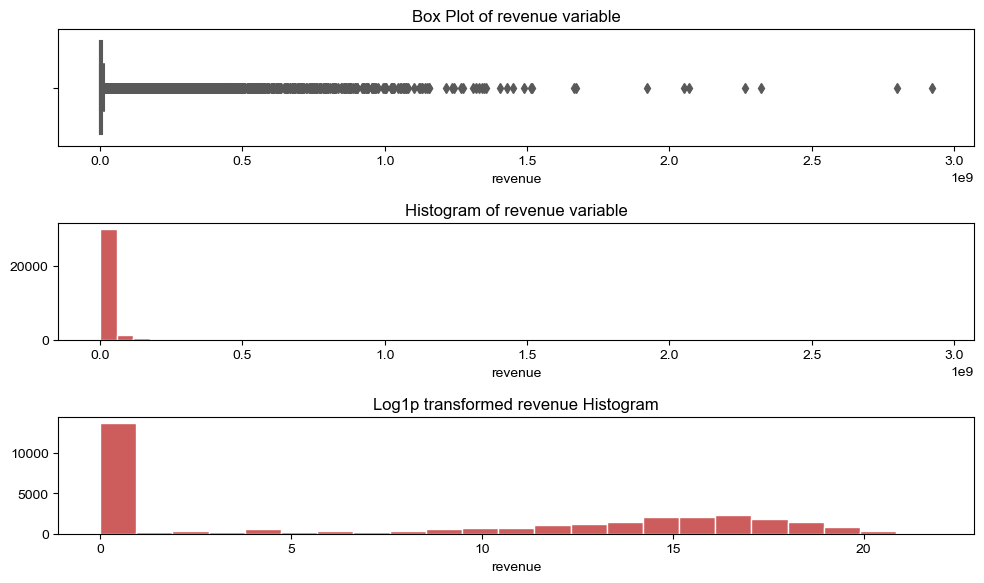

In [13]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=data.revenue, ax = ax[0], color='indianred')
ax[0].set_title("Box Plot of revenue variable")
sns.distplot(a=data.revenue, kde = False, ax = ax[1], color='indianred', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of revenue variable")
sns.distplot(a=np.log1p(data.revenue), kde = False, ax = ax[2], color='indianred', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed revenue Histogram")
f.tight_layout()

In [14]:
print('Percenteage of movie has revenue under 1000$: ',data[data['revenue'] <= 1000].shape[0] / data.shape[0] * 100)
print('Percenteage of movie has revenue under 1000$ without 0 revenue: ',data[(data['revenue'] > 0) & (data['revenue'] <= 1000)].shape[0] / data.shape[0] * 100)

Percenteage of movie has revenue under 1000$:  48.03501469147894
Percenteage of movie has revenue under 1000$ without 0 revenue:  7.0947600391772765


Chúng ta có thể thấy có rất nhiều giá trị cực kỳ thấp và không thực tế trong cột doanh thu. Đây là vấn đề chúng tôi có thể phải giải quyết sau và sẽ xem xét sau khi chúng tôi đã kiểm tra phần còn lại của dữ liệu


In [15]:
num_features.append("revenue")

## Title

Cột này cho biết tiêu đề của bộ phim. Mặc dù việc kiểm tra nội dung của tiêu đề có thể rất thú vị nhưng việc đó nằm ngoài phạm vi của dự án này

In [16]:
print('Movies missing a title:',data.title.isna().sum())


Movies missing a title: 2


In [17]:
data = data.dropna(subset=['title'])

In [18]:
data.title.fillna('')
data['title_len'] = data.title.apply(lambda x: len(str(x)))

Chúng tôi sẽ chỉ nhìn vào độ dài của tiêu đề để xem liệu điều này có ảnh hưởng gì đến sức hút của bộ phim hay không. Có thể những tiêu đề ngắn hơn sẽ dễ nhớ hơn, giúp chúng hoạt động hiệu quả hơn hoặc có khả năng những tiêu đề dài hơn sẽ độc đáo và hấp dẫn hơn, khiến chúng thu hút nhiều người hơn.

C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\3675468864.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data.title_len, kde = False, ax = ax[1], color='burlywood', hist_kws=dict(alpha=1))
C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\3675468864.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


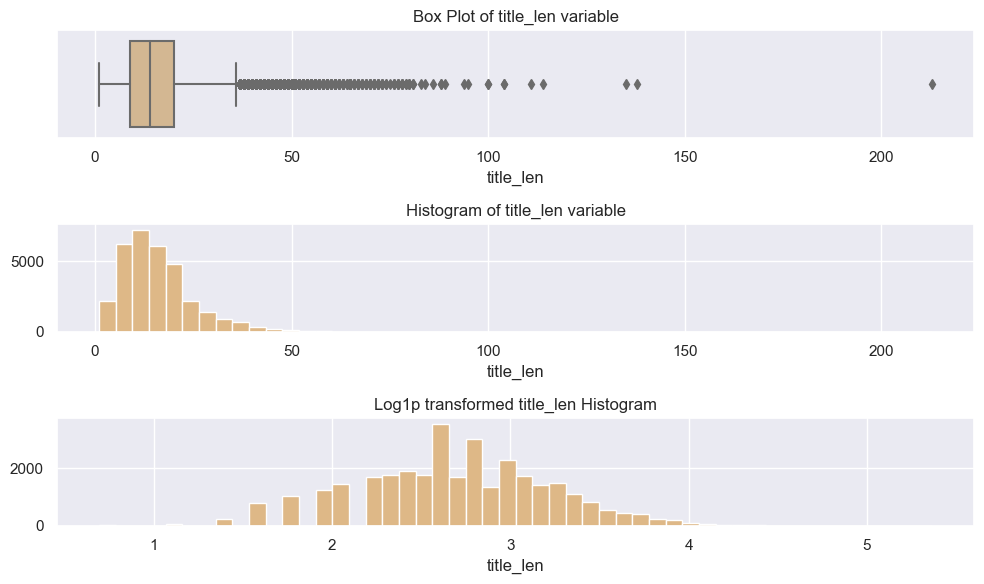

In [19]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=data.title_len, ax = ax[0], color='burlywood')
ax[0].set_title("Box Plot of title_len variable")
sns.distplot(a=data.title_len, kde = False, ax = ax[1], color='burlywood', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of title_len variable")
sns.distplot(a=np.log1p(data.title_len), kde = False, ax = ax[2], color='burlywood', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed title_len Histogram")
f.tight_layout()

Text(0.5, 1.0, 'Log Revenue vs log title_len')

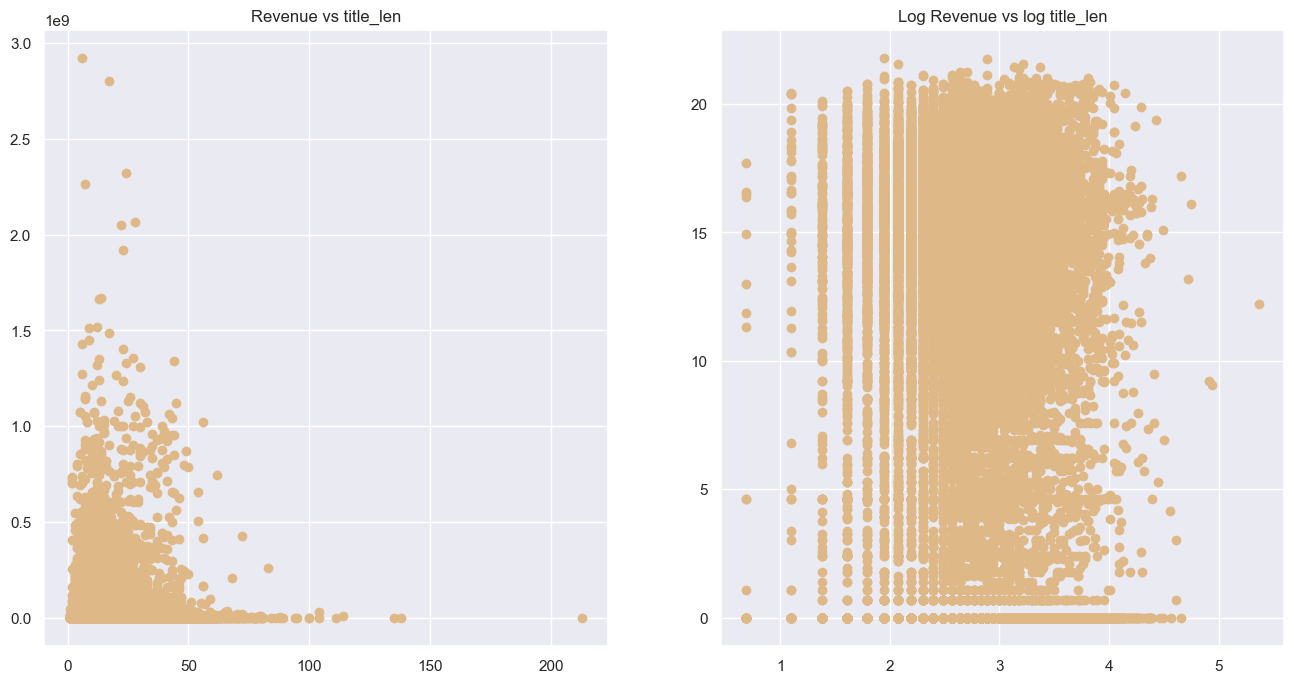

In [20]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(data['title_len'], data['revenue'], color='burlywood')
plt.title('Revenue vs title_len')
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(data['title_len']), np.log1p(data['revenue']), color='burlywood')
plt.title('Log Revenue vs log title_len')

In [21]:
# calculate Pearson's correlation
corr, _ = pearsonr(data['title_len'], data['revenue'])
print('Pearsons correlation between title_len and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['title_len']), np.log1p(data['revenue']))
print('Pearsons correlation between log transformed title_len and log transformed revenue: %.3f' % corr)

Pearsons correlation between title_len and revenue: 0.025
Pearsons correlation between log transformed title_len and log transformed revenue: -0.001


Chúng ta có thể thấy rằng có rất ít mối tương quan giữa độ dài của tiêu đề và doanh thu của bộ phim nhưng chúng tôi quyết định vẫn đưa vào mô hình của chúng tôi

In [22]:
num_features.append('title_len')

## Vote Average

Cột này cho biết đánh giá trung bình của phim. Đánh giá trung bình phản ánh chất lượng của một bộ phim từ góc độ của cộng đồng người xem. Các bộ phim được đánh giá cao thường nhận được sự đánh giá tích cực từ cộng đồng, điều này có thể tạo ra một ấn tượng tích cực và thu hút nhiều người xem hơn

In [23]:
percentage_zero_vote_average = data[data['vote_average'] == 0].shape[0] / data.shape[0] * 100
print(f"Percentage of Vote average equal to 0: {percentage_zero_vote_average:.2f}%")

Percentage of Vote average equal to 0: 48.35%


Có thể thấy dữ liệu đánh giá trung bình 0 chiếm tỉ lệ rất lớn trong dữ liệu. Việc thay thế các giá trị 0 này bằng giá trị trung bình hoặc trung vị sẽ làm ảnh hưởng đáng kể đến chất lượng của dữ liệu. Vì vậy chúng tôi quyết định loại bỏ những bộ phim có đánh giá trung bình bằng 0

In [24]:
data = data[data['vote_average'] != 0]

In [25]:
# calculate Pearson's correlation
corr, _ = pearsonr(data['vote_average'], data['revenue'])
print('Pearsons correlation between vote_average and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['vote_average']), np.log1p(data['revenue']))
print('Pearsons correlation between log transformed vote_average and log transformed revenue: %.3f' % corr)

Pearsons correlation between vote_average and revenue: 0.101
Pearsons correlation between log transformed vote_average and log transformed revenue: -0.031


Chúng tôi quan sát thấy mối tương quan tương đối giữa đánh giá trung bình và doanh thu của một bộ phim, vì vậy sẽ rất hữu ích nếu đưa vào mô hình của chúng tôi

In [26]:
num_features.append("vote_average")

## Vote Count

Cột này cho biết số lượt đánh giá của bộ phim. Số lượt đánh giá của một bộ phim có thể được xem xét là một thuộc tính quan trọng, đặc biệt là nếu nó là một con số lớn. Một bộ phim thu hút nhiều lượt đánh giá có thể chỉ ra rằng nó đã tạo ra sự quan tâm và tiếp cận rộng rãi từ cộng đồng người xem, không quan trọng là đánh giá tích cực hay tiêu cực. Vì vậy, chúng tôi quyết định đưa thuộc tính này vào trong mô hình của mình

In [27]:
percentage_zero_vote_count = data[data['vote_count'] == 0].shape[0] / data.shape[0] * 100
print(f"Percentage of Vote count equal to 0: {percentage_zero_vote_count:.2f}%")

Percentage of Vote count equal to 0: 0.02%


Số bộ phim có số lượt đánh giá bằng 0 là không đáng kể nên chúng tôi sẽ quyết định loại bỏ chúng ra khỏi bộ dữ liệu

In [28]:
data = data[data['vote_count'] != 0]

In [29]:
# calculate Pearson's correlation
corr, _ = pearsonr(data['vote_count'], data['revenue'])
print('Pearsons correlation between vote_count and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['vote_count']), np.log1p(data['revenue']))
print('Pearsons correlation between log transformed vote_count and log transformed revenue: %.3f' % corr)

Pearsons correlation between vote_count and revenue: 0.754
Pearsons correlation between log transformed vote_count and log transformed revenue: 0.701


Chúng tôi quan sát thấy mối tương quan tương đối giữa số lượt đánh giá và doanh thu của một bộ phim, vì vậy sẽ rất hữu ích nếu đưa vào mô hình của chúng tôi

In [30]:
num_features.append("vote_count")

## Status

Cột này thể hiện trạng thái hiện tại của bộ phim. Như dữ liệu đã lọc từ phần Revenue, những bộ phim đã ra mắt sẽ có doanh thu lớn hơn 0, trong khi những bộ phim chưa ra mắt sẽ có doanh thu bằng 0. Vì vậy, chúng tôi quyết định thêm thuộc tính này vào mô hình để nó có thể học được mối liên hệ giữa việc đã ra mắt và doanh thu của một bộ phim

In [31]:
data['status'].value_counts()

status
Released           16795
Planned               35
In Production         13
Post Production       12
Rumored               11
Canceled               5
Name: count, dtype: int64

In [32]:
data['status'] = data['status'].map(lambda x: 1 if (x == 'Released') else 0)

In [33]:
cat_features.append('status')

## Release Date

Cột này thể hiện ngày đầu tiên bộ phim được phát hành tại rạp. Những thứ như thời gian trong năm, ngày trong tuần, mùa, v.v. đều có thể được lấy từ dữ liệu phát hành và tất cả đều có thể quan trọng đối với việc một bộ phim được kỳ vọng sẽ thành công như thế nào ở rạp.

In [34]:
data['release_date'].head(10)


id
31866     1935-12-25
192       1986-09-24
616820    2022-10-12
518021    2018-04-14
38973     2007-08-04
366080    2016-07-22
19181     1985-10-04
12819     2010-09-16
6076      2007-12-01
22832     2009-09-29
Name: release_date, dtype: object

Chúng tôi bắt đầu bằng một số bước xử lý trước bằng cách sử dụng datetime để thao tác dữ liệu.

In [35]:
data = data.loc[~data['release_date'].isnull()].copy()
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\2741756940.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['release_date'].dt.year, bins=99, kde=False, color='gold', hist_kws=dict(alpha=1))


Text(0.5, 1.0, 'Year of Release Date by Number of Films')

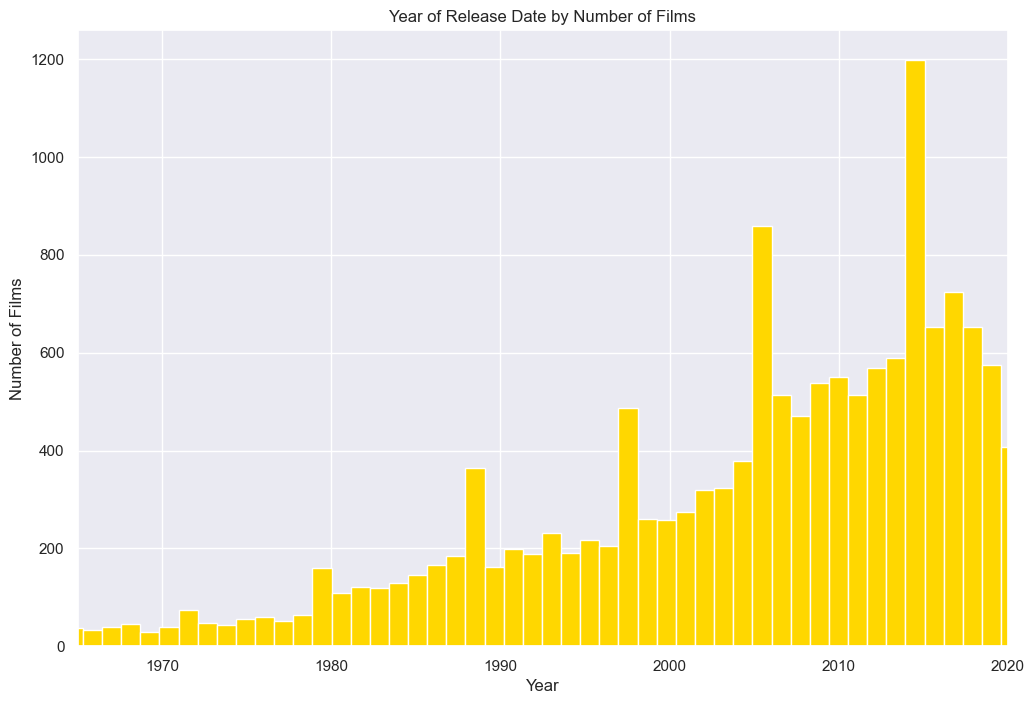

In [36]:
# plotting the year of the films release
fig, dx = plt.subplots()
sns.distplot(data['release_date'].dt.year, bins=99, kde=False, color='gold', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(12, 6)})

dx.set(xlim=(1965, 2020))
dx.set_xlabel("Year")
dx.set_ylabel("Number of Films")
dx.set_title("Year of Release Date by Number of Films")

Biểu đồ về năm phát hành của tập dữ liệu cho thấy sự gia tăng chung về số lượng phim theo thời gian, điều này có ý nghĩa đối với một ngành đang phát triển. Trong khi chủ yếu là tuyến tính, tuy nhiên, sự xuất hiện của một số đỉnh cao bất thường có thể đề xuất sự kiện đặc biệt hoặc những năm có tăng trưởng đột phá so với xu hướng chung. Việc tìm ra mối quan hệ giữa những năm có số lượng phim trên trung bình và doanh thu có thể là một hướng điều tra thú vị.

C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\3664311770.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['release_date'].dt.dayofweek, kde=False, color='gold', hist_kws=dict(alpha=1))
C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\3664311770.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ex.set_xticklabels(labels)


[Text(-1.0, 0, '−1'),
 Text(0.0, 0, 'Monday'),
 Text(1.0, 0, 'Tuesday'),
 Text(2.0, 0, 'Wednesday'),
 Text(3.0, 0, 'Thursday'),
 Text(4.0, 0, 'Friday'),
 Text(5.0, 0, 'Saturday'),
 Text(6.0, 0, 'Sunday'),
 Text(7.0, 0, '7')]

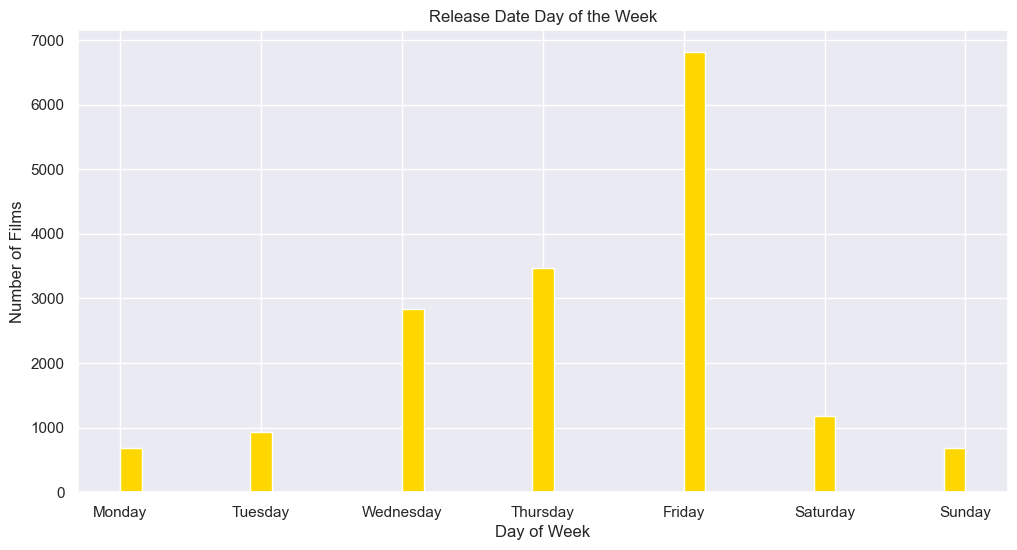

In [37]:
# plotting the films release day of the week
fig, ex = plt.subplots()
sns.distplot(data['release_date'].dt.dayofweek, kde=False, color='gold', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(15,6)})

ex.set_xlabel("Day of Week")
ex.set_ylabel("Number of Films")
ex.set_title("Release Date Day of the Week")

labels = [item.get_text() for item in ex.get_xticklabels()]
labels[1] = 'Monday'
labels[2] = 'Tuesday'
labels[3] = 'Wednesday'
labels[4] = 'Thursday'
labels[5] = 'Friday'
labels[6] = 'Saturday'
labels[7] = 'Sunday'

ex.set_xticklabels(labels)

Dữ liệu ngày trong tuần cho thấy sự khác biệt rõ ràng về số phim phát hành vào Thứ Sáu, điều này rõ ràng có phần gắn liền với thời điểm kết thúc tuần làm việc từ Thứ Hai đến Thứ Sáu thông thường, có thể giải thích bởi thói quen của khán giả nghỉ ngơi vào cuối tuần. Việc phát hành phim dự kiến ​​sẽ tuân theo các mô hình thị trường có lợi nhất cho phim, vì vậy có giả thuyết rằng ngày phát hành vào thứ Sáu sẽ có tác động tích cực đến doanh thu (và theo tổng doanh thu phòng vé). Thật bất ngờ, ngày phát hành thứ Bảy thậm chí còn thấp hơn thứ Ba, thứ Tư và thứ Năm - có lẽ việc ra mắt phim vào các ngày trước đó trong tuần có thể giúp phim tiếp cận được nhiều khán giả hơn, khán giả có thể quan tâm đến các bộ phim mới và có thể lựa chọn xem chúng vào cuối tuần.

C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\1970225173.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['release_date'].dt.dayofyear, bins=365, kde=False, color='gold', hist_kws=dict(alpha=1))


Text(0.5, 1.0, 'Release Date Day of the Year')

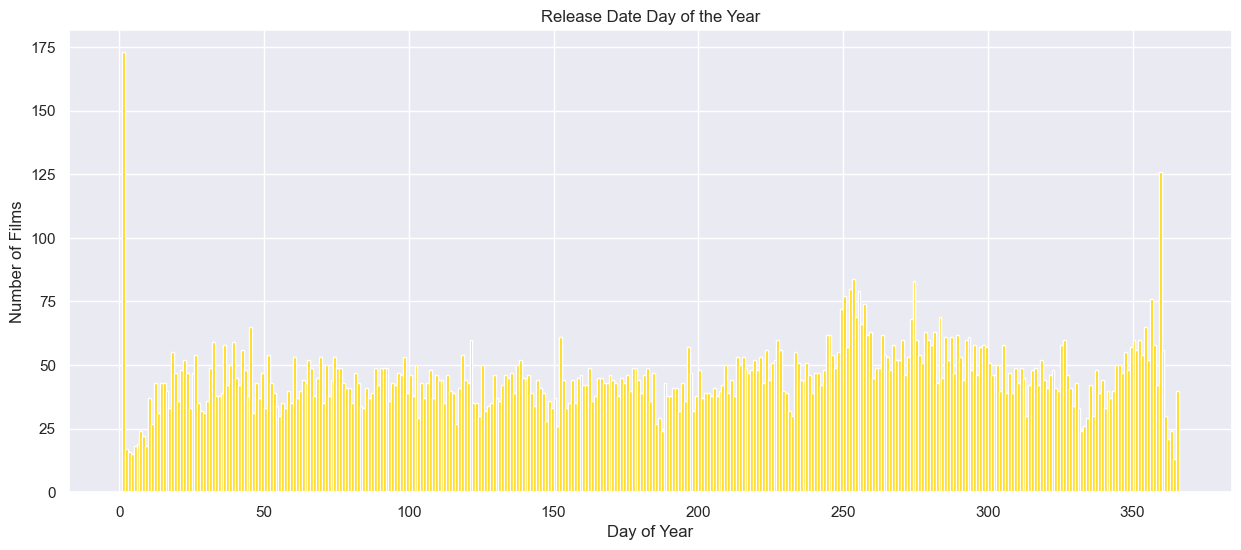

In [38]:
# plotting the films release day of the year
fig, fx = plt.subplots()
sns.distplot(data['release_date'].dt.dayofyear, bins=365, kde=False, color='gold', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(15,6)})

fx.set_xlabel("Day of Year")
fx.set_ylabel("Number of Films")
fx.set_title("Release Date Day of the Year")

Dữ liệu về ngày trong năm có vẻ đồng đều, nhưng nhìn chung, có một số ngày có số lượng phim đặc biệt nhiều. Cụ thể, ngày phát hành vào Giáng Sinh và Ngày Tết được biết đến như là những lựa chọn phổ biến. Việc ra mắt phim vào những ngày này có thể là do truyền thống hoặc có thể mang lại lợi nhuận cao, điều này sẽ được xem xét kỹ hơn trong các phần khám phá dữ liệu sau.
Ngoài ra, có một lượng lớn phim được ra mắt vào tháng Chín. Nghiên cứu thêm cho thấy tháng Tám và Tháng Chín thường được gọi là "dump months" khi kỳ vọng thương mại và phê bình của các nhà làm phim và nhà phân phối giảm xuống đối với hầu hết các phim chiếu rạp mới, có dàn diễn viên ít nổi tiếng, hoặc không dễ dàng quảng bá. Điều này có thể liên quan đến việc trẻ em quay lại học sau mùa hè, cùng với các dấu hiệu khác về một giai đoạn suy thoái của ngành công nghiệp điện ảnh. Do đó, việc có nhiều phim ra mắt có thể tích cực trong một số trường hợp và tiêu cực trong những trường hợp khác. Ngược lại, những giai đoạn có ít phim ra mắt có thể do sự xuất hiện của một bộ phim lớn (khi các hãng phim muốn giảm cạnh tranh trong doanh thu phòng vé).

C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\1582219483.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['release_date'].dt.isocalendar().week, bins=52, kde=False, color='gold', hist_kws=dict(alpha=1))
C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\1582219483.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

Text(0.5, 1.0, 'Release Date Month of the Year')

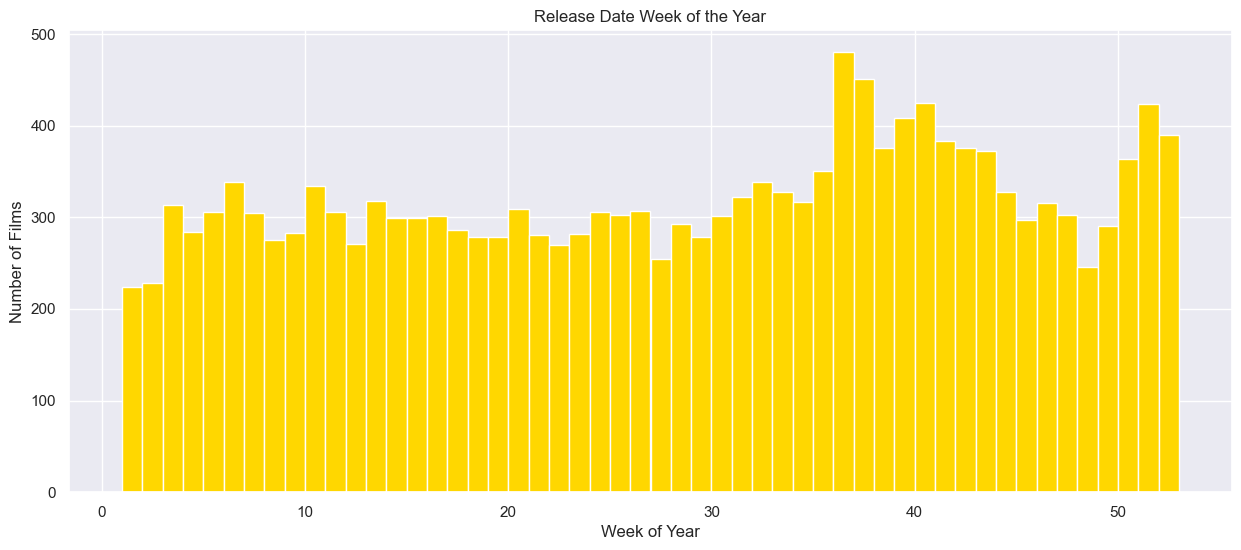

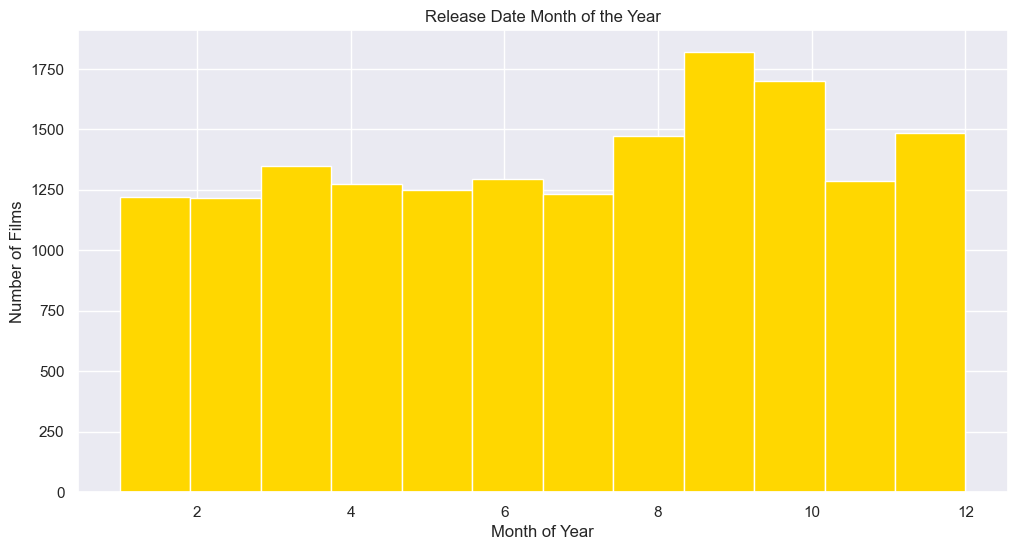

In [39]:
# plotting the films release week of the year
fig, gx = plt.subplots()
sns.distplot(data['release_date'].dt.isocalendar().week, bins=52, kde=False, color='gold', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(12,6)})

gx.set_xlabel("Week of Year")
gx.set_ylabel("Number of Films")
gx.set_title("Release Date Week of the Year")

print()

# plotting the films release month of the year
fig, hx = plt.subplots()
sns.distplot(data['release_date'].dt.month, bins=12, kde=False, color='gold', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(12,6)})

hx.set_xlabel("Month of Year")
hx.set_ylabel("Number of Films")
hx.set_title("Release Date Month of the Year")

Tương tự với dữ liệu về ngày trong năm, dữ liệu về tuần trong năm cho thấy số lượng phim cao nhất vào cuối tháng Tám và đầu tháng Chín, trong những tháng được biết đến là "dump months" Điều này có vẻ không phản ánh mối tương quan tích cực với doanh thu. Đỉnh thứ hai vào tháng Mười Hai có thể có doanh thu phòng vé tốt hơn do sự ưa chuộng của việc đi xem phim trong kỳ nghỉ lễ. Mùa thu cuối và mùa đông thường được xem là mùa bắt đầu của Mùa Oscar, có thể đồng nghĩa với việc ra mắt các bộ phim có doanh thu cao mặc dù số lượng phim có thể không nhiều. Do đó, có thể giả định rằng số lượng phim ra mắt trong một tuần cụ thể của năm không quan trọng bằng các đặc điểm của tuần đó liên quan đến các chu kỳ của ngành công nghiệp điện ảnh.

[Text(0, 0, '1911'),
 Text(1, 0, '1913'),
 Text(2, 0, '1914'),
 Text(3, 0, '1915'),
 Text(4, 0, '1916'),
 Text(5, 0, '1918'),
 Text(6, 0, '1919'),
 Text(7, 0, '1920'),
 Text(8, 0, '1921'),
 Text(9, 0, '1922'),
 Text(10, 0, '1923'),
 Text(11, 0, '1924'),
 Text(12, 0, '1925'),
 Text(13, 0, '1926'),
 Text(14, 0, '1927'),
 Text(15, 0, '1928'),
 Text(16, 0, '1929'),
 Text(17, 0, '1930'),
 Text(18, 0, '1931'),
 Text(19, 0, '1932'),
 Text(20, 0, '1933'),
 Text(21, 0, '1934'),
 Text(22, 0, '1935'),
 Text(23, 0, '1936'),
 Text(24, 0, '1937'),
 Text(25, 0, '1938'),
 Text(26, 0, '1939'),
 Text(27, 0, '1940'),
 Text(28, 0, '1941'),
 Text(29, 0, '1942'),
 Text(30, 0, '1943'),
 Text(31, 0, '1944'),
 Text(32, 0, '1945'),
 Text(33, 0, '1946'),
 Text(34, 0, '1947'),
 Text(35, 0, '1948'),
 Text(36, 0, '1949'),
 Text(37, 0, '1950'),
 Text(38, 0, '1951'),
 Text(39, 0, '1952'),
 Text(40, 0, '1953'),
 Text(41, 0, '1954'),
 Text(42, 0, '1955'),
 Text(43, 0, '1956'),
 Text(44, 0, '1957'),
 Text(45, 0, '1958')

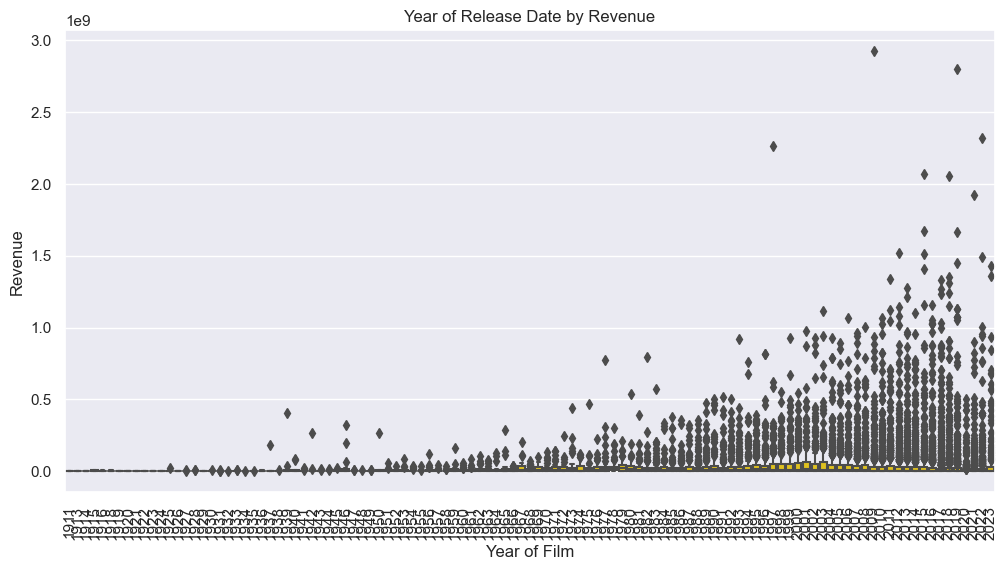

In [40]:
# bivariate year of release with revenue data
fig, dx = plt.subplots()
sns.boxplot(x=data['release_date'].dt.year, y=data['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 20)})

dx.set_xlabel("Year of Film")
dx.set_ylabel("Revenue")
dx.set_title("Year of Release Date by Revenue")

dx.set_xticklabels(dx.get_xticklabels(), rotation=90)

Doanh thu của phim thường tăng qua từng năm, có năm cao hơn đáng kể so với những năm khác. Năm 2020 và 2021 chứng kiến sự sụt giảm về mặt doanh thu do đại dịch Covid 19

[Text(0, 0, 'Monday'),
 Text(1, 0, 'Tuesday'),
 Text(2, 0, 'Wednesday'),
 Text(3, 0, 'Thursday'),
 Text(4, 0, 'Friday'),
 Text(5, 0, 'Saturday'),
 Text(6, 0, 'Sunday')]

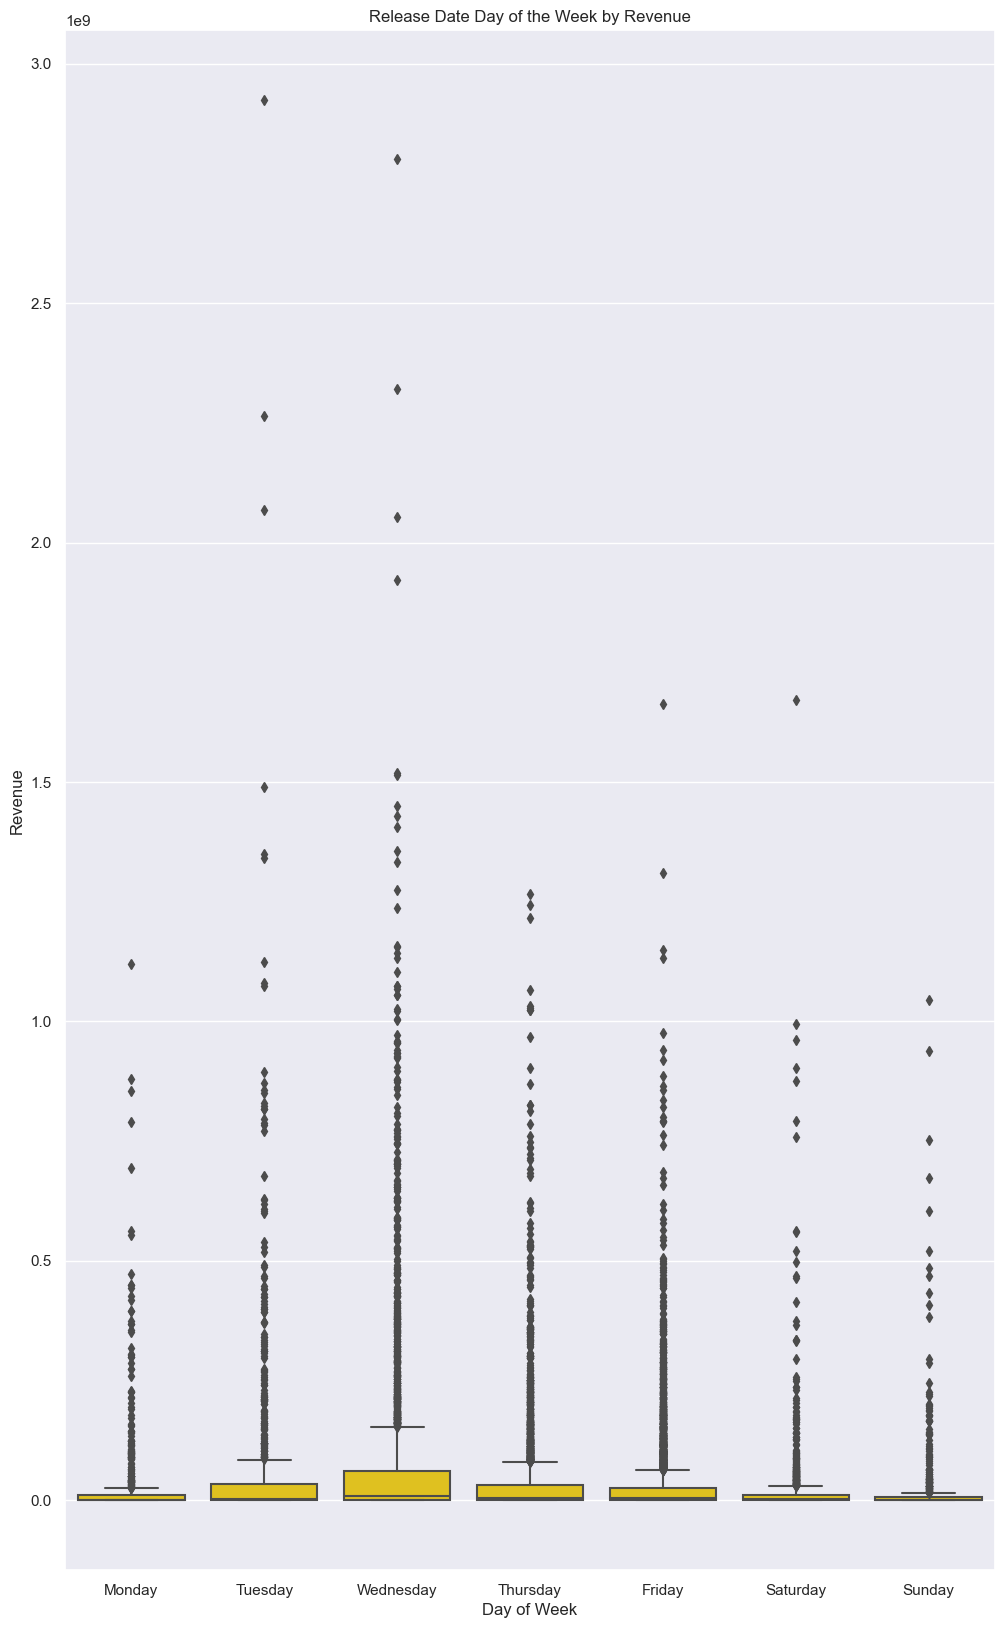

In [41]:
# bivariate day of week of release with revenue data
fig, ex = plt.subplots()
sns.boxplot(x=data['release_date'].dt.dayofweek, y=data['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 6)})

ex.set_xlabel("Day of Week")
ex.set_ylabel("Revenue")
ex.set_title("Release Date Day of the Week by Revenue")

labels = [item.get_text() for item in ex.get_xticklabels()]
labels[0] = 'Monday'
labels[1] = 'Tuesday'
labels[2] = 'Wednesday'
labels[3] = 'Thursday'
labels[4] = 'Friday'
labels[5] = 'Saturday'
labels[6] = 'Sunday'

ex.set_xticklabels(labels)

Đáng ngạc nhiên, mặc dù có giả định rằng thứ Sáu là ngày phát hành phổ biến nhất do có lợi ích tài chính, thì thực tế ngày thứ Tư (tiếp theo là thứ Ba và thứ Năm) lại mang lại doanh thu cao nhất. Sẽ rất thú vị khi điều tra lý do tại sao lại như vậy, nhưng dù sao đi nữa, nó sẽ giúp cung cấp thông tin cho mô hình.

Text(0.5, 1.0, 'Release Date Day of the Year by Revenue')

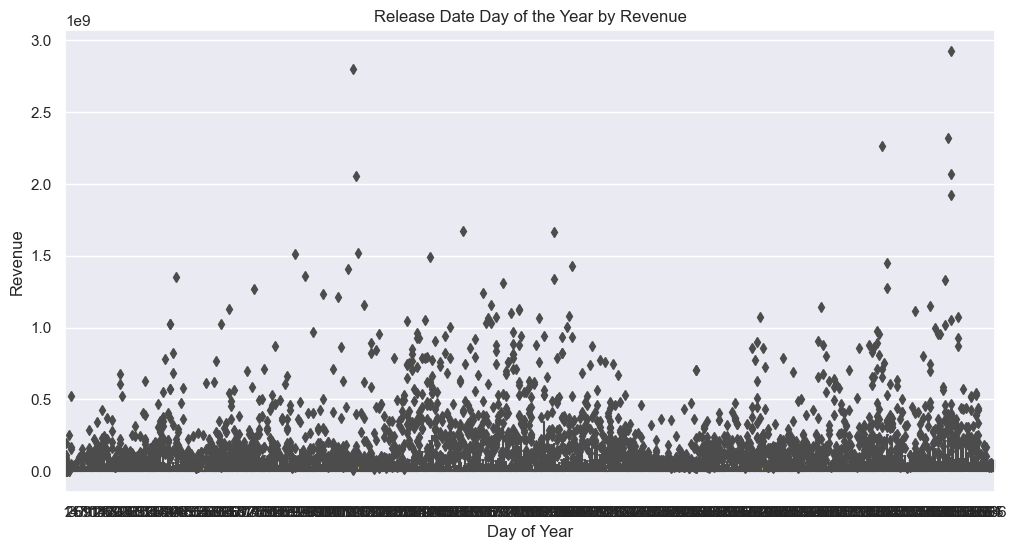

In [42]:
# bivariate day of year of release with revenue data
# WIP
fig, fx = plt.subplots()
sns.boxplot(x=data['release_date'].dt.dayofyear, y=data['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 6)})

fx.set_xlabel("Day of Year")
fx.set_ylabel("Revenue")
fx.set_title("Release Date Day of the Year by Revenue")

Rất khó để trình bày lượng dữ liệu khổng lồ theo biểu đồ phân tích hai biến doanh thu và ngày phát hành.

Text(0.5, 1.0, 'Release Date Week of the Year by Revenue')

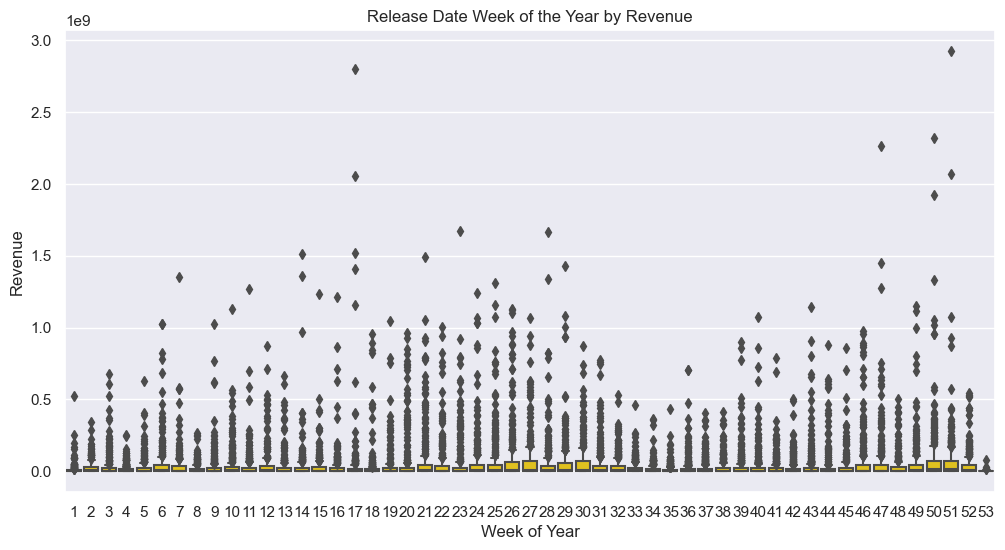

In [43]:
fig, gx = plt.subplots()
sns.boxplot(x=data['release_date'].dt.isocalendar().week, y=data['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 6)})

gx.set_xlabel("Week of Year")
gx.set_ylabel("Revenue")
gx.set_title("Release Date Week of the Year by Revenue")

Doanh thu trong các tuần trong năm khá phù hợp với kết quả dự kiến ​​từ phân tích trước đó, trong đó các tuần trước kỳ nghỉ lễ có doanh thu tương đối cao. Ngoài ra còn có mùa cao điểm giữa hè đáng chú ý là vào tháng 6 (tuần thứ 24-27 trong năm).

Text(0.5, 1.0, 'Release Date Month by Revenue')

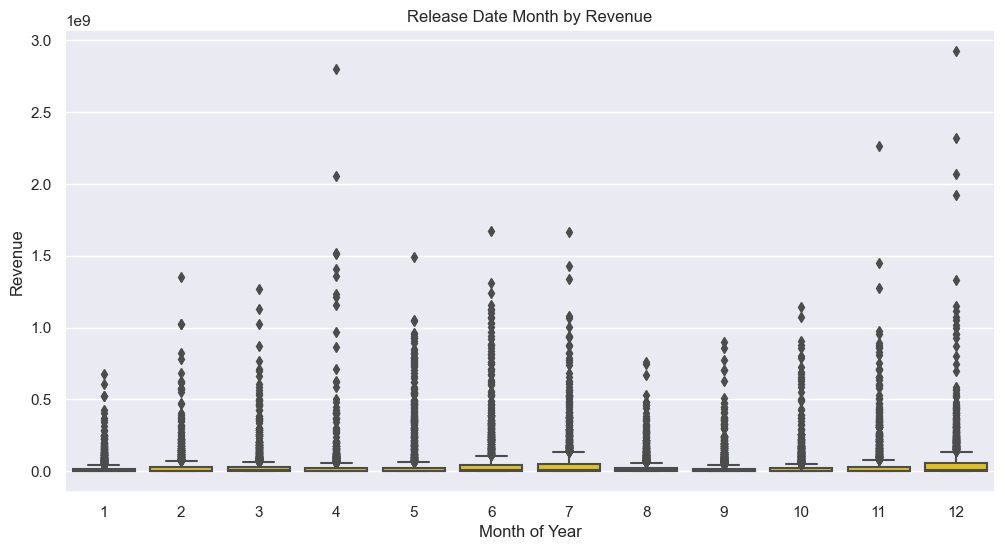

In [44]:
fig, hx = plt.subplots()
sns.boxplot(x=data['release_date'].dt.month, y=data['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 6)})

hx.set_xlabel("Month of Year")
hx.set_ylabel("Revenue")
hx.set_title("Release Date Month by Revenue")

Tương tự như trên, các tháng trong năm cũng có xu hướng tương tự. Những tháng giữa hè thành công dù không nhiều về mặt phát hành, trong khi những tháng đầu năm học có số lượng phim nhiều hơn và doanh thu thấp hơn đáng kể. Kỳ nghỉ lễ vào tháng 12 cho thấy số lượng phim phát hành nhiều hơn và đồng thời doanh thu cũng cao hơn.

In [45]:
from datetime import datetime

data["month"] = data["release_date"].dt.month

data["year"] = data["release_date"].dt.year

data["day_of_week"] = data["release_date"].dt.dayofweek + 1

data["week_of_year"] = data["release_date"].dt.isocalendar().week

data[["release_date", "month", "year", "day_of_week", "week_of_year"]].head()

,release_date,month,year,day_of_week,week_of_year
id,,,,,
31866,1935-12-25,12,1935,3,52
192,1986-09-24,9,1986,3,39
616820,2022-10-12,10,2022,3,41
518021,2018-04-14,4,2018,6,15
38973,2007-08-04,8,2007,6,31


In [46]:
data['year'].isnull().sum()

0

In [47]:
corr, _ = pearsonr(data['year'], data['revenue'])
print('Pearsons correlation between year and revenue: %.3f' % corr)
print()

corr, _ = pearsonr(data['month'], data['revenue'])
print('Pearsons correlation between month and revenue: %.3f' % corr)
print()

corr, _ = pearsonr(data['week_of_year'], data['revenue'])
print('Pearsons correlation between week_of_year and revenue: %.3f' % corr)
print()

Pearsons correlation between year and revenue: 0.076

Pearsons correlation between month and revenue: 0.030

Pearsons correlation between week_of_year and revenue: 0.028



Dường như có rất ít mối tương quan với doanh thu đối với bất kỳ biến nào mà chúng tôi trích xuất từ ​​ngày phát hành, tuy nhiên, chúng tôi sẽ đưa tất cả chúng vào mô hình của mình vì chúng tôi không thể loại trừ mối quan hệ chỉ dựa trên Pearsons correlation. Thay vì sử dụng các biến này làm số liệu, chúng ta nên tạo một số biến giả để thể hiện tốt hơn các khía cạnh liên quan của ngày phát hành. Chúng ta có thể sử dụng các cột đã tạo của ngày cập nhật này để tạo một số biến mới. Sẽ không có nhiều ý nghĩa nếu coi năm là một biến liên tục và log biến đổi nó, vì vậy sẽ tốt hơn nếu nắm bắt một cách chính xác, cùng với mùa và ngày trong tuần


In [48]:
data.loc[data['year'].idxmin(), ['title', 'year', 'revenue']]

title      Water, Klimaat en Film
year                         1911
revenue                         1
Name: 1180455, dtype: object

Vì bộ phim đầu tiên trong tập dữ liệu của chúng tôi có từ năm 1911 nên chúng tôi sẽ chia năm thành các thập kỷ, bắt đầu từ những 1910s đến 2020s.

In [49]:
for decade in range(1910, 2030, 10):
    print(decade)

1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020


In [50]:
for decade in range(1910, 2030, 10):
    data[f'{decade}s'] = data['year'].map(lambda x: 1 if (x >= decade and x <= decade + 9) else 0)

In [51]:
data['day_of_week'].value_counts()

day_of_week
5    6810
4    3467
3    2841
6    1176
2     940
7     684
1     681
Name: count, dtype: int64

Như chúng ta đã thấy trước đó, phim thường được phát hành vào thứ Sáu, tuy nhiên đây không phải là ngày có doanh thu cao nhất trong tuần. Vì vậy, chúng ta có thể tạo một thuộc tính cho mỗi ngày trong tuần vì thứ có thể hữu ích theo những cách khác nhau đối với mô hình.

In [52]:
day_of_week_idx = {2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 7: 'Saturday', 8: 'Sunday'}

for day_of_week in range(2, 9):
    data[f'{day_of_week_idx[day_of_week]}Release'] = data['day_of_week'].map(lambda x: 1 if (x == day_of_week) else 0)


Các mùa cũng đóng một vai trò quan trọng trong ngành điện ảnh. Rất nhiều bom tấn đình đám ra mắt vào mùa hè nên có lẽ điều này sẽ rất có ý nghĩa. Chúng tôi cũng sẽ chia các bộ phim theo mùa mà chúng được phát hành dưới dạng các thuộc tính.

In [53]:
season_idx = {1: 'Spring', 4: 'Summer', 7: 'Fall', 10: 'Winter'}

for season in range(1, 13, 3):
    data[f'{season_idx[season]}'] = data['month'].map(lambda x: 1 if (x >= season and x <= season + 2) else 0)

In [54]:
cat_features.append('1960s')
cat_features.append('1970s')
cat_features.append('1980s')
cat_features.append('1990s')
cat_features.append('2000s')
cat_features.append('2010s')
cat_features.append('MondayRelease')
cat_features.append('TuesdayRelease')
cat_features.append('WednesdayRelease')
cat_features.append('ThursdayRelease')
cat_features.append('FridayRelease')
cat_features.append('SaturdayRelease')
cat_features.append('SundayRelease')
cat_features.append('Winter')
cat_features.append('Fall')
cat_features.append('Spring')
cat_features.append('Summer')

## Runtime

Cột này biểu thị thời lượng của phim tính bằng phút. Thời lượng phim có thể có tác động đến doanh thu vì có thể những phim bị cho là "quá ngắn" hoặc "quá dài" có thể nhận được ít lượng người xem hơn.

In [55]:
print('Movies missing a runtime:',data.runtime.isna().sum())

Movies missing a runtime: 0


C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\1696606277.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data.runtime, kde = False, ax = ax[1], color='slateblue', hist_kws=dict(alpha=1))
C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\1696606277.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

 

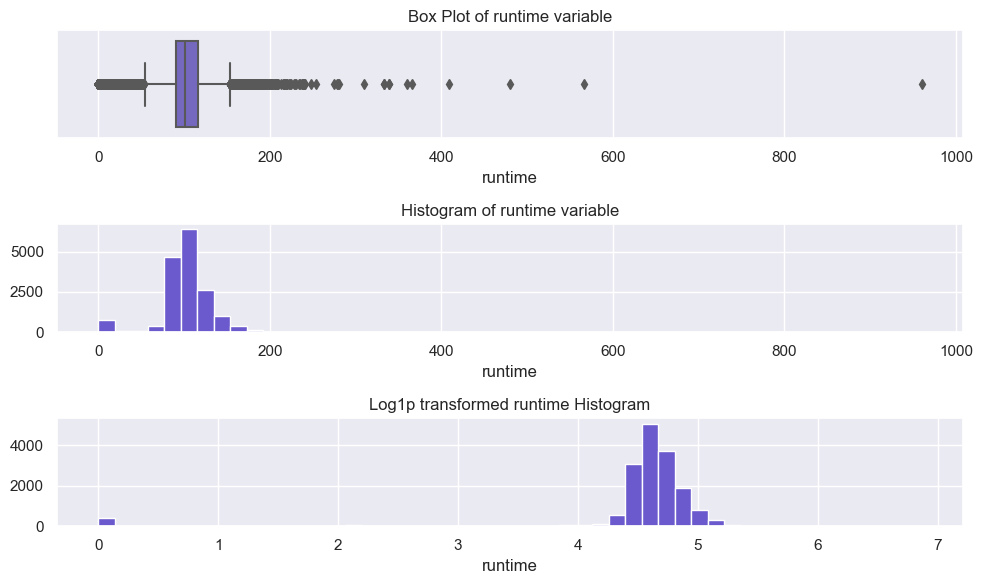

In [56]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=data.runtime, ax = ax[0], color='slateblue')
ax[0].set_title("Box Plot of runtime variable")
sns.distplot(a=data.runtime, kde = False, ax = ax[1], color='slateblue', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of runtime variable")
sns.distplot(a=np.log1p(data.runtime), kde = False, ax = ax[2], color='slateblue', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed runtime Histogram")
f.tight_layout()

Sự phân bổ thời gian chạy có vẻ khá tốt, nhưng chúng ta có thể thấy khá nhiều điểm ngoại lệ ở bên phải. Việc đổi sang log sẽ giúp giải quyết các ngoại lệ này, nhưng có một số ngoại lệ đặc biệt trên 300 phút(5 tiếng). Chúng tôi sẽ kiểm tra ngoại lệ này một cách cụ thể


In [57]:
data.loc[data['runtime'] > 300, ['title', 'runtime', 'revenue']]


,title,runtime,revenue
id,,,
255615,River of Fundament,310,44840
42536,Napoléon,333,39448
1168032,One Copyright Strike to Rule Them All,409,100
144800,Jorge Cervante's Ultimate Grow 2,360,100
44825,Live Aid,960,150000000
42044,Shoah,566,20175
787838,2019: A Cinematic Odyssey,480,100000
42536,Napoléon,333,39448
11659,The Best of Youth,366,2693053


Những bộ phim dài trên 300 phút tức là hơn 5 tiếng. Những bộ phim này dài một cách vô lý và thậm chí còn không đạt thành tích đặc biệt ở phòng vé, vì vậy việc giữ lại điểm dữ liệu này không mang lại lợi ích gì cho mô hình của chúng tôi. Chúng tôi sẽ những bộ phim này


In [58]:
data = data[data['runtime'] <= 300]

In [59]:
data[data['runtime'] == 0].shape[0]


421

Có 421 bộ phim có thời gian chạy được liệt kê là 0 trong tập dữ liệu, đây cũng là một ngoại lệ rõ ràng vì sẽ không có phim nào có thời gian chạy thực sự là 0. Chúng tôi sẽ thay thế các giá trị này bằng giá trị trung bình của thời gian chạy khác 0.


In [60]:
median = data.loc[data['runtime'] > 0, 'runtime'].median()
data["runtime_processed"] = data["runtime"].mask(data["runtime"] == 0, median)

C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\1592781499.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data.runtime_processed, kde = False, ax = ax[1], color='slateblue', hist_kws=dict(alpha=1))
C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\1592781499.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

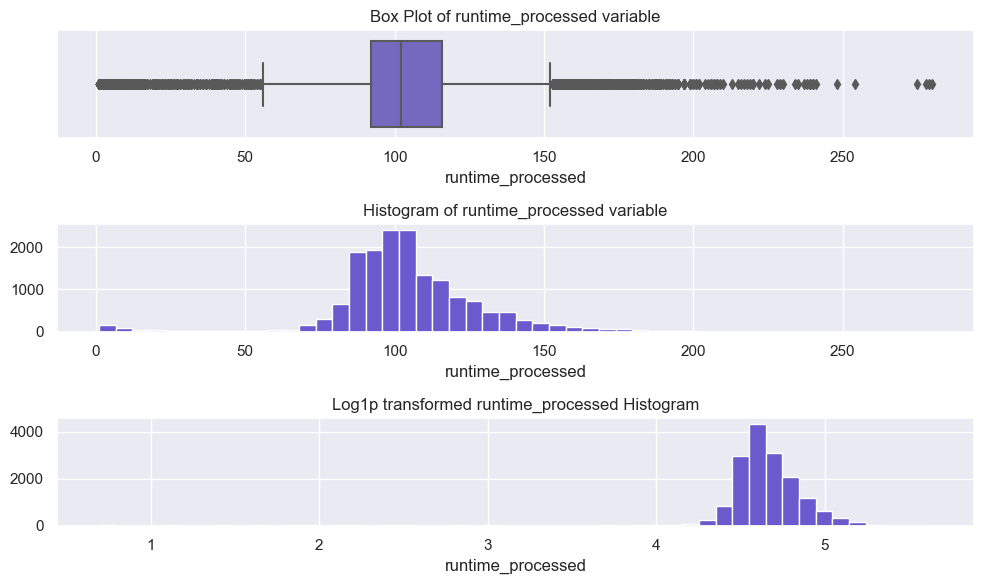

In [61]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=data.runtime_processed, ax = ax[0], color='slateblue')
ax[0].set_title("Box Plot of runtime_processed variable")
sns.distplot(a=data.runtime_processed, kde = False, ax = ax[1], color='slateblue', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of runtime_processed variable")
sns.distplot(a=np.log1p(data.runtime_processed), kde = False, ax = ax[2], color='slateblue', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed runtime_processed Histogram")
f.tight_layout()

Tiếp tục loại bỏ các bộ phim có thời lượng chiếu ít hơn 50 phút. Mặc dù đó là các bộ phim ngắn nhưng việc giữ lại các điểm dữ liệu này sẽ ảnh hưởng đến phân phối của dữ liệu

In [62]:
data = data[data["runtime_processed"] >= 50]

Text(0.5, 1.0, 'Log Revenue vs log runtime_processed')

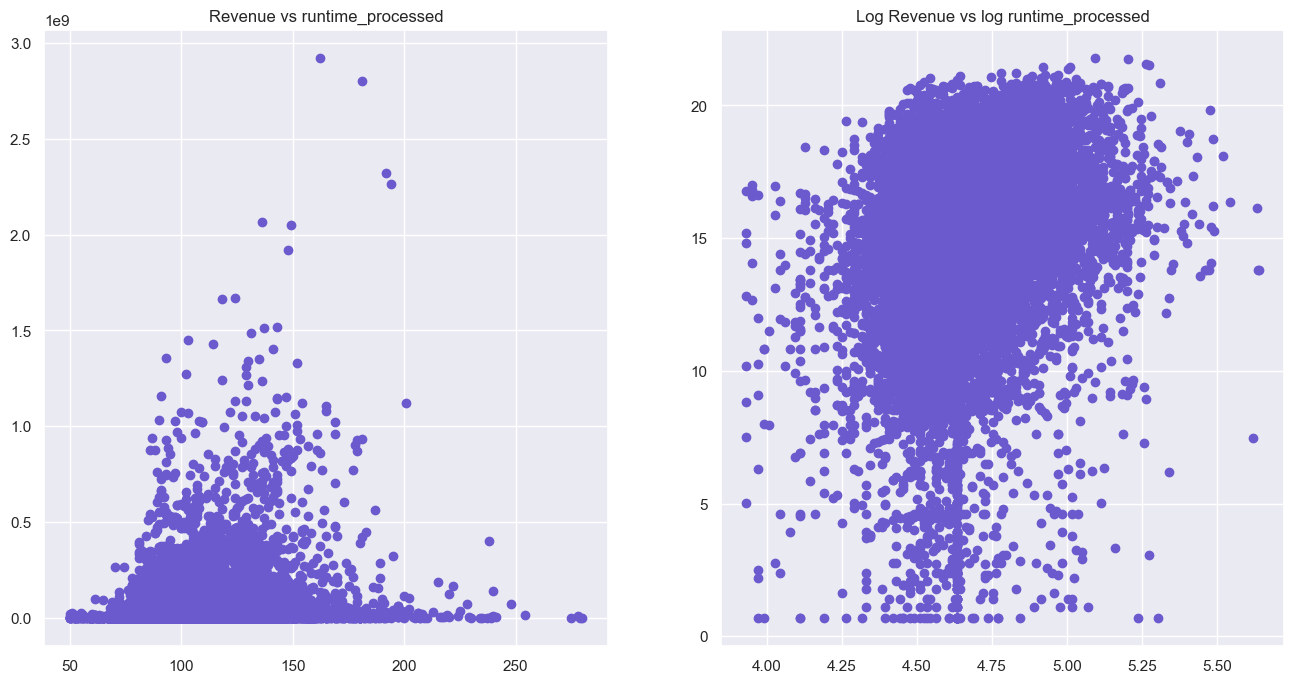

In [63]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(data['runtime_processed'], data['revenue'], color='slateblue')
plt.title('Revenue vs runtime_processed')
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(data['runtime_processed']), np.log1p(data['revenue']), color='slateblue')
plt.title('Log Revenue vs log runtime_processed')

In [64]:
# calculate Pearson's correlation
corr, _ = pearsonr(data['runtime_processed'], data['revenue'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['runtime_processed']), np.log1p(data['revenue']))
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.188
Pearsons correlation: 0.247


Chúng tôi quan sát thấy mối tương quan nhỏ giữa thời gian chạy và doanh thu của một bộ phim, vì vậy sẽ rất hữu ích nếu đưa vào mô hình của chúng tôi

In [65]:
num_features.append('runtime_processed')

## Adult

Cột này cho biết liệu bộ phim có được coi là chỉ phù hợp với người lớn hay không. Việc giới hạn đối tượng cũng sẽ ảnh hưởng tới doanh thu phim.

In [66]:
data['adult'].value_counts()

adult
False    16093
True        27
Name: count, dtype: int64

In [67]:
data['adult'] = data['adult'].map(lambda x: 1 if (x == True) else 0)
cat_features.append('adult')
cat_features

['status',
 '1960s',
 '1970s',
 '1980s',
 '1990s',
 '2000s',
 '2010s',
 'MondayRelease',
 'TuesdayRelease',
 'WednesdayRelease',
 'ThursdayRelease',
 'FridayRelease',
 'SaturdayRelease',
 'SundayRelease',
 'Winter',
 'Fall',
 'Spring',
 'Summer',
 'adult']

## Budget

Cột này thể hiện kinh phí của bộ phim, nghĩa là ước tính chi tiêu được xác định cho bộ phim. Theo trực quan, điều này có vẻ như là một biến số quan trọng để dự đoán doanh thu, bởi vì phim có kinh phí cao hơn và sản xuất cao hơn có thể sẽ thành công hơn, nhưng điều này chắc chắn không phải lúc nào cũng đúng và đáng để khám phá thêm.


In [68]:
print('Movies missing a budget:',data.budget.isna().sum())

Movies missing a budget: 0


C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\361873345.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data.budget, kde = False, ax = ax[1], color='mediumaquamarine', hist_kws=dict(alpha=1))
C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\361873345.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe575

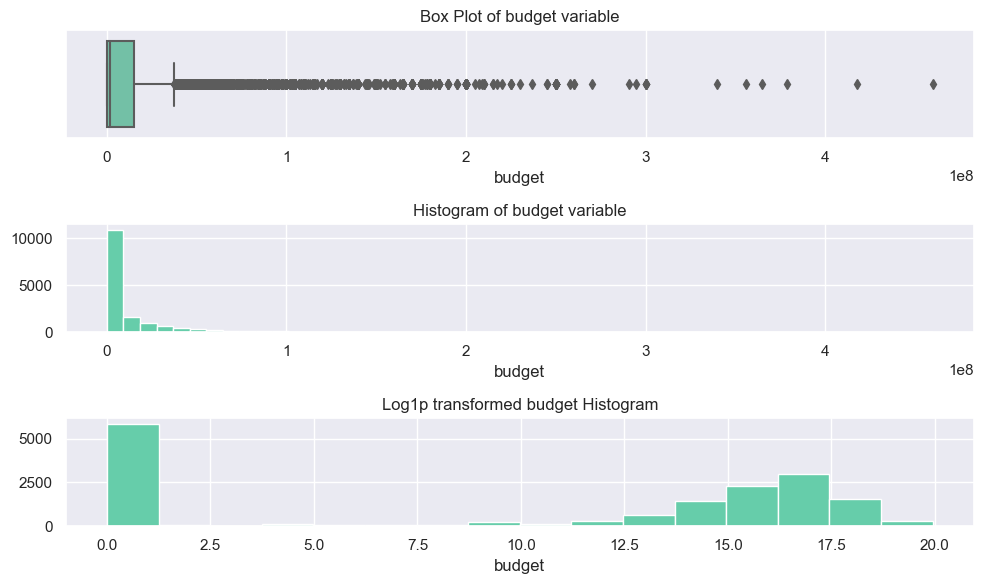

In [69]:
#plotting the data
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=data.budget, ax = ax[0], color='mediumaquamarine')
ax[0].set_title("Box Plot of budget variable")
sns.distplot(a=data.budget, kde = False, ax = ax[1], color='mediumaquamarine', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of budget variable")
sns.distplot(a=np.log1p(data.budget), kde = False, ax = ax[2], color='mediumaquamarine', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed budget Histogram")
f.tight_layout()

In [70]:
print('Movies with budget listed as 0: ',(data.budget == 0).sum())
print('Percentage movies with budget listed as 0: ',(data.budget == 0).sum() / data.shape[0] * 100)


Movies with budget listed as 0:  5826
Percentage movies with budget listed as 0:  36.141439205955336


Có hơn 36% phim trong dữ liệu của chúng tôi có kinh phí bằng 0. Điều này rất khó có thể chính xác vì mọi phim được sản xuất đều có một loại kinh phí nào đó, vì vậy có khả năng là những phim không tìm thấy ngân sách đã được thay thế bằng 0. Để làm sạch dữ liệu này, chúng tôi sẽ thay thế các giá trị 0 này bằng ngân sách trung vị để giảm độ lệch.

In [71]:
median = data.loc[data['budget'] > 0, 'budget'].median()
data["budget_processed"] = data["budget"].mask(data["budget"] == 0, median)

In [72]:
data.nsmallest(10, 'budget_processed')['budget_processed']

id
258913     1
717033     1
114903     1
865443     1
450154     1
954864     1
1047666    1
703014     1
996351     1
648468     1
Name: budget_processed, dtype: int64

Dường như có rất nhiều giá trị xấu ngoài những giá trị bằng 0. Chúng tôi cũng sẽ thay thế tất cả các giá trị cho ngân sách dưới 10.000 USD vì đây là giá trị tối thiểu hợp lý

In [73]:
median = data.loc[data['budget'] >= 10000, 'budget'].median()
data["budget_processed"] = data["budget"].mask(data["budget"] < 10000, median)

C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\3071422318.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data.budget_processed, kde = False, ax = ax[1], color='mediumaquamarine', hist_kws=dict(alpha=1))
C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\3071422318.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

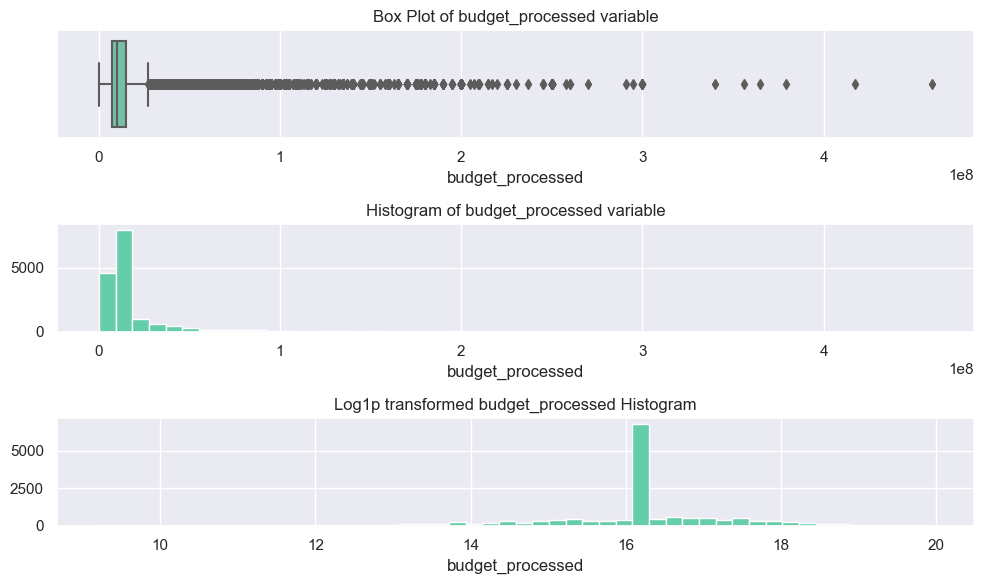

In [74]:
#plotting the data
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=data.budget_processed, ax = ax[0], color='mediumaquamarine')
ax[0].set_title("Box Plot of budget_processed variable")
sns.distplot(a=data.budget_processed, kde = False, ax = ax[1], color='mediumaquamarine', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of budget_processed variable")
sns.distplot(a=np.log1p(data.budget_processed), kde = False, ax = ax[2], color='mediumaquamarine', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed budget_processed Histogram")
f.tight_layout()

Vì có rất nhiều giá trị dưới 10.000 trong cột ngân sách nên có một cụm dữ liệu khổng lồ ở giá trị trung vị này. Phân phối này vẫn chưa lý tưởng, vì vậy chúng tôi sẽ tìm cách tốt hơn để thay thế các giá trị này sau này.

Text(0.5, 1.0, 'Log Revenue vs log budget_processed')

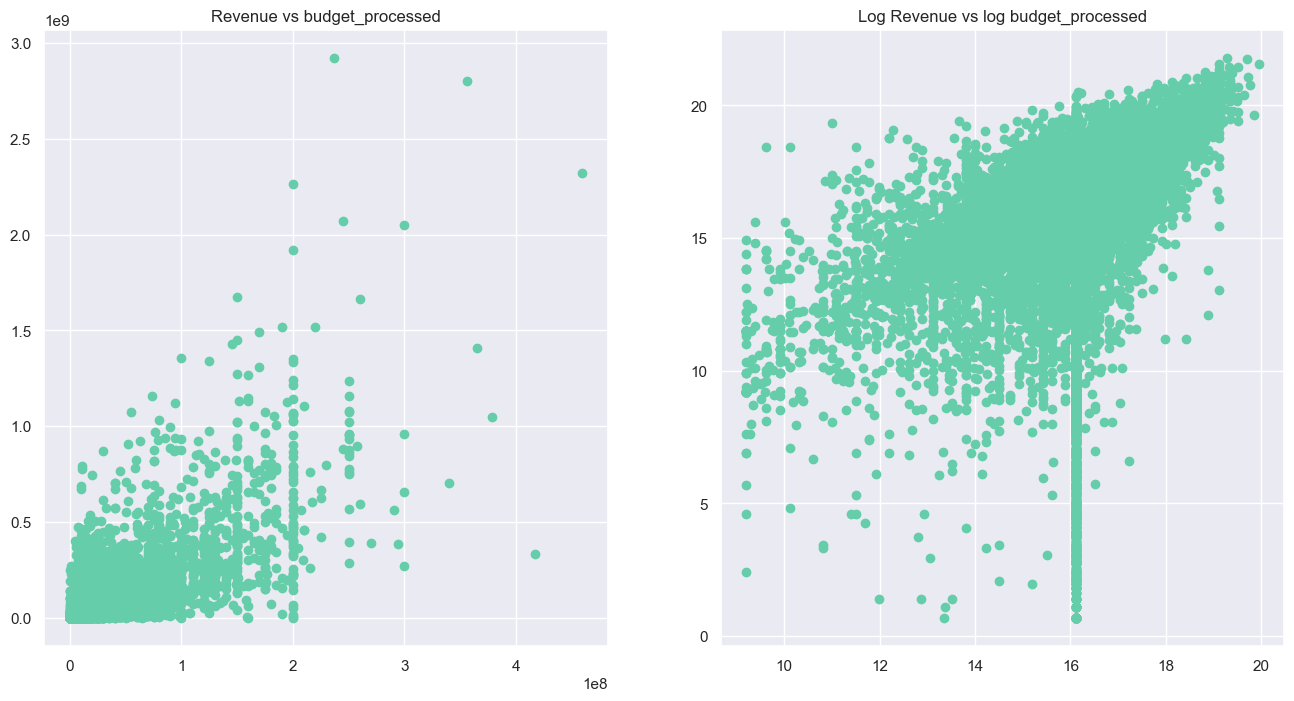

In [75]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(data['budget_processed'], data['revenue'], color='mediumaquamarine')
plt.title('Revenue vs budget_processed')
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(data['budget_processed']), np.log1p(data['revenue']), color='mediumaquamarine')
plt.title('Log Revenue vs log budget_processed')

In [76]:
num_features.append('budget_processed')

In [77]:
#analysis of correlation and create log feature probably
corr, _ = pearsonr(data['budget_processed'], data['revenue'])
print('Pearsons correlation between budget_processed and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['budget_processed']), np.log1p(data['revenue']))
print('Pearsons correlation between log transformed transformed budget_processed and log transformed revenue: %.3f' % corr)

Pearsons correlation between budget_processed and revenue: 0.746
Pearsons correlation between log transformed transformed budget_processed and log transformed revenue: 0.357


Chúng ta có thể thấy có mối tương quan khá chặt chẽ giữa ngân sách và doanh thu.

## Homepage

Cột này biểu thị thuộc tính này chứa trang chủ của trang web của bộ phim, nếu có. Thuộc tính này rất thú vị vì có khả năng những bộ phim nổi tiếng hơn sẽ có trang chủ hoặc thậm chí những bộ phim có trang chủ sẽ trở nên nổi tiếng hơn và có nhiều khả năng thành công hơn.


In [78]:
percentage_has_homepage = (~data['homepage'].isnull()).sum() / data.shape[0] * 100
print(f"Percentage of the movies that have homepage: {percentage_has_homepage:.2f}%")

Percentage of the movies that have homepage: 29.99%


In [79]:
data['has_homepage'] = data.homepage.apply(lambda x: 0 if pd.isnull(x) else 1)
data['has_homepage'].value_counts()

has_homepage
0    11285
1     4835
Name: count, dtype: int64

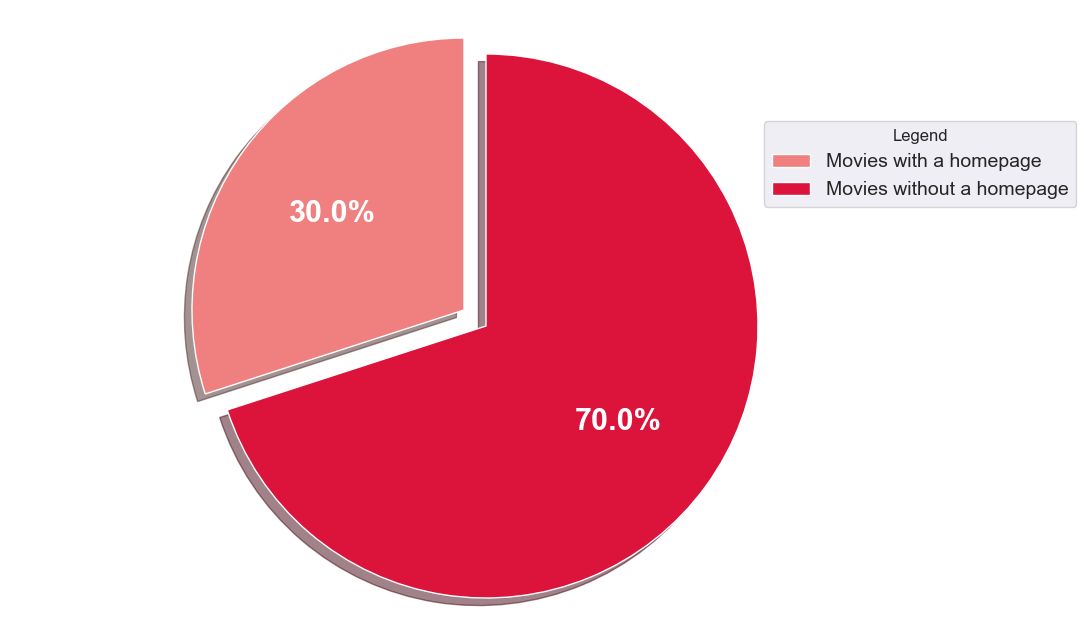

In [80]:
# plotting 'Movies with a homepage' data
labels = 'Movies with a homepage', 'Movies without a homepage'
btc_1 = [sum(data.has_homepage), (data.has_homepage == 0).sum(axis=0)]
explode = (0.1, 0)

colors = ['lightcoral', 'crimson']

fig, ax = plt.subplots()
ax.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
ax.axis('equal')

ax.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

plt.show()

Chúng ta có thể thấy rằng 70% phim không có trang chủ. 30% phim có trang chủ và điều này có thể liên quan đến những bộ phim được biết đến nhiều hơn. Trên thực tế, cũng có thể có nhiều phim hơn có trang chủ hoặc trang web, tuy nhiên, chúng có thể bị thiếu trong tập dữ liệu vì không có cách nào để phân biệt giữa dữ liệu bị thiếu và phim không có trang chủ, vì cả hai đều được đánh dấu là Null.


In [81]:
print("Mean revenue for movies with a homepage: %.2f" % data.loc[data['has_homepage'] == 1, "revenue"].mean())
print("Median revenue for movies with a homepage: %.2f" % data.loc[data['has_homepage'] == 1, "revenue"].median())
print()
print("Mean revenue for movies without a homepage: %.2f" % data.loc[data['has_homepage'] == 0, "revenue"].mean())
print("Median revenue for movies without a homepage: %.2f" % data.loc[data['has_homepage'] == 0, "revenue"].median())

Mean revenue for movies with a homepage: 91459815.86
Median revenue for movies with a homepage: 12884923.00

Mean revenue for movies without a homepage: 25210101.85
Median revenue for movies without a homepage: 3758328.00


C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\855197693.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.catplot(x='has_homepage', y='revenue', data=data, palette=pal1);


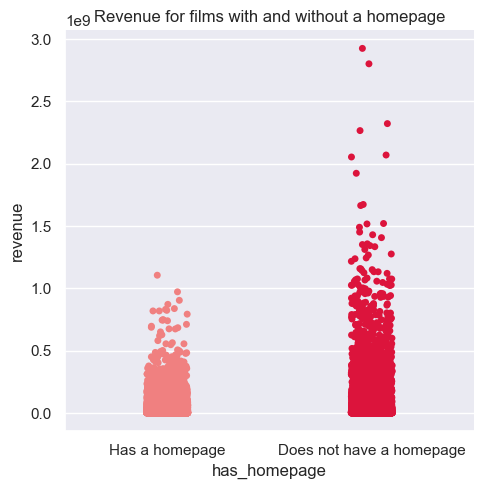

In [82]:
pal1 = ['lightcoral', 'crimson']

ax = sns.catplot(x='has_homepage', y='revenue', data=data, palette=pal1);
plt.title('Revenue for films with and without a homepage');

labels = 'Has a homepage', 'Does not have a homepage'
ax.set_xticklabels(labels)

In [83]:
cat_features.append('has_homepage')


In [84]:
corr, _ = pearsonr(data['has_homepage'], data['revenue'])
print('Pearsons correlation between has_homepage and revenue: %.3f' % corr)
corr, _ = pearsonr(data['has_homepage'], np.log1p(data['revenue']))
print('Pearsons correlation between has_homepage and log transformed revenue: %.3f' % corr)

Pearsons correlation between has_homepage and revenue: 0.236
Pearsons correlation between has_homepage and log transformed revenue: 0.152


Chúng ta có thể thấy có mối tương quan nhỏ giữa việc có trang chủ và doanh thu. Chúng tôi cũng quan sát thấy trong biểu đồ phân loại rằng những bộ phim không có trang chủ trên thực tế đạt doanh thu lớn hơn nhiều, tuy nhiên điều này có nhiều khả năng xảy ra hơn vì có số lượng phim lớn hơn nhiều trong tập dữ liệu. Chúng tôi cũng thấy rằng doanh thu trung bình của phim không có trang chủ cao hơn nhiều, nhưng điều này rõ ràng là do sự sai lệch vì doanh thu trung vị của phim có trang chủ lớn hơn


## Original laguage

Cột này thể hiện ngôn ngữ gốc của bộ phim được phát hành.

In [85]:
data.shape[0]

16120

In [86]:
print("Counts of each original language:")
print(data['original_language'].value_counts()[:10])

Counts of each original language:
original_language
en    10652
fr      638
es      626
ja      465
ru      416
hi      398
zh      380
it      278
de      265
ko      250
Name: count, dtype: int64


In [87]:
data[data['original_language'] == 'en'].shape[0] / data.shape[0] * 100

66.07940446650124

Text(0.5, 1.0, 'Revenue for a movie and its and original_language')

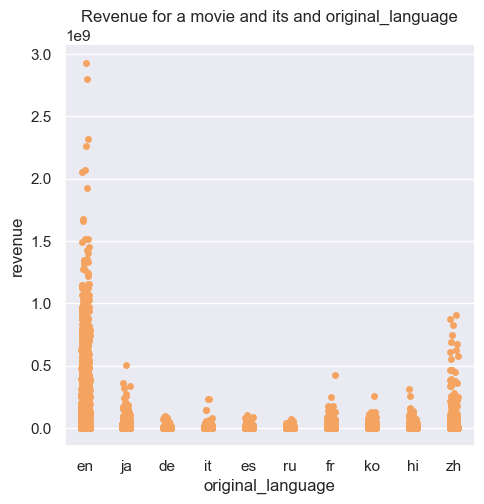

In [88]:
sns.catplot(x='original_language', y='revenue', color='sandybrown', data=data.loc[data['original_language'].isin(data['original_language'].value_counts().head(10).index)])
plt.title('Revenue for a movie and its and original_language')

Vì có tới 66% phim trong dữ liệu được phát hành bằng tiếng Anh và các ngôn ngữ khác chỉ chiếm một phần nhỏ trong số phim nên chúng tôi sẽ tạo một biến mới, chỉ cần xác định xem phim có được phát hành bằng tiếng Anh hay không. Có vẻ như ngôn ngữ cụ thể khác là gì không quan trọng mà chỉ là bộ phim không phải tiếng Anh mới là điều quan trọng nhất đối với mô hình của chúng tôi. Ngoài ra, những bộ phim bằng tiếng Anh đạt doanh thu cao hơn rất nhiều, vì vậy đây có thể là một thuộc tính hay để đưa vào


In [89]:
#Creating new feature
data['originally_english'] = data.original_language.apply(lambda x: 1 if x == 'en' else 0)
data['originally_english'].value_counts()


originally_english
1    10652
0     5468
Name: count, dtype: int64

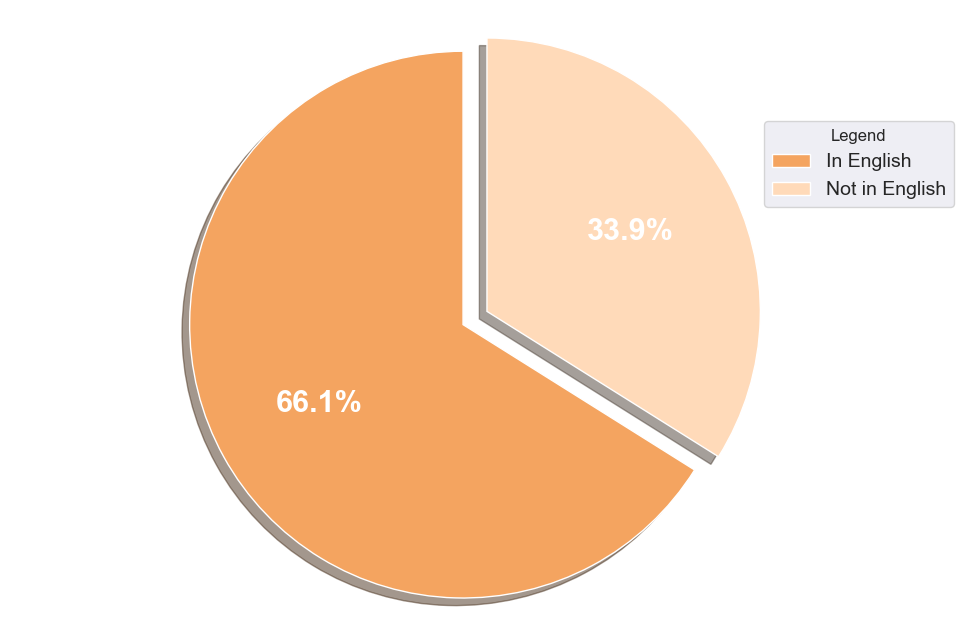

In [90]:
# plotting original data
labels = 'In English', 'Not in English'
btc_1 = [(data.originally_english == 1).sum(axis=0), (data.originally_english == 0).sum(axis=0)]
explode = (0.1, 0)

colors = ['sandybrown', 'peachpuff']

fig, ax = plt.subplots()
ax.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
ax.axis('equal') # ensures chart is a circle

ax.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

plt.show()

C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\4253979986.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.catplot(x='originally_english', y='revenue', data=data, palette=pal2);


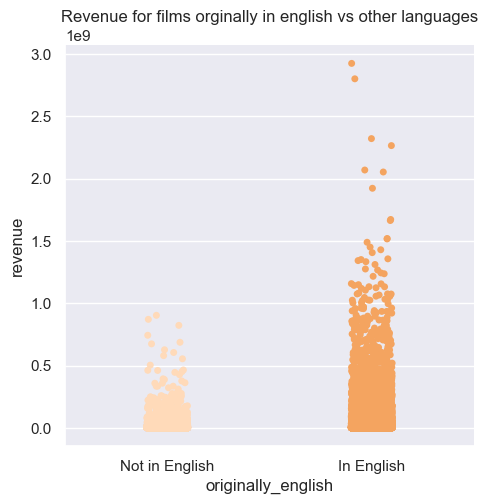

In [91]:
pal2 = ['peachpuff', 'sandybrown']

ax = sns.catplot(x='originally_english', y='revenue', data=data, palette=pal2);
plt.title('Revenue for films orginally in english vs other languages');

labels = 'Not in English', 'In English'
ax.set_xticklabels(labels)

In [92]:
cat_features.append('originally_english')

In [93]:
#analysis of correlation and create log feature probably
corr, _ = pearsonr(data['originally_english'], data['revenue'])
print('Pearsons correlation between in_english and revenue: %.3f' % corr)

Pearsons correlation between in_english and revenue: 0.179


Chúng ta có thể thấy có mối tương quan nhỏ giữa phim nói tiếng Anh và doanh thu của phim. Mặc dù nhìn chung phim nói tiếng Anh đạt doanh thu cao hơn nhiều, nhưng điều này có thể đơn giản chỉ vì có số lượng phim phát hành bằng tiếng Anh lớn hơn nhiều.

## Overview

Cột này chứa thông tin tóm tắt chung về nội dung của bộ phim. Có thể phần tổng quan được xây dựng tốt sẽ thu hút sự chú ý của khán giả dựa trên những bộ phim họ xem từ việc đọc phần tổng quan, nhưng không chắc đây là một phần lớn động lực để xem phim.

In [94]:
print('Movies missing an overview:',data.overview.isna().sum())

Movies missing an overview: 396


Trước tiên, chúng tôi sẽ lấp đầy những bộ phim bị thiếu phần tổng quan bằng một xâu rỗng, sau đó chúng tôi sẽ xem xét độ dài của phần tổng quan. Nội dung trong phần tổng quan có thể là nội dung thú vị để phân tích, nhưng chúng tôi sẽ không xem xét nội dung đó vì nằm ngoài phạm vi của dự án này.

In [95]:
data.overview = data.overview.fillna("")
data['overview_len'] = data.overview.apply(len)

C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\3681396010.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=data.overview_len, kde = False, ax = ax[1], color='skyblue', hist_kws=dict(alpha=1))
C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\3681396010.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

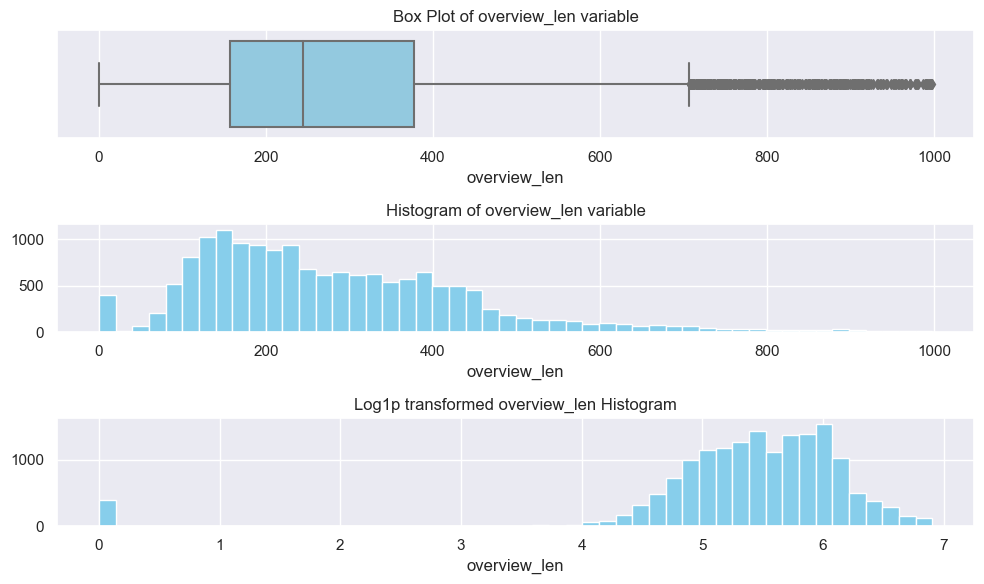

In [96]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=data.overview_len, ax = ax[0], color='skyblue')
ax[0].set_title("Box Plot of overview_len variable")
sns.distplot(a=data.overview_len, kde = False, ax = ax[1], color='skyblue', hist_kws=dict(alpha=1))
ax[1].set_title("Histogram of overview_len variable")
sns.distplot(a=np.log1p(data.overview_len), kde = False, ax = ax[2], color='skyblue', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed overview_len Histogram")
f.tight_layout()

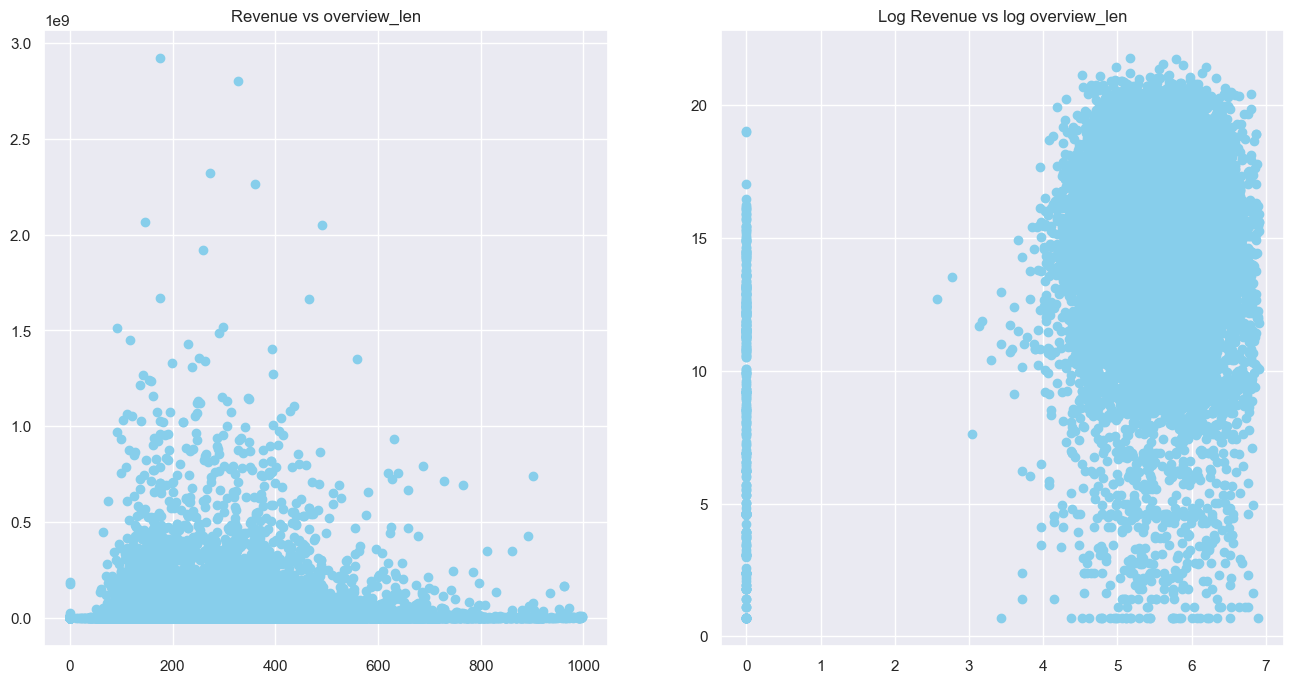

In [97]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(data['overview_len'], data['revenue'], color='skyblue')
plt.title('Revenue vs overview_len');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(data['overview_len']), np.log1p(data['revenue']), color='skyblue')
plt.title('Log Revenue vs log overview_len');

In [98]:
# calculate Pearson's correlation
corr, _ = pearsonr(data['overview_len'], data['revenue'])
print('Pearsons correlation between overview_len and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['overview_len']), np.log1p(data['revenue']))
print('Pearsons correlation between log transformed  overview_len and log transformed revenue:: %.3f' % corr)

Pearsons correlation between overview_len and revenue: 0.015
Pearsons correlation between log transformed  overview_len and log transformed revenue:: 0.239


Dường như hầu như không có mối tương quan giữa các biến này và mặc dù chúng tôi không thể loại trừ mối quan hệ chỉ dựa trên Pearson's correlation, chúng tôi sẽ không đưa nó vào mô hình của mình vì độ dài của phần Overview khá không đáng kể. Nếu chúng tôi thực hiện một số NLP, phần tổng quan có thể hữu ích và việc kiểm tra sâu hơn nội dung và mô hình tổng quan về những bộ phim thành công có thể thú vị, nhưng điều đó nằm ngoài phạm vi của dự án này nên chúng tôi sẽ bỏ phần này

In [99]:
cols_to_drop.append('overview')


## Popularity

Cột này chứa số liệu về mức độ phổ biến của một bộ phim, tuy nhiên, rất không rõ con số này thực sự có ý nghĩa gì vì nó không tuân theo thang đo hoặc hệ thống xếp hạng rõ ràng và rõ ràng. Chúng ta sẽ khám phá thêm về biến để hiểu rõ hơn


C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\1411414077.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['popularity'], kde=True, color='goldenrod', hist_kws=dict(alpha=1))


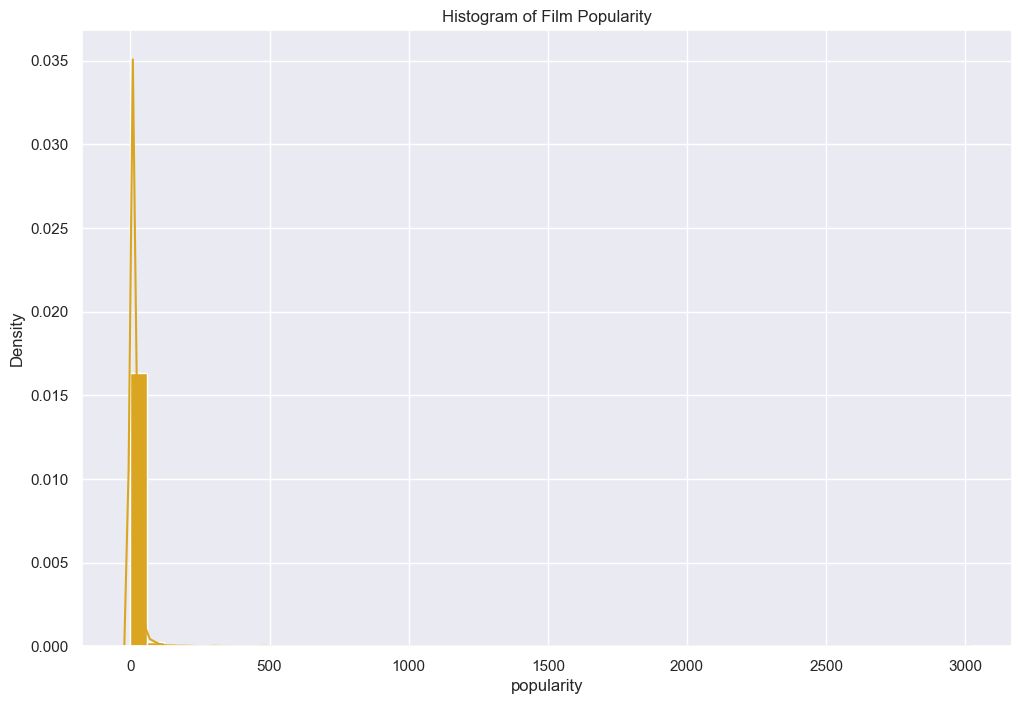

In [100]:
# plotting popularity
sns.distplot(data['popularity'], kde=True, color='goldenrod', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(12, 2)})
plt.title('Histogram of Film Popularity')
plt.show()

C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\3692659865.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['popularity'], kde=True, color='goldenrod', hist_kws=dict(alpha=1))


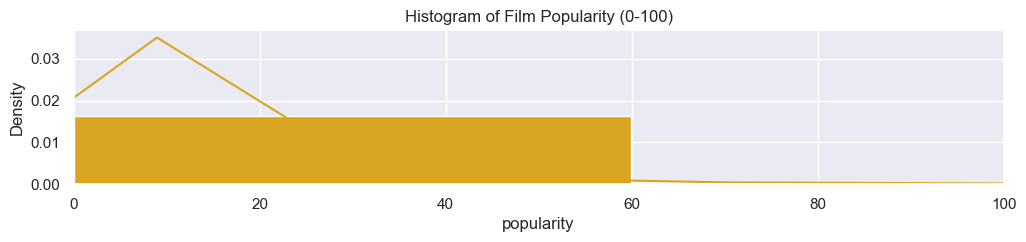

In [101]:
# plotting popularity
sns.distplot(data['popularity'], kde=True, color='goldenrod', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(12, 2)})
plt.title('Histogram of Film Popularity (0-100)')
plt.xlim(0, 100)
plt.show()

In [102]:
print(data['popularity'].describe())

count    16120.000000
mean        15.298877
std         49.886142
min          0.000000
25%          3.840250
50%         10.076000
75%         16.916500
max       2994.357000
Name: popularity, dtype: float64


Mức độ phổ biến có thể là một đặc điểm quan trọng trong việc dự đoán kết quả doanh thu do tầm quan trọng của mức độ phổ biến đối với lượng người xem phim (điều này tất nhiên phụ thuộc vào việc độ phổ biến có thể hiểu được là sự hào hứng xung quanh một bộ phim chứ không phải là các đánh giá sau khi phát hành - nếu là sau khi phát hành, độ phổ biến sẽ nên tương ứng trực tiếp với doanh thu). Bởi vì độ phổ biến càng cao, điều này được xem là tích cực cho chiến lược tiếp thị, và do đó làm tăng doanh số bán vé, giả sử rằng độ phổ biến và doanh thu sẽ có một mối quan hệ tích cực. Ở trên, có thể thấy rằng trong số 16120 bộ phim trong tập dữ liệu, mức độ phổ biến trung bình là 15.3 với mức tối thiểu là 0,00 và tối đa là 2994.35. Biểu đồ cho thấy rằng phần lớn các bộ phim nằm trong khoảng điểm phổ biến từ 0 đến 60, với các ngoại lệ rất phổ biến thưa thớt. Việc xử lý các ngoại lệ này sẽ được giải quyết sau


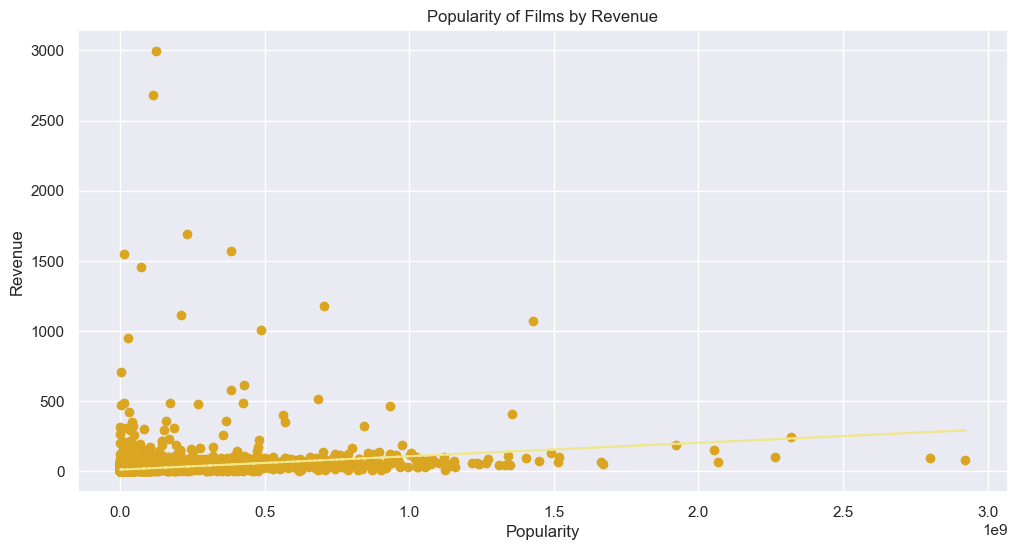

In [103]:
# bivariate: plotting popularity and revenue
sns.set(rc={'figure.figsize':(12, 6)})
cx = data['revenue']
pop = data['popularity']
plt.plot(cx, pop, 'o', color='goldenrod')
plt.ylabel("Revenue")
plt.xlabel("Popularity")
plt.title("Popularity of Films by Revenue")

z = np.polyfit(cx, pop, 1)
p = np.poly1d(z)
plt.plot(cx, p(cx), "--", color='khaki')

In [104]:
#analysis of correlation
corr, _ = pearsonr(data['popularity'], data['revenue'])
print('Pearsons correlation between popularity and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['popularity']), np.log1p(data['revenue']))
print('Pearsons correlation between log popularity and log revenue: %.3f' % corr)

Pearsons correlation between popularity and revenue: 0.246
Pearsons correlation between log popularity and log revenue: 0.649


Trong việc so sánh độ phổ biến (popularity) với doanh thu có một sự tương quan nhất định. Điều này là dễ hiểu vì sự ảnh hưởng của độ phổ biến đối với thành công về mặt tài chính của một bộ phim thông qua sự phát triển của lượt xem. Có thể tiến hành điều tra sâu hơn bằng cách thực hiện thí nghiệm với các giá trị ngoại lệ; đặc biệt, một số bộ phim có độ phổ biến rất cao nhưng không đạt được doanh thu cao đồng thời, dẫn đến kết luận rằng độ phổ biến không phải là một chỉ số hoàn hảo cho doanh thu của một bộ phim.

Tuy nhiên, do sự nhầm lẫn liên quan đến giá trị ngoại lệ và khoảng giá trị mà thuộc tính này được tạo ra, đặc điểm này thiếu sự rõ ràng. Hơn nữa, có vẻ như độ phổ biến chỉ có thể được đánh giá sau khi bộ phim đã được phát sóng, điều này có nghĩa là nó không hữu ích cho một hãng phim như một chỉ số để dự đoán tổng doanh thu của rạp chiếu phim. Thay vào đó, độ phổ biến có thể được sử dụng như một nhãn khác. Do đó, cho mục đích của dự án này, đặc điểm độ phổ biến sẽ không được bao gồm trong mô hình

In [105]:
cols_to_drop.append('popularity')

## Original Title

Cột này thể hiện tiêu đề gốc của phim, có thể là trước khi phim được phát hành. Cột 'Title' cũng chứa tiêu đề của bộ phim, khiến cột này khá vô dụng đối với mô hình của chúng tôi. Chúng tôi không thể tìm ra bất kỳ lợi ích nào khi phân tích thuộc tính này, vì vậy chúng tôi sẽ bỏ nó đi

In [106]:
cols_to_drop.append('original_title')

## Backdrop Path

Cột này chứa đường dẫn đến phông nền phim. Các phông nền phim có thể rất thú vị khi xem xét mối quan hệ của chúng với doanh thu, nhưng việc phân tích nội dung của những tấm phông nền này nằm ngoài phạm vi của dự án này


In [107]:
cols_to_drop.append('backdrop_path')

## Poster_path

Cột này chứa đường dẫn đến poster phim. Các poster phim có thể rất thú vị khi xem xét mối quan hệ của chúng với doanh thu, nhưng việc phân tích nội dung của những tấm poster này nằm ngoài phạm vi của dự án này


In [108]:
cols_to_drop.append('poster_path')

## Tagline

Cột này chứa dòng giới thiệu của một bộ phim, về cơ bản là một cụm từ ngắn nhằm đại diện cho bộ phim. Nội dung của dòng giới thiệu có thể thú vị để phân tích cho một số loại phân tích nhất định nhưng một lần nữa, điều đó nằm ngoài phạm vi dự án của chúng tôi.

In [109]:
data['tagline']

id
31866     You will thrill to every unforgettable moment ...
192       Who, in the name of God, is getting away with ...
616820                     This Halloween, their saga ends.
518021                                                  NaN
38973                                                   NaN
                                ...                        
26672                                                   NaN
74178                    A superhero who wanted to be a boy
9359      In their hands, a deck of cards was the only t...
41479     They're not just living the American dream, th...
964              The greatest horror film of modern cinema!
Name: tagline, Length: 16120, dtype: object

In [110]:
print('Movies missing a tagline:', data.tagline.isna().sum())
print('Percentage movies missing a tagline:', data.tagline.isna().sum()/ data.shape[0] * 100)


Movies missing a tagline: 4996
Percentage movies missing a tagline: 30.992555831265513


Vì chúng tôi sẽ không phân tích nội dung nên thay vào đó chúng tôi sẽ chỉ kiểm tra xem phim có dòng giới thiệu hay không


In [111]:
data['has_tagline'] = data.tagline.apply(lambda x: 1 if type(x) == str else 0)

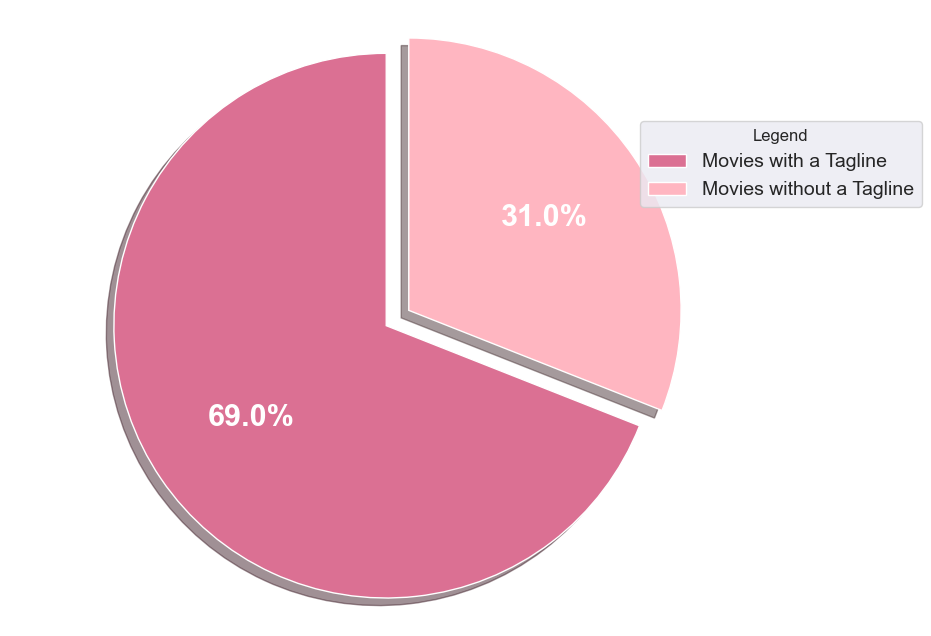

In [112]:
# plotting belongs to collection data
labels = 'Movies with a Tagline', 'Movies without a Tagline'
btc_1 = [(data.has_tagline == 1).sum(axis=0), (data.has_tagline == 0).sum(axis=0)]
explode = (0.1, 0)

colors = ['palevioletred', 'lightpink']

# plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
ax.axis('equal') # ensures chart is a circle

ax.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

[Text(0, 0, 'Does not have tagline'), Text(1, 0, 'Has tagline')]

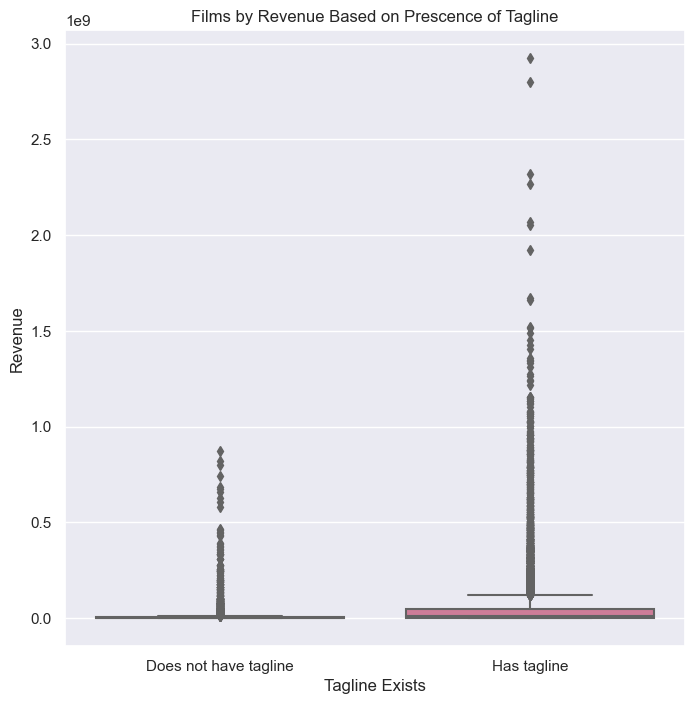

In [113]:
pal1 = ['lightpink', 'palevioletred']

sns.set(rc={'figure.figsize':(8, 8)})
ax = sns.boxplot(x='has_tagline', y='revenue', data=data, palette=pal1)
plt.title('Films by Revenue Based on Prescence of Tagline')
plt.ylabel("Revenue")
plt.xlabel("Tagline Exists")
labels = 'Does not have tagline', 'Has tagline'
ax.set_xticklabels(labels)

C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\957636803.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.catplot(x='has_tagline', y='revenue', data=data, palette=pal4);


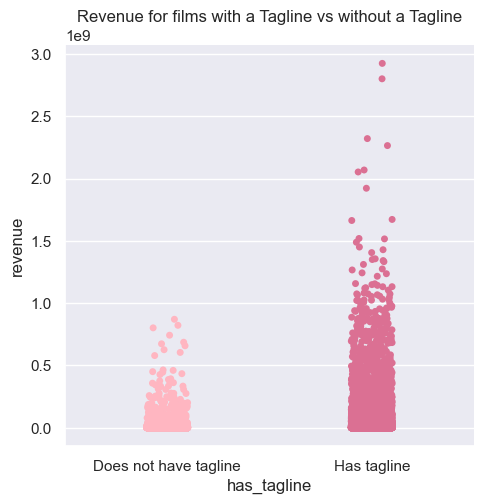

In [114]:
pal4 = ['lightpink', 'palevioletred']

ax = sns.catplot(x='has_tagline', y='revenue', data=data, palette=pal4);
plt.title('Revenue for films with a Tagline vs without a Tagline');

labels = 'Does not have tagline', 'Has tagline'
ax.set_xticklabels(labels)

In [115]:
#analysis of correlation and create log feature
corr, _ = pearsonr(data['has_tagline'], data['revenue'])
print('Pearsons correlation between has_tagline and revenue: %.3f' % corr)
corr, _ = pearsonr(data['has_tagline'], np.log1p(data['revenue']))
print('Pearsons correlation between has_tagline and log transformed revenue: %.3f' % corr)

Pearsons correlation between has_tagline and revenue: 0.177
Pearsons correlation between has_tagline and log transformed revenue: 0.347


Chúng tôi quan sát thấy mối tương quan giữa sự tồn tại của dòng giới thiệu và doanh thu của phim nên chúng tôi quyết định đưa thuộc tính này vào mô hình.

In [116]:
cat_features.append('has_tagline')

## Genres

Cột này đại diện cho các thể loại của một bộ phim. Các thể loại khác nhau có thể đạt doanh thu phòng vé khác nhau, vì vậy đây có thể là một biến số thú vị để khám phá và xem liệu có mối liên hệ nào với doanh thu không


In [117]:
data['genres'].head()

id
31866                 Comedy, Drama, Romance
192                 Drama, Thriller, Mystery
616820                      Horror, Thriller
518021                         Action, Drama
38973     Action, Adventure, Science Fiction
Name: genres, dtype: object

In [118]:
print("Movies misssing genres: ",data['genres'].isna().sum())

Movies misssing genres:  120


Cột thể loại khá lộn xộn. Trước tiên chúng ta sẽ cần thực hiện một số bước tiền xử lý để làm việc với dữ liệu. Chúng tôi sẽ trích xuất tên thể loại ngăn cách bằng dấu "," và tạo danh sách thể loại cho từng phim trong một cột mới. Chúng tôi cũng sẽ điền vào các giá trị Na bằng "None".

In [119]:
data['genres'] = data['genres'].fillna('None')
data['genres_reform'] = data['genres'].apply(lambda x: [genre.strip() for genre in x.split(',')])


In [120]:
data['genres_reform']

id
31866                        [Comedy, Drama, Romance]
192                        [Drama, Thriller, Mystery]
616820                             [Horror, Thriller]
518021                                [Action, Drama]
38973            [Action, Adventure, Science Fiction]
                             ...                     
26672         [Adventure, Fantasy, Animation, Family]
74178                               [Family, Fantasy]
9359      [Action, Adventure, Comedy, Drama, Western]
41479                                 [Comedy, Drama]
964                                   [Drama, Horror]
Name: genres_reform, Length: 16120, dtype: object

Bây giờ chúng tôi có danh sách thể loại cho từng phim, chúng tôi sẽ mã hoá tất cả các thể loại để mô hình có thể học dễ dàng hơn. Mặc dù không được nghiên cứu trong nghiên cứu này, nhưng một con đường thú vị cho việc tìm hiểu trong tương lai có thể liên quan đến khía cạnh thời gian của các xu hướng trong thể loại. Có thể các thể loại khác nhau sẽ thu hút sự quan tâm khác nhau của khán giả qua các thời kỳ.

In [121]:
from sklearn.preprocessing import MultiLabelBinarizer

# Use MultiLabelBinarizer for binary encoding
mlb = MultiLabelBinarizer()
genres_encoded = pd.DataFrame(mlb.fit_transform(data['genres_reform']), columns=mlb.classes_, index=data.index)

data = pd.concat([data, genres_encoded], axis=1)
cat_features.extend(genres_encoded.columns)

In [122]:
# new feature for a count of the number of genres
data['num_genres'] = data.genres_reform.apply(lambda x: len(x))
data['num_genres'].value_counts()


num_genres
2    5579
3    4845
1    3630
4    1564
5     408
6      82
7      11
9       1
Name: count, dtype: int64

Chúng tôi tạo một thuộc tính mới để đếm số lượng thể loại được liệt kê cho một bộ phim, điều này có thể thú vị để xem liệu có bất kỳ mối tương quan nào với doanh thu hay không.

Text(0.5, 0, 'Genre')

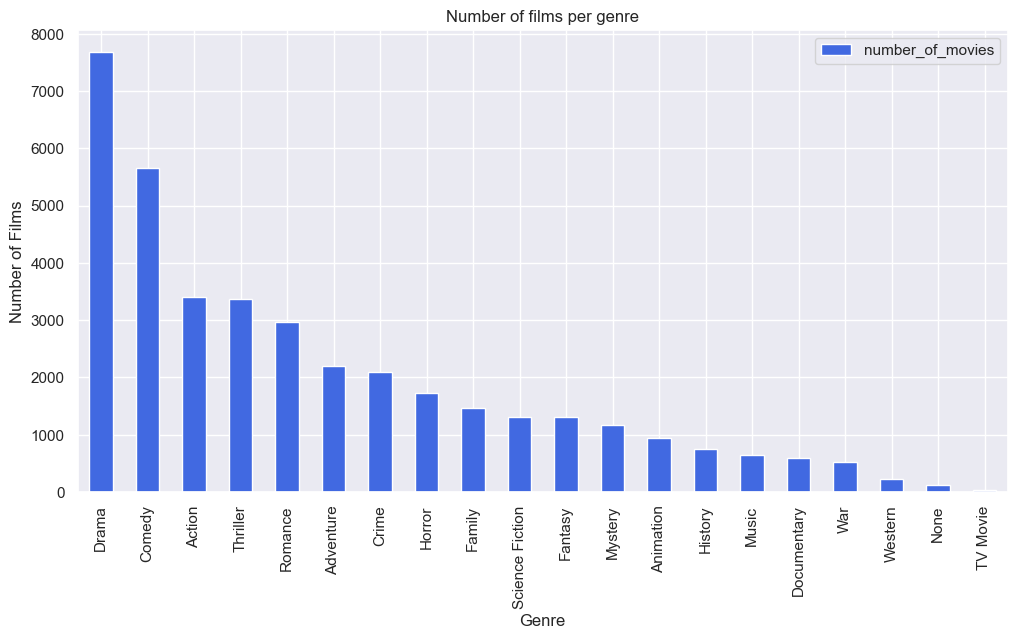

In [123]:
# plotting genres in order of number of instances in the df.csv dataset
genresDict = dict()

for genre in data["genres_reform"]:
    for elem in genre:
        if elem not in genresDict:
            genresDict[elem] = 1
        else:
            genresDict[elem] += 1


sns.set(rc={'figure.figsize':(12,6)})
genres_df = pd.DataFrame.from_dict(genresDict, orient='index')
genres_df.columns = ["number_of_movies"]
genres_df = genres_df.sort_values(by="number_of_movies", ascending=False)
genres_df.plot.bar(color='royalblue')
plt.title("Number of films per genre")
plt.ylabel("Number of Films")
plt.xlabel("Genre")

Ba thể loại phim phổ biến nhất là Drama, Comedy và Action

In [124]:
# bivariate analysis of revenue with genre
# creating a callable index for genres
genres_df.index.values
for g in genres_df.index.values:
    data[g] = data['genres_reform'].apply(lambda x: 1 if g in x else 0)

# median revenue per genre type
for i, g in enumerate(genres_df.index.values):
    genres_df.loc[g, "median_rev"] = data[data[g]==1].revenue.median()
    
genres_df.sort_values(by=["number_of_movies", "median_rev"], ascending=False).head(10)

# mean revenue for genre type
for i, g in enumerate(genres_df.index.values):
    genres_df.loc[g, "mean_rev"] = data[data[g]==1].revenue.mean()

genres_df.sort_values(by=["number_of_movies", "mean_rev"], ascending=False).head(10)

,number_of_movies,median_rev,mean_rev
Drama,7680,3750000.0,2.900786e+07
Comedy,5656,7189649.0,4.344519e+07
Action,3411,13767037.0,8.825763e+07
Thriller,3366,8115998.5,4.775125e+07
Romance,2976,5753584.0,3.423707e+07
Adventure,2192,24007195.0,1.344848e+08
Crime,2101,8000000.0,4.014371e+07
Horror,1729,3643652.0,2.838566e+07
Family,1464,17779112.5,9.469365e+07
Science Fiction,1316,15528170.0,1.124030e+08


Text(0.5, 0, 'Genre')

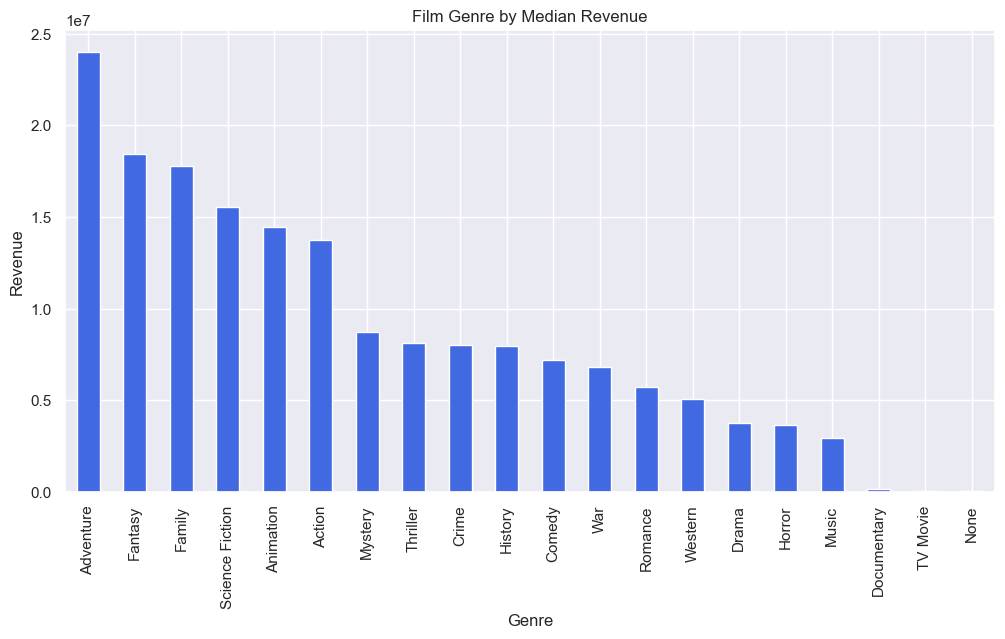

In [125]:
# genres by median revenue
genres_df.sort_values(by=["median_rev"], ascending=False).median_rev.plot.bar(color='royalblue')
plt.title("Film Genre by Median Revenue")
plt.ylabel("Revenue")
plt.xlabel("Genre")

Text(0.5, 0, 'Genre')

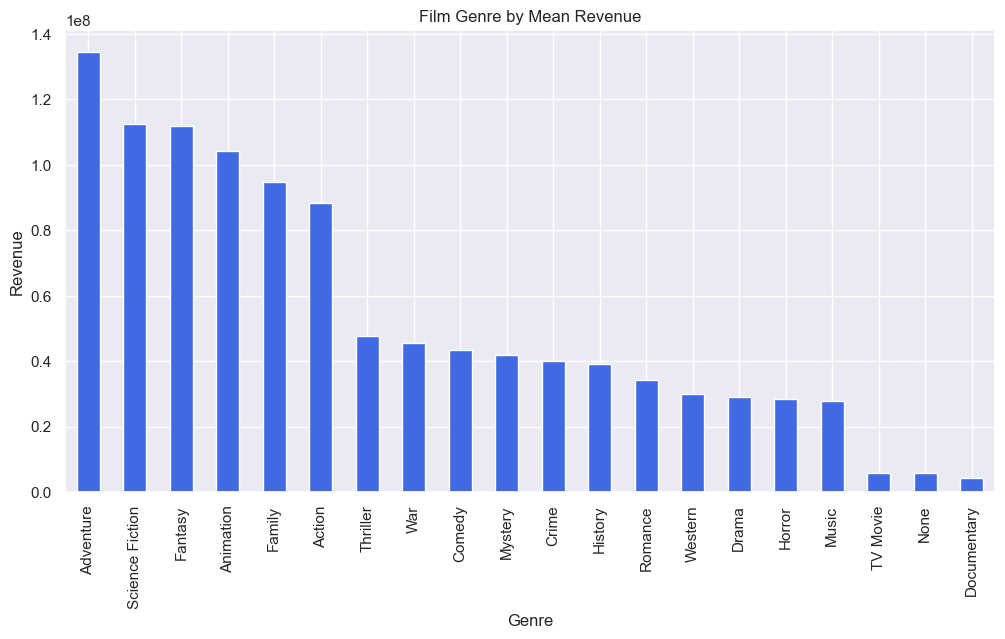

In [126]:
# genres by mean revenue
genres_df.sort_values(by=["mean_rev"], ascending=False).mean_rev.plot.bar(color='royalblue')
plt.title("Film Genre by Mean Revenue")
plt.ylabel("Revenue")
plt.xlabel("Genre")

Cả trong 'Thể loại phim theo Doanh thu Trung bình' và 'Thể loại phim theo Doanh thu Trung vị', phim thuộc thể loại Adventure đều có giá trị doanh thu cao nhất, với thứ tự khá ổn định từ trên xuống, trừ một số thay đổi về thứ bậc đáng chú ý.

Mặc dù một số thể loại phim phổ biến (có số lượng phim lớn trong dữ liệu huấn luyện) đạt kết quả tốt về doanh thu, nhưng giả thuyết tổng quát rằng sự phổ biến của một bộ phim sẽ có mối tương quan tích cực với doanh thu bị phủ định bởi doanh thu tương đối thấp của các thể loại Drama, Comedy và Action (ba thể loại phim phổ biến nhất). Điều này có thể là kết quả của nhu cầu thể loại quá mức, hoặc có thể không liên quan. Nhưng có một điểm chắc chắn là phim Adventure, Family, Sci-Fi, Fantasy và Animation đều có doanh thu tốt cả về trung vị và trung bình.

<Axes: >

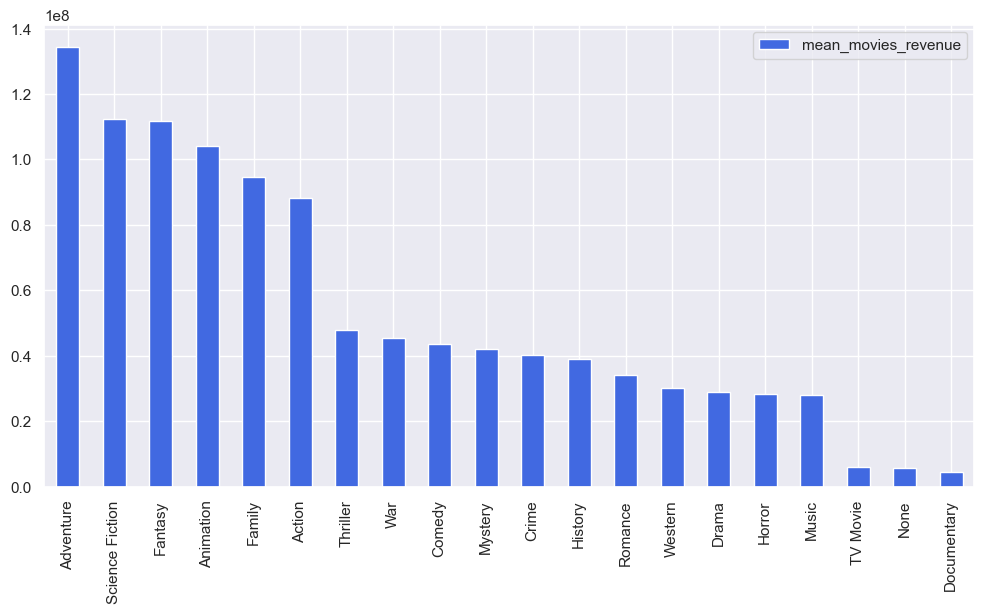

In [127]:
topGenreDict = {}
for element in data[["revenue", "genres_reform"]].values:
   # compare results when looking at top genre
    for i in range(len(element[1])):
        if element[1][i] not in topGenreDict:
            topGenreDict[element[1][i]] = [element[0], 1]
        else:
            topGenreDict[element[1][i]][0] += element[0]
            topGenreDict[element[1][i]][1] += 1    

for genre in topGenreDict:
    topGenreDict[genre][0] = topGenreDict[genre][0]/topGenreDict[genre][1]
    topGenreDict[genre] = topGenreDict[genre][0]
  
genres_df = pd.DataFrame.from_dict(topGenreDict, orient='index', columns=["mean_movies_revenue"])
genres_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='royalblue')

In [128]:
# Sort both of our dicts of genres and top genres to more easily access the 'most successful genres'
topGenreDict = {k: v for k, v in sorted(topGenreDict.items(), key=lambda item: item[1], reverse = False)}
genresDict = {k: v for k, v in sorted(genresDict.items(), key=lambda item: item[1], reverse = True)}
print(topGenreDict)
print(genresDict)

{'Documentary': 4428961.822445561, 'None': 5776003.816666666, 'TV Movie': 5927607.425, 'Music': 27879710.384735204, 'Horror': 28385661.05610179, 'Drama': 29004081.11640625, 'Western': 30027112.75892857, 'Romance': 34237065.84038979, 'History': 39022727.27055703, 'Crime': 40143712.39409805, 'Mystery': 41975596.8024055, 'Comedy': 43445189.26149222, 'War': 45549386.459047616, 'Thriller': 47751252.678550206, 'Action': 88257626.3128115, 'Family': 94693653.83948088, 'Animation': 104057385.14818764, 'Fantasy': 111812901.2265745, 'Science Fiction': 112402961.41945289, 'Adventure': 134484815.86177006}
{'Drama': 7680, 'Comedy': 5656, 'Action': 3411, 'Thriller': 3366, 'Romance': 2976, 'Adventure': 2192, 'Crime': 2101, 'Horror': 1729, 'Family': 1464, 'Science Fiction': 1316, 'Fantasy': 1302, 'Mystery': 1164, 'Animation': 938, 'History': 754, 'Music': 642, 'Documentary': 597, 'War': 525, 'Western': 224, 'None': 120, 'TV Movie': 40}


In [129]:
def getGenreRank(genres):
    sum = 0
    for g in genres:
        sum += list(topGenreDict.keys()).index(g)
    return (sum / len(genres))

In [130]:
data['genre_rank'] = data['genres_reform'].apply(lambda x: getGenreRank(x) if len(x) > 0 else 0)
data['genre_rank'].value_counts()


genre_rank
5.000000     1421
11.000000    1406
9.000000     1347
8.000000      878
6.000000      808
             ... 
13.833333       1
12.200000       1
15.166667       1
11.285714       1
7.600000        1
Name: count, Length: 152, dtype: int64

Sử dụng dict của top genres (theo doanh thu), chúng tôi tạo ra một hệ thống xếp hạng mà chúng tôi sẽ sử dụng như một đặc trưng cho mô hình của chúng tôi. Xếp hạng càng cao của một thể loại phim (dựa trên trung bình của tất cả các thể loại được liệt kê), thì thể loại đó thường tạo ra ít doanh thu hơn.

In [131]:
num_features.append('genre_rank')
num_features.append('num_genres')

In [132]:
#analysis of correlation and create log feature
corr, _ = pearsonr(data['genre_rank'], data['revenue'])
print('Pearsons correlation between genre_rank and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['genre_rank']), np.log1p(data['revenue']))
print('Pearsons correlation between log transformed genre_rank and log transformed revenue: %.3f' % corr)

Pearsons correlation between genre_rank and revenue: 0.266
Pearsons correlation between log transformed genre_rank and log transformed revenue: 0.295


In [133]:
#analysis of correlation and create log feature
corr, _ = pearsonr(data['num_genres'], data['revenue'])
print('Pearsons correlation between num_genres and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['num_genres']), np.log1p(data['revenue']))
print('Pearsons correlation between log transformed num_genres and log transformed revenue: %.3f' % corr)

Pearsons correlation between num_genres and revenue: 0.183
Pearsons correlation between log transformed num_genres and log transformed revenue: 0.255


Chúng tôi nhận thấy rằng có mối tương quan giữa thứ hạng thể loại và doanh thu do chúng tôi tạo ra, sau đó là mối tương quan yếu hơn giữa số lượng thể loại và doanh thu.

## Production Companies

Cột này chứa tất cả các công ty sản xuất trên mỗi bộ phim. Vì có một số studio cực kỳ nổi tiếng và có danh tiếng nên điều này có thể đóng vai trò dự đoán doanh thu.

In [134]:
data['production_companies']

id
31866                                    RKO Radio Pictures
192       Cristaldifilm, Les Films Ariane, ZDF, RAI, Con...
616820    Universal Pictures, Blumhouse Productions, Mir...
518021                                       RISE Wrestling
38973     Ishimori Productions, Toei Company, Toei Anima...
                                ...                        
26672     Allied Filmmakers, Richard Williams Production...
74178                  Innovate Entertainment, i.e. Effects
9359      Icon Entertainment International, Warner Bros....
41479     Echo Lake Entertainment, Premiere Picture, 20t...
964                                      Universal Pictures
Name: production_companies, Length: 16120, dtype: object

Giống như cột thể loại, dữ liệu yêu cầu tiền xử lý để chúng tôi có thể phân tích và làm việc với nó tốt hơn. Chúng tôi cũng sẽ trích xuất tên studio ngăn cách bằng dấu ",".


In [135]:
data['production_companies'].isna().sum()


907

In [136]:
data['production_companies'] = data['production_companies'].fillna('None')
data['production_companies_reform'] = data['production_companies'].apply(lambda x: [comp.strip() for comp in x.split(',')])

Điều đầu tiên chúng ta sẽ xem xét sau khi phân loại dữ liệu là số lượng công ty sản xuất trên mỗi bộ phim. Đây có thể là một tính năng thú vị cho mô hình của chúng tôi.

In [137]:
data['num_studios'] = data.production_companies_reform.apply(lambda x: len(x) if x[0] != 'None' else 0)


C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\154573402.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['num_studios'], kde=False, color='mediumseagreen', hist_kws=dict(alpha=1))


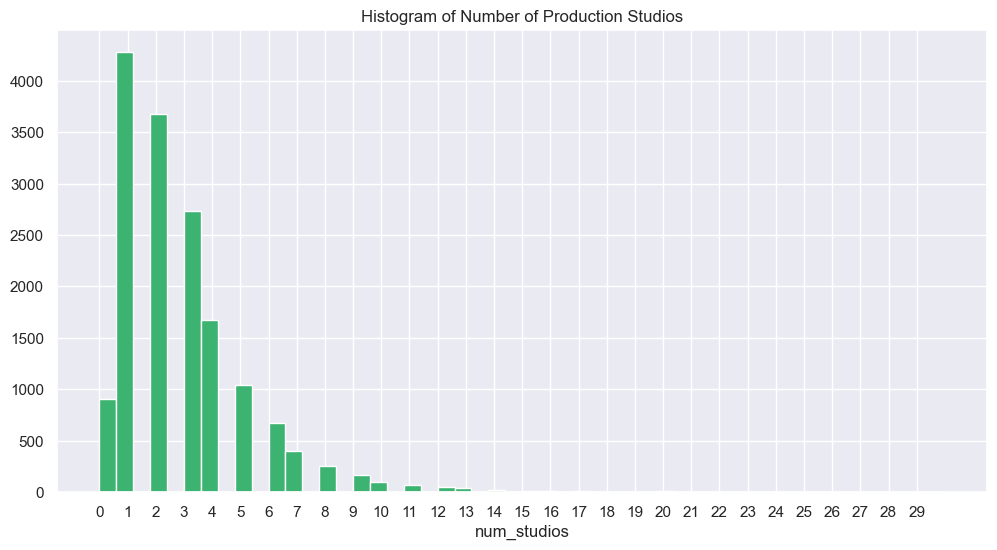

In [138]:
# plotting films by number of production studios
sns.distplot(data['num_studios'], kde=False, color='mediumseagreen', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(15,6)})
plt.title('Histogram of Number of Production Studios')
plt.xticks(range(30))
plt.show()

Hầu hết các bộ phim đều có từ 1 đến 4 công ty sản xuất, ít phim có số lượng cao hơn và một số thậm chí còn có 0 đối tác hãng phim (phim độc lập). Tuy nhiên, chỉ dựa vào số lượng công ty sản xuất khổng lồ nên rất khó để đưa ra giả thuyết hợp lý về thành công phòng vé của bộ phim. Thay vào đó, việc xác định các công ty sản xuất lớn hơn, có uy tín hơn hoặc thành công trước đó và áp dụng những phát hiện đó vào việc liệu các bộ phim dữ liệu được đề cập có cho biết các hãng phim sẽ là cách hữu ích hơn để phân tích tác động của các công ty sản xuất hay không.


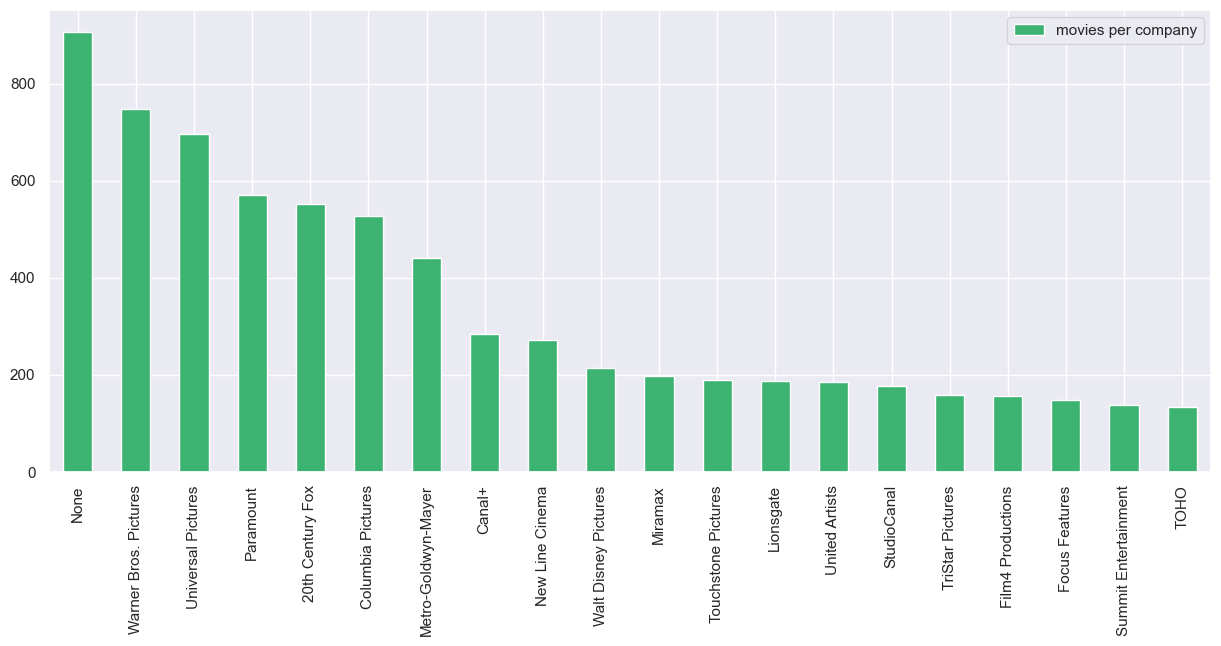

In [139]:
# production companies
companiesDict = {}
for element in data["production_companies_reform"].values:
    for company in element:
        if company not in companiesDict:
            companiesDict[company] = 1
        else:
            companiesDict[company] += 1

companies_train = pd.DataFrame.from_dict(companiesDict, orient='index', columns=["movies per company"])
companies_train.sort_values(by="movies per company", ascending=False).head(20).plot.bar(color='mediumseagreen')

companies_train.columns = ["number_of_studios"]

Việc sử dụng số lượng phim của mỗi công ty sản xuất có thể hữu ích trong việc xác định hãng phim nào lớn nhất và mối tương quan giữa quy mô của một công ty sản xuất ảnh hưởng như thế nào đến sự thành công của phim. Có hai khả năng; hoặc 1. một hãng phim lớn hơn có kinh phí và phương tiện để thu hút dàn diễn viên và đoàn làm phim tên tuổi, với kinh nghiệm cần thiết để biến dự án đó thành một dự án phim thành công hoặc 2. hãng phim được nhượng quyền quá nhiều để tạo ra những ý tưởng mới lạ thành công và chỉ đơn thuần là liên tục bơm ra những bộ phim có thành tích tầm thường. Mặc dù một số khả năng có thể xảy ra nhưng công nghệ máy học sẽ giúp cân nhắc mức độ ảnh hưởng tương đối của quy mô trường quay đến doanh thu dự đoán của bộ phim. Đánh dấu liệu một trong những hãng phim lớn này có tham gia vào một bộ phim hay không sẽ là một tính năng hữu ích để xác định mối liên hệ này


In [140]:
# bivariate analysis of revenue with production studios
# production companies copy
companiesDict2 = {}
for element in data["production_companies_reform"].values:
    for company in element:
        if company not in companiesDict2:
            companiesDict2[company] = 1
        else:
            companiesDict2[company] += 1

companies_df = pd.DataFrame.from_dict(companiesDict2, orient='index', columns=["movies per company"])

companies_df.columns = ["number_of_studios"]

Text(0.5, 0, 'Production Studio')

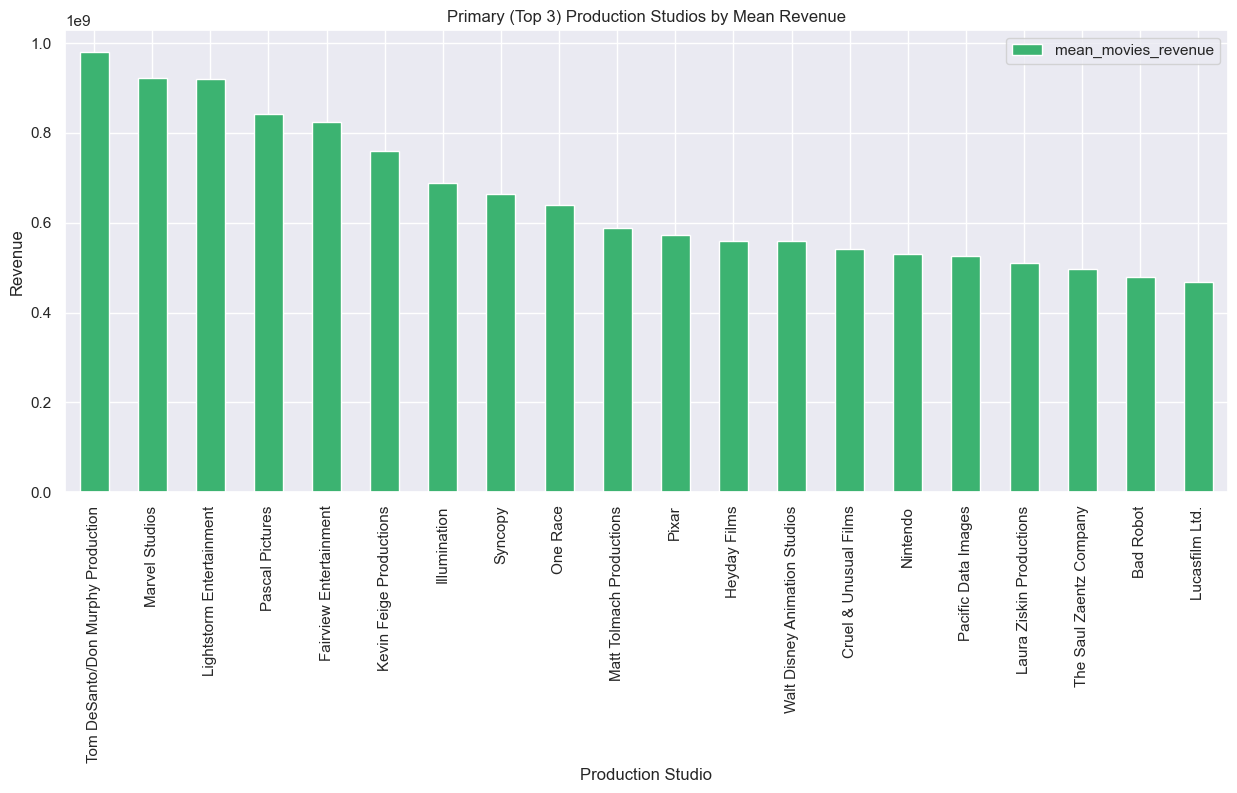

In [141]:
# isolating the primary production studios for the films
studiosDict = {}
for element in data[["revenue", "production_companies_reform"]].values:
   # compare results when looking at x top production companies in films vs all affiliated studios 
    temp = 3
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in studiosDict:
            studiosDict[element[1][i]] = [element[0], 1]
        else:
            studiosDict[element[1][i]][0] += element[0]
            studiosDict[element[1][i]][1] += 1    

studiosDict = {k: v for k, v in studiosDict.items() if v[1] >= 3}

for company in studiosDict:
    studiosDict[company][0] = studiosDict[company][0]/studiosDict[company][1]
    studiosDict[company] = studiosDict[company][0]

studios_train = pd.DataFrame.from_dict(studiosDict, orient='index', columns=["mean_movies_revenue"])
studios_train.sort_values(by="mean_movies_revenue", ascending=False).head(20).plot.bar(color='mediumseagreen')
plt.title("Primary (Top 3) Production Studios by Mean Revenue")
plt.ylabel("Revenue")
plt.xlabel("Production Studio")

<Axes: >

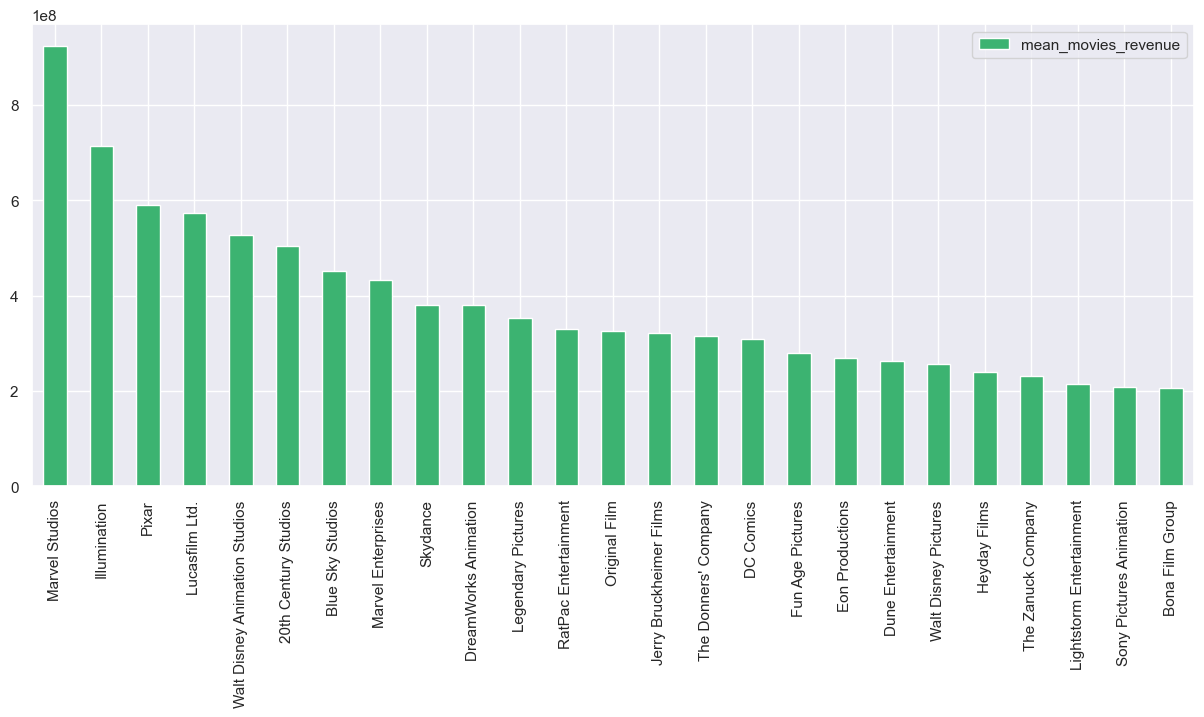

In [142]:
topStudiosDict = {}
for element in data[["revenue", "production_companies_reform"]].values:
   # compare results when looking at x top studios
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in topStudiosDict:
            topStudiosDict[element[1][i]] = [element[0], 1]
        else:
            topStudiosDict[element[1][i]][0] += element[0]
            topStudiosDict[element[1][i]][1] += 1    

topStudiosDict = {k: v for k, v in topStudiosDict.items() if v[1] >= 5}

for company in topStudiosDict:
    topStudiosDict[company][0] = topStudiosDict[company][0]/topStudiosDict[company][1]
    topStudiosDict[company] = topStudiosDict[company][0]

studios_df = pd.DataFrame.from_dict(topStudiosDict, orient='index', columns=["mean_movies_revenue"])
studios_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='mediumseagreen')

In [143]:
# Sort both of our dicts of studios and top studios to more easily access the 'most successful studios'
topStudiosDict = {k: v for k, v in sorted(topStudiosDict.items(), key=lambda item: item[1], reverse = True)}
studiosDict = {k: v for k, v in sorted(studiosDict.items(), key=lambda item: item[1], reverse = True)}


# function to check if lead role is a 'top studio'
def checkTopStudios(studio):
    if len(studio) < 1 or studio[0] not in list(topStudiosDict)[:50]:
        return 0
    else:
        return 1

def checkStudios(studio):
    if len(studio) < 1:
        return 0
    count = 0
    for company in studio[:10]:
        if company in list(studiosDict)[:100]:
            count += 1
    return count

def getStudioRanks(studios):
    if len(studios) < 1:
        return 400
    rank = 0
    for s in studios[:5]:
        if s in list(studiosDict):
            rank += list(studiosDict.keys()).index(s)
    if rank == 0:
        rank = 400
    return rank / len(studios)

#Creating a feature for top production studios
data['topStudio'] = data['production_companies_reform'].apply(lambda x: checkTopStudios(x))
#Creating feature for number of top studios
data['numTopStudios'] = data['production_companies_reform'].apply(lambda x: checkStudios(x))

studiosDict = {k: v for k, v in sorted(studiosDict.items(), key=lambda item: item[1], reverse = True)}

#Creating feature for number of top studios
data['studioRank'] = data['production_companies_reform'].apply(lambda x: getStudioRanks(x))

print(data['topStudio'].value_counts())
print()
print(data['numTopStudios'].value_counts())
print()
print(data['studioRank'].value_counts())


topStudio
0    15332
1      788
Name: count, dtype: int64

numTopStudios
0    14866
1      941
2      267
3       38
4        6
5        2
Name: count, dtype: int64

studioRank
400.000000     1702
1739.000000     907
200.000000      634
133.333333      274
671.000000      173
               ... 
85.625000         1
426.750000        1
1982.000000       1
883.750000        1
1292.000000       1
Name: count, Length: 5917, dtype: int64


Trong nỗ lực định lượng tác động của các studio sản xuất, chúng tôi đã tạo hai dict, một trong số tất cả các studio khác nhau và một trong tất cả các studio chính (có nghĩa là studio đầu tiên được liệt kê) và sắp xếp dựa trên doanh thu trung bình. Sau đó, chúng tôi đã tạo hai cột mới để giúp đo lường tác động của một studio, đó là topStudio và numTopStudios. Cột topStudio thể hiện liệu studio chính được liệt kê có phải là một trong 25 studio chính hàng đầu được liệt kê hay không, trong khi numTopStudios là số lượng studio hàng đầu (theo doanh thu) đã làm việc cho bộ phim.

In [144]:
# analysis of correlation and create log feature
corr, _ = pearsonr(data['topStudio'], data['revenue'])
print('Pearsons correlation between topStudio and revenue: %.3f' % corr)
corr, _ = pearsonr(data['topStudio'], np.log1p(data['revenue']))
print('Pearsons correlation between topStudio and revenue: %.3f' % corr)
print()

# analysis of correlation and create log feature
corr, _ = pearsonr(data['numTopStudios'], data['revenue'])
print('Pearsons correlation between numTopStudios and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['numTopStudios']), np.log1p(data['revenue']))
print('Pearsons correlation between numTopStudios and revenue: %.3f' % corr)
print()

# analysis of correlation and create log feature
corr, _ = pearsonr(data['studioRank'], data['revenue'])
print('Pearsons correlation between studioRank and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['studioRank']), np.log1p(data['revenue']))
print('Pearsons correlation between studioRank and revenue: %.3f' % corr)
print()

# analysis of correlation and create log feature
corr, _ = pearsonr(data['num_studios'], data['revenue'])
print('Pearsons correlation between num_studios and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['num_studios']), np.log1p(data['revenue']))
print('Pearsons correlation between num_studios and revenue: %.3f' % corr)

Pearsons correlation between topStudio and revenue: 0.432
Pearsons correlation between topStudio and revenue: 0.246

Pearsons correlation between numTopStudios and revenue: 0.588
Pearsons correlation between numTopStudios and revenue: 0.317

Pearsons correlation between studioRank and revenue: -0.253
Pearsons correlation between studioRank and revenue: -0.336

Pearsons correlation between num_studios and revenue: 0.078
Pearsons correlation between num_studios and revenue: 0.310


Chúng tôi quan sát thấy mối tương quan giữa các thuộc tính mới của chúng tôi dùng để định lượng các studio hàng đầu. Điều này thật đáng khích lệ vì nó có thể phản ánh một số khả năng dự đoán về doanh thu. Ngoài ra còn có mối tương quan tích cực yếu hơn giữa số lượng hãng phim trên một bộ phim và doanh thu


In [145]:
cat_features.append('topStudio')
num_features.append('numTopStudios')
num_features.append('num_studios')
num_features.append('studioRank')

## Production Countries

Cột này chứa tất cả các quốc gia khác nhau nơi bộ phim được sản xuất. Phim được quay trên khắp thế giới và có một số địa điểm nhất định phổ biến hơn để quay phim, vì vậy, việc khám phá dữ liệu ở đây có thể rất thú vị.

In [146]:
data.production_countries.head(10)


id
31866                      United States of America
192                          France, Germany, Italy
616820                     United States of America
518021                     United States of America
38973                                         Japan
366080                                        India
19181                        United Kingdom, Sweden
12819       United States of America, India, Canada
6076                                        Germany
22832     France, Germany, United States of America
Name: production_countries, dtype: object

In [147]:
print('Movies missing production countries:',data.production_countries.isna().sum())


Movies missing production countries: 459


Một lần nữa, chúng tôi trích xuất tên các quốc gia ngăn cách bằng dấu ",".

In [148]:
data['production_countries'] = data['production_countries'].fillna('None')
data['production_countries_reform'] = data['production_countries'].apply(lambda x: [genre.strip() for genre in x.split(',')])


In [149]:
data['num_production_countries'] = data.production_countries_reform.apply(lambda x: len(x) if x[0] != 'None' else 0)


<Axes: xlabel='num_production_countries', ylabel='count'>

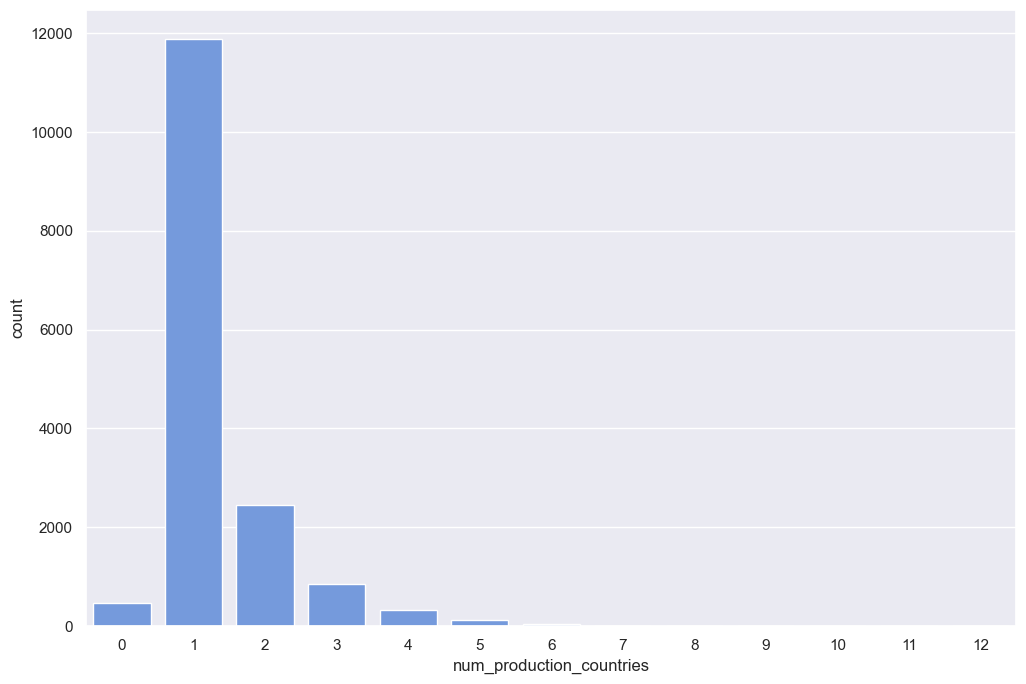

In [150]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x=data.num_production_countries, color='cornflowerblue')


<Axes: >

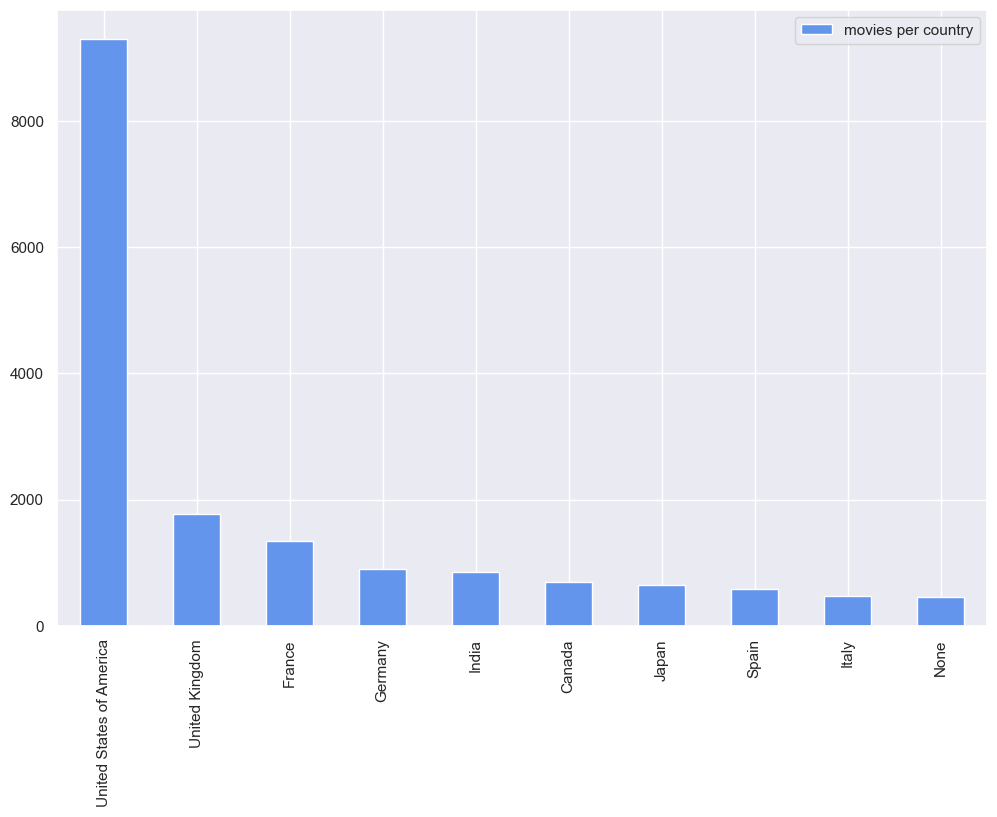

In [151]:
countriesDict = {}
for element in data["production_countries_reform"].values:
    for country in element:
        if country not in countriesDict:
            countriesDict[country] = 1
        else:
            countriesDict[country] += 1

countries_train = pd.DataFrame.from_dict(countriesDict, orient='index', columns=["movies per country"])
countries_train.sort_values(by="movies per country", ascending=False).head(10).plot.bar(color='cornflowerblue')

Từ biểu đồ, chúng ta có thể thấy rằng phần lớn các bộ phim đều được sản xuất ở Mỹ, với vị trí cao thứ hai (Vương quốc Anh) kém xa một cách đáng kinh ngạc. Do quan sát này, chúng tôi sẽ không xem xét tất cả các quốc gia sản xuất khác nhau mà thay vào đó tạo một thuộc tính mới cho biết liệu một bộ phim có được sản xuất ở Mỹ hay không.

In [152]:
#Creating new feature
data['usa_produced'] = data.production_countries_reform.apply(lambda x: 1 if 'United States of America' in x else 0)
data['usa_produced'].value_counts()

usa_produced
1    9301
0    6819
Name: count, dtype: int64

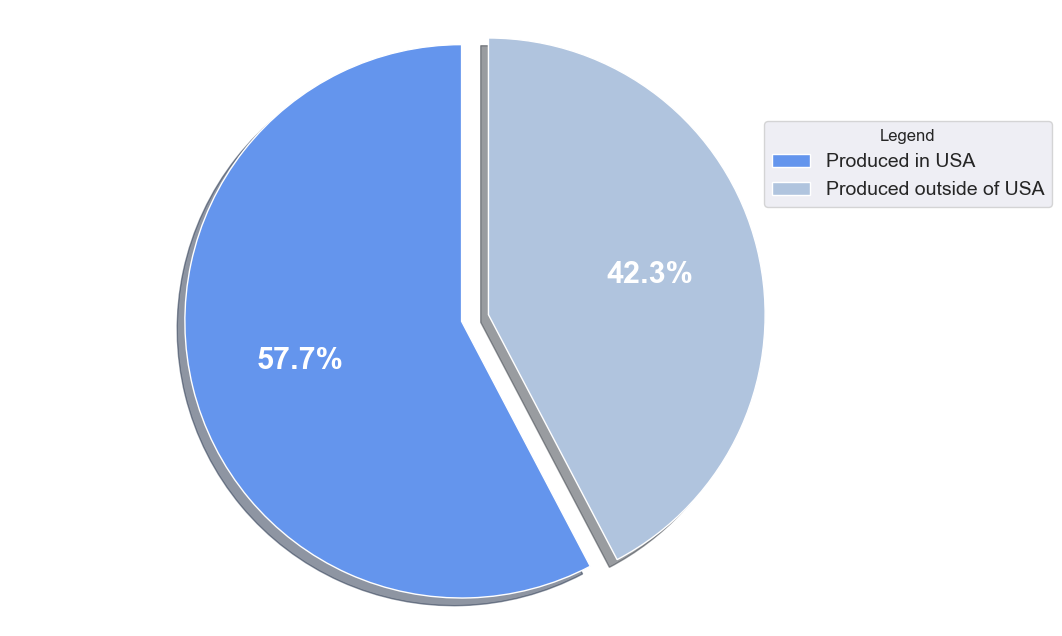

In [153]:
# plotting has a homepage data
labels = 'Produced in USA', 'Produced outside of USA'
btc_1 = [sum(data.usa_produced), (data.usa_produced == 0).sum(axis=0)]
explode = (0.1, 0)

colors = ['cornflowerblue', 'lightsteelblue']

fig, ax = plt.subplots()
ax.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 22, 'weight':"bold"})
ax.axis('equal') # ensures chart is a circle

ax.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

plt.show()        

Text(0.5, 1.0, 'Revenue based on number of production countries')

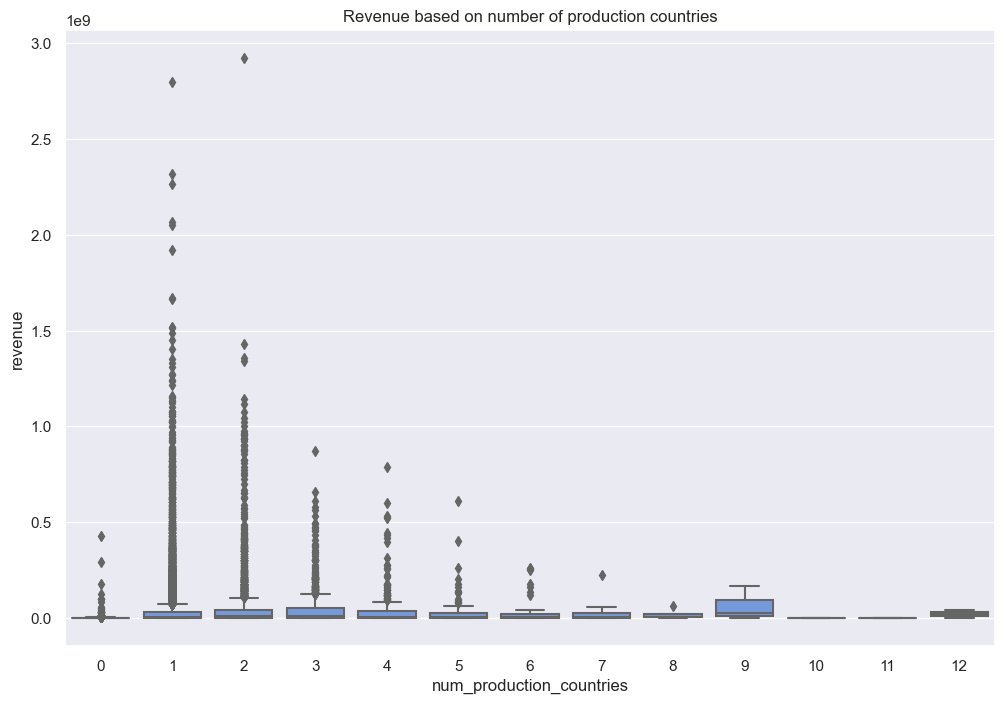

In [154]:
sns.boxplot(x='num_production_countries', y='revenue', data=data, color='cornflowerblue')
plt.title('Revenue based on number of production countries')

In [155]:
# calculate Pearson's correlation
corr, _ = pearsonr(data['num_production_countries'], data['revenue'])
print('Pearsons correlation between num_production_countries and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['num_production_countries']), np.log1p(data['revenue']))
print('Pearsons correlation between log transformed num_production_countries and log transformed revenue: %.3f' % corr)

Pearsons correlation between num_production_countries and revenue: 0.025
Pearsons correlation between log transformed num_production_countries and log transformed revenue: 0.161


Chúng ta có thể thấy hầu như không có mối tương quan giữa số lượng quốc gia sản xuất và doanh thu, nhưng vẫn chưa thể loại trừ hoàn toàn mối quan hệ này.

C:\Users\bdm2k\AppData\Local\Temp\ipykernel_16984\1715620502.py:3: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.catplot(x='usa_produced', y='revenue', data=data, palette=pal3);


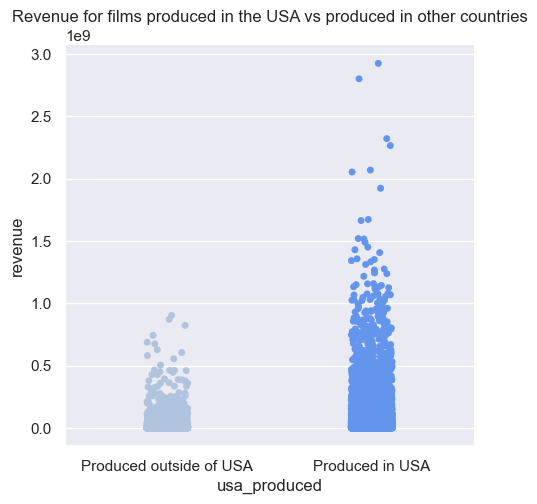

In [156]:
pal3 = ['lightsteelblue', 'cornflowerblue']

ax = sns.catplot(x='usa_produced', y='revenue', data=data, palette=pal3);
plt.title('Revenue for films produced in the USA vs produced in other countries');

labels = 'Produced outside of USA', 'Produced in USA'
ax.set_xticklabels(labels)

In [157]:
# calculate Pearson's correlation
corr, _ = pearsonr(data['usa_produced'], data['revenue'])
print('Pearsons correlation between usa_produced and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['usa_produced']), np.log1p(data['revenue']))
print('Pearsons correlation between log transformed usa_produced and log transformed revenue: %.3f' % corr)

Pearsons correlation between usa_produced and revenue: 0.218
Pearsons correlation between log transformed usa_produced and log transformed revenue: 0.334


Chúng tôi quan sát thấy mối tương quan giữa việc sản xuất ở Mỹ và doanh thu. Mặc dù mối tương quan không quá mạnh nhưng việc đưa vào mô hình của chúng tôi có thể hữu ích.

In [158]:
num_features.append('num_production_countries')
cat_features.append('usa_produced')

## Spoken Languages

Cột này thể hiện tất cả ngôn ngữ mà phim được phát hành. Chúng tôi thấy điều này quan trọng vì nếu một bộ phim được phát hành bằng nhiều ngôn ngữ khác nhau, phim có thể tiếp cận được nhiều khán giả hơn, do đó làm tăng doanh thu. Ngôn ngữ có thể là một thuộc tính quan trọng, vì vậy hãy khám phá thêm về nó.

In [159]:
data['spoken_languages']

id
31866                     English, French
192       German, English, Italian, Latin
616820                            English
518021                            English
38973                            Japanese
                       ...               
26672                             English
74178                             English
9359                              English
41479                             English
964                           No Language
Name: spoken_languages, Length: 16120, dtype: object

In [160]:
print('Movies missing spoken languages:',data.spoken_languages.isna().sum())


Movies missing spoken languages: 248


Một lần nữa, chúng tôi trích xuất các ngôn ngữ ngăn cách bằng dấu ",".

In [161]:
data['spoken_languages'] = data['spoken_languages'].fillna('')
data['spoken_languages_reform'] = data['spoken_languages'].apply(lambda x: [genre.strip() for genre in x.split(',')])


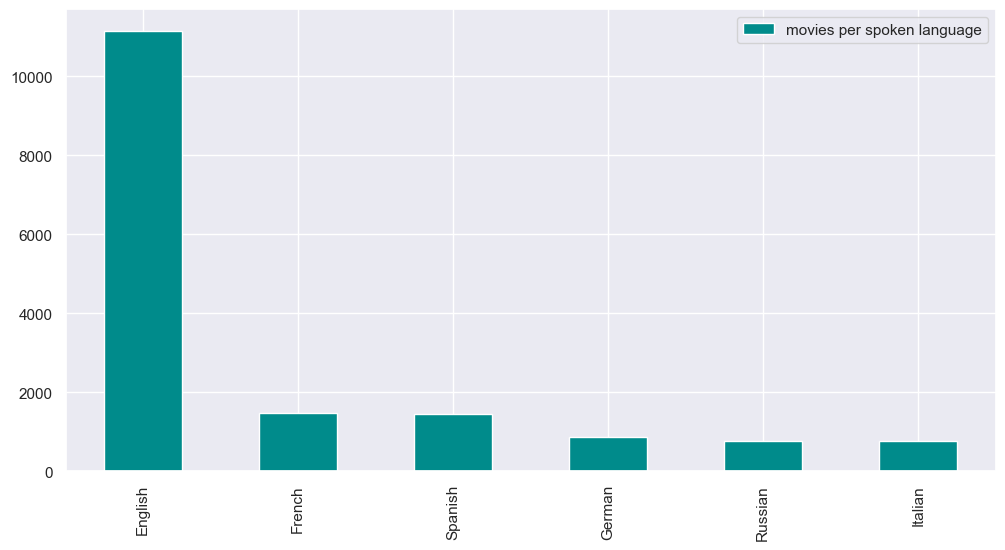

In [162]:
# univariate analysis of spoken languages
languagesDict = {}
for element in data["spoken_languages_reform"].values:
    for name in element:
        if name not in languagesDict:
            languagesDict[name] = 1
        else:
            languagesDict[name] += 1
            
sns.set(rc={'figure.figsize':(12,6)})
            
languages_train = pd.DataFrame.from_dict(languagesDict, orient='index', columns=["movies per spoken language"])
languages_train.sort_values(by="movies per spoken language", ascending=False).head(6).plot.bar(color='darkcyan')

languages_train.columns = ["number_of_languages"]

Do giá trị cao hơn đáng kể đối với những bộ phim sử dụng tiếng Anh là ngôn ngữ nói, giá trị này có thể được chia thành một câu hỏi đơn giản, "Tiếng Anh có phải là ngôn ngữ nói hay không?" Điều này sẽ cung cấp cái nhìn sâu sắc thú vị về tầm quan trọng của tiếng Anh như ngôn ngữ nói như một yếu tố dẫn đến thành công của bộ phim. Bởi vì thị trường phim ở các quốc gia nói tiếng Anh cao hơn. Một giả thuyết hợp lý là tiếng Anh có thể không biểu thị một bộ phim thành công, nhưng việc thiếu tiếng Anh có thể làm tổn hại đến cơ hội thành công của bộ phim.

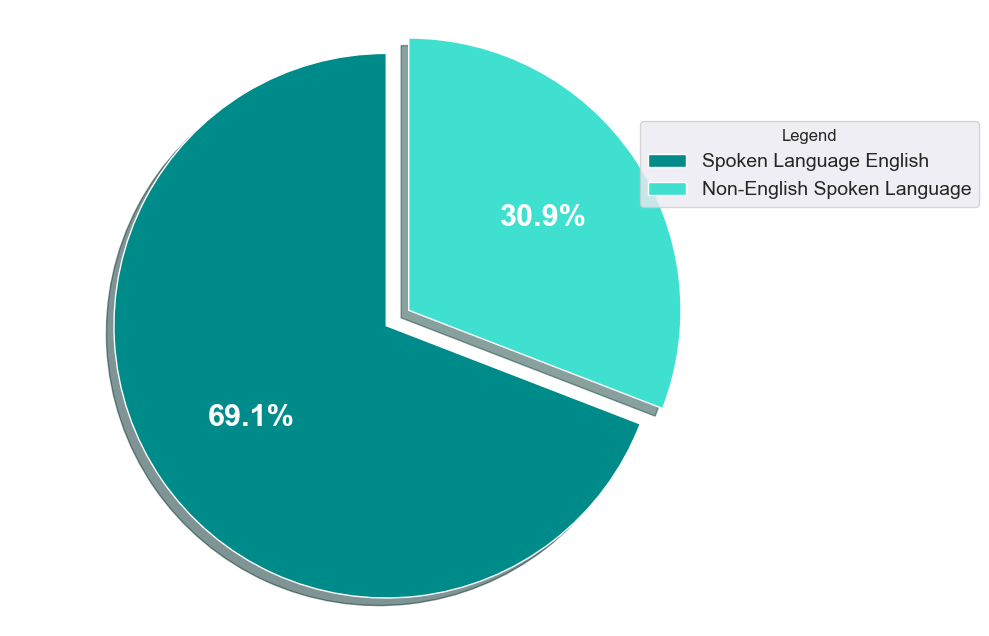

In [163]:
# spoken languages (english vs non-english)
data['released_in_english'] = data['spoken_languages_reform'].apply(lambda x: 1 if 'English' in x else 0)

lang = [(data.released_in_english == 1).sum(axis=0), (data.released_in_english == 0).sum(axis=0)]

labels = 'Spoken Language English', 'Non-English Spoken Language'
explode = (0.1, 0)

# plot
colors = ["darkcyan", "turquoise"]

fig, ix = plt.subplots(figsize=(10, 8))
ix.pie(lang, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize':22, 'weight':"bold"})
ix.axis('equal')

ix.legend(labels,
          title="Legend",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(0.8, 0.25, 0.5, 1))

released_in_english
1    11143
0     4977
Name: count, dtype: int64


[Text(0, 0, 'Non-English Spoken Language'),
 Text(1, 0, 'Spoken Language English')]

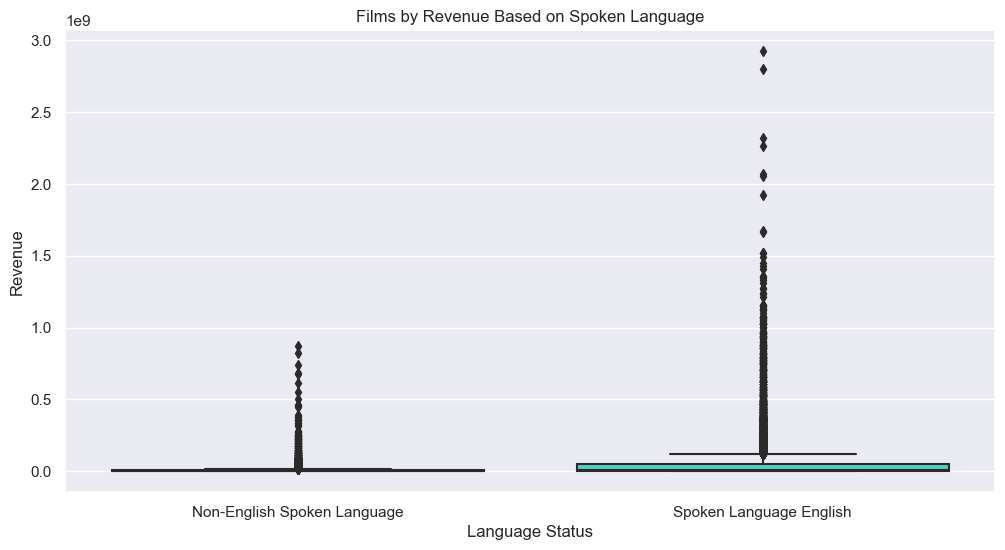

In [164]:
# bivariate analysis of revenue with english as spoken language
print(data['released_in_english'].value_counts())

labels = 'Non-English Spoken Language', 'Spoken Language English'

pal2 = ["darkcyan", "turquoise"]

fig, ix = plt.subplots(figsize=(12, 6))
sns.boxplot(x='released_in_english', y='revenue', data=data, palette=pal2)
plt.title('Films by Revenue Based on Spoken Language')
plt.ylabel("Revenue")
plt.xlabel("Language Status")

ix.set_xticklabels(labels)

In [165]:
#analysis of correlation and create log feature
corr, _ = pearsonr(data['released_in_english'], data['revenue'])
print('Pearsons correlation between released_in_english and revenue: %.3f' % corr)
corr, _ = pearsonr(data['released_in_english'], np.log1p(data['revenue']))
print('Pearsons correlation between released_in_english and log transformed  revenue: %.3f' % corr)

Pearsons correlation between released_in_english and revenue: 0.175
Pearsons correlation between released_in_english and log transformed  revenue: 0.296


In [166]:
data['num_languages'] = data.spoken_languages_reform.apply(lambda x: len(x) if x[0] != '' else 0)


In [167]:
#analysis of correlation and create log feature
corr, _ = pearsonr(data['num_languages'], data['revenue'])
print('Pearsons correlation between num_languages and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['num_languages']), np.log1p(data['revenue']))
print('Pearsons correlation between log transformed num_languages and log transformed  revenue: %.3f' % corr)

Pearsons correlation between num_languages and revenue: 0.108
Pearsons correlation between log transformed num_languages and log transformed  revenue: 0.190


Chúng tôi quan sát thấy mối tương quan khá yếu giữa từng thuộc tính trong số hai thuộc tính được tạo và doanh thu, nhưng chúng vẫn có thể hữu ích khi đưa vào mô hình.

In [168]:
cat_features.append('released_in_english')
num_features.append('num_languages')

## Revenue and Budget (continue)

In [169]:
# Use MultiLabelBinarizer for binary encoding
mlb = MultiLabelBinarizer()
production_companies_encoded = pd.DataFrame(mlb.fit_transform(data['production_companies_reform']), columns=mlb.classes_, index=data.index)
production_companies_encoded

,,"""DIA"" Productions GmbH & Co. KG","""G"" P.C. S.A.","""Weathering With You"" Film Partners",(Colossal) Pictures,(주)라인필름,(주)유비컬쳐,(주)유비콘텐츠,1 Bullet in the Gun Productions,1 in 10 Films,...,辽宁科教电影制片厂,邵氏兄弟（香港）有限公司,鑫宝源,阿里巴巴影业（北京）,霍尔果斯喜天影业有限公司,黄太吉,黑龙江电影制片厂,龙江电影制片厂,무서운영화,빛그림픽처스
id,,,,,,,,,,,,,,,,,,,,,
31866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
616820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
518021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9359,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
production_companies_encoded = pd.concat([production_companies_encoded, data[['revenue', 'budget']]], axis=1)
production_companies_encoded

,,"""DIA"" Productions GmbH & Co. KG","""G"" P.C. S.A.","""Weathering With You"" Film Partners",(Colossal) Pictures,(주)라인필름,(주)유비컬쳐,(주)유비콘텐츠,1 Bullet in the Gun Productions,1 in 10 Films,...,鑫宝源,阿里巴巴影业（北京）,霍尔果斯喜天影业有限公司,黄太吉,黑龙江电影制片厂,龙江电影制片厂,무서운영화,빛그림픽처스,revenue,budget
id,,,,,,,,,,,,,,,,,,,,,
31866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,497000,641000
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,77200000,18000000
616820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,104361355,20000000
518021,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,7666,13444
38973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,12236890,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26672,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,669276,28000000
74178,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,513722,0
9359,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,183031272,75000000


In [171]:
# median revenue and budget per production studio
for company in companies_df.index:
    companies_df.loc[company, "median_rev"] = production_companies_encoded[production_companies_encoded[company]==1].revenue.median()
    companies_df.loc[company, "median_bud"] = production_companies_encoded[production_companies_encoded[company]==1].budget.median()
    
companies_df.sort_values(by=["number_of_studios", "median_rev"], ascending=False).head(10)


,number_of_studios,median_rev,median_bud
None,907,185544.0,0.0
Warner Bros. Pictures,747,39416773.0,25000000.0
Universal Pictures,696,48042600.5,20000000.0
Paramount,570,42070545.5,20500000.0
20th Century Fox,553,38435947.0,18000000.0
Columbia Pictures,528,48077869.5,25000000.0
Metro-Goldwyn-Mayer,440,8897144.5,4000000.0
Canal+,284,7443182.0,6850000.0
New Line Cinema,271,44800000.0,25000000.0
Walt Disney Pictures,215,134400000.0,50000000.0


In [172]:
def getAvgStudioRev(movie):
    if movie.budget < 10000: 
        studios = movie.production_companies_reform
        median_buds = []
        for studio in studios:
            median_buds.append(float(companies_df.loc[studio]['median_bud']))
        if(len(median_buds) > 0) and np.mean(median_buds) > 10000:
            movie.budget_processed_1 = np.mean(median_buds)
        else:
            movie.budget_processed_1 = data.budget.median()
        
        
    
    if (movie.revenue < 10000):
        studios = movie.production_companies_reform
        median_revs = []
        for studio in studios:
            if studio in companies_df.index:
                median_revs.append(float(companies_df.loc[studio]['median_rev']))
        if(len(median_revs) > 0) and np.mean(median_revs) > 10000:
            movie.revenue_1 = np.mean(median_revs)
        else:
            movie.revenue_1 = data.revenue.median()
        return movie
    else:
        return movie

In [173]:
data['budget_processed_1'] = data['budget_processed']
data['revenue_1'] = data['revenue']
data = data.apply(getAvgStudioRev, axis=1)

Text(0.5, 1.0, 'Log Revenue vs log budget_processed')

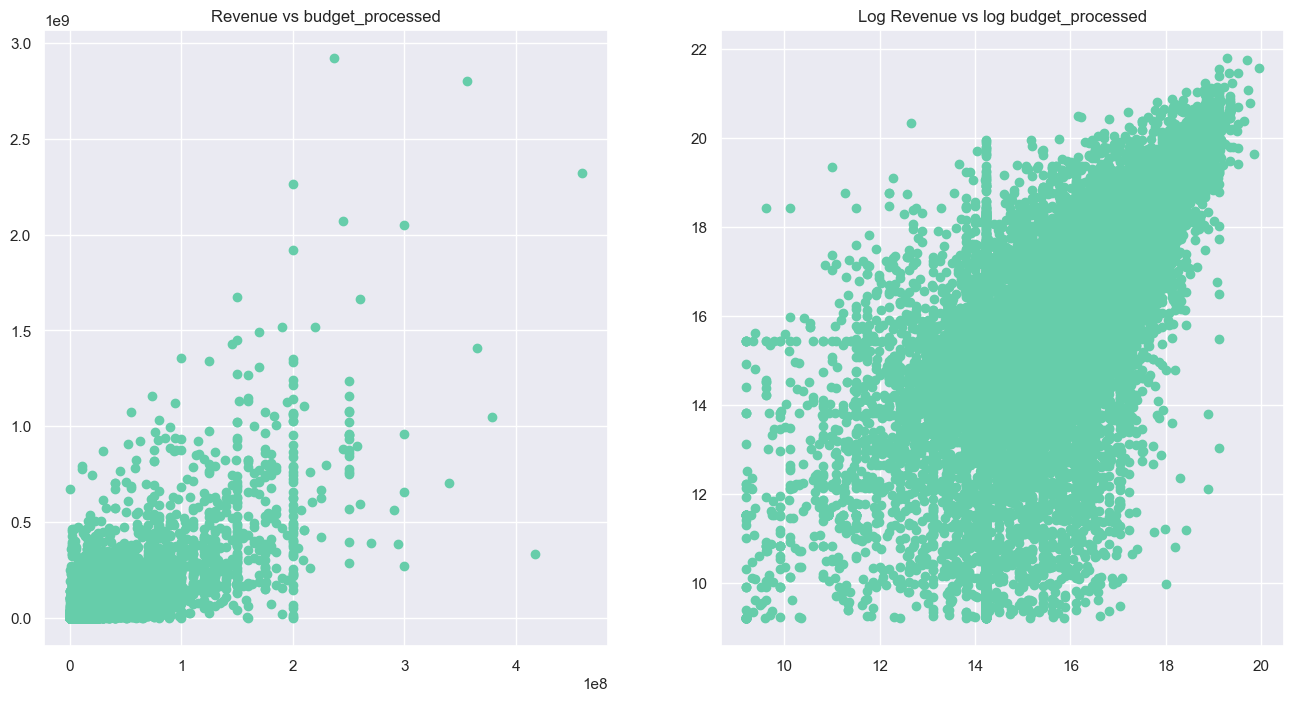

In [174]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(data['budget_processed_1'], data['revenue_1'], color='mediumaquamarine')
plt.title('Revenue vs budget_processed')
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(data['budget_processed_1']), np.log1p(data['revenue_1']), color='mediumaquamarine')
plt.title('Log Revenue vs log budget_processed')

In [175]:
#analysis of correlation and create log feature probably
corr, _ = pearsonr(data['budget_processed_1'], data['revenue_1'])
print('Pearsons correlation between budget_processed and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(data['budget_processed_1']), np.log1p(data['revenue_1']))
print('Pearsons correlation between log transformed transformed budget_processed and log transformed revenue: %.3f' % corr)

Pearsons correlation between budget_processed and revenue: 0.744
Pearsons correlation between log transformed transformed budget_processed and log transformed revenue: 0.639


In [176]:
data = data.drop(['budget_processed', 'revenue'], axis=1)
data = data.rename(columns={'budget_processed_1': 'budget_processed', 'revenue_1': 'revenue'})

In [177]:
num_features.remove('budget_processed')
num_features.append('budget_processed')

## Feature Selection

Bây giờ chúng tôi đã khám phá tất cả dữ liệu và tạo một số thuộc tính mới cho mô hình, hãy xem kết quả.

In [178]:
print(cols_to_drop)

['overview', 'popularity', 'original_title', 'backdrop_path', 'poster_path']


Chúng tôi đã kết thúc với 5 cột mà chúng tôi quyết định loại bỏ vì không có tác dụng gì đối với mô hình. Chúng tôi thực sự không cần phải loại bỏ chúng khỏi tập dữ liệu, nhưng điều quan trọng vẫn là ghi lại các cột hoàn toàn không được sử dụng và không phục vụ mục đích cho mô hình của chúng tôi. Mỗi lý do biện minh cho việc loại bỏ những điều này có thể được tìm thấy trong các phần tương quan trước đó trong suốt quá trình phân tích.

In [179]:
print(cat_features)

['status', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', 'MondayRelease', 'TuesdayRelease', 'WednesdayRelease', 'ThursdayRelease', 'FridayRelease', 'SaturdayRelease', 'SundayRelease', 'Winter', 'Fall', 'Spring', 'Summer', 'adult', 'has_homepage', 'originally_english', 'has_tagline', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'None', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'topStudio', 'usa_produced', 'released_in_english']


['title', 'vote_average', 'vote_count', 'status_0', 'status_1', 'status_2', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', 'MondayRelease', 'TuesdayRelease', 'WednesdayRelease', 'ThursdayRelease', 'FridayRelease', 'SaturdayRelease', 'SundayRelease', 'Winter', 'Fall', 'Spring', 'Summer', 'adult_0', 'adult_1', 'has_homepage', 'originally_english', 'has_tagline', '', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'topStudio', 'usa_produced', 'released_in_english']

In [180]:
train_features = cat_features

Đây là tất cả các categorical features sẽ được sử dụng trong mô hình của chúng tôi và chúng tôi vẫn cần log transform tất cả các numerical features.

In [181]:
print(num_features)

['revenue', 'title_len', 'vote_average', 'vote_count', 'runtime_processed', 'budget_processed', 'genre_rank', 'num_genres', 'numTopStudios', 'num_studios', 'studioRank', 'num_production_countries', 'num_languages']


['revenue', 'runtime_processed', 'budget_processed', 'genre_rank', 'num_genres', 'numTopStudios', 'num_studios', 'studioRank', 'num_production_countries', 'num_languages']


In [182]:
# Log Transform
for feat in num_features:
    data["log_" + feat] = np.log1p(data[feat])
    if feat != "revenue":
        train_features.append("log_" + feat)

Bây giờ chúng tôi đã log transform cho các numerical features, đây sẽ là danh sách các thuộc tính cho mô hình của chúng tôi.

In [183]:
print(train_features)
print()
print("Number of features: ", len(train_features))

['status', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', 'MondayRelease', 'TuesdayRelease', 'WednesdayRelease', 'ThursdayRelease', 'FridayRelease', 'SaturdayRelease', 'SundayRelease', 'Winter', 'Fall', 'Spring', 'Summer', 'adult', 'has_homepage', 'originally_english', 'has_tagline', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'None', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'topStudio', 'usa_produced', 'released_in_english', 'log_title_len', 'log_vote_average', 'log_vote_count', 'log_runtime_processed', 'log_budget_processed', 'log_genre_rank', 'log_num_genres', 'log_numTopStudios', 'log_num_studios', 'log_studioRank', 'log_num_production_countries', 'log_num_languages']

Number of features:  57


['vote_average', 'vote_count', 'status_0', 'status_1', 'status_2', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', 'MondayRelease', 'TuesdayRelease', 'WednesdayRelease', 'ThursdayRelease', 'FridayRelease', 'SaturdayRelease', 'SundayRelease', 'Winter', 'Fall', 'Spring', 'Summer', 'adult_0', 'adult_1', 'has_homepage', 'originally_english', 'has_tagline', '', 'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western', 'topStudio', 'usa_produced', 'released_in_english', 'log_title_len', 'log_runtime_processed', 'log_budget_processed', 'log_genre_rank', 'log_num_genres', 'log_numTopStudios', 'log_num_studios', 'log_studioRank', 'log_num_production_countries', 'log_num_languages']


Chúng tôi đã kết thúc với tổng cộng 57 thuộc tính khác nhau cho mô hình của mình. Tiếp theo, chúng ta hãy xem ma trận tương quan của tất cả các numerical features.

C:\Users\bdm2k\AppData\Local\Temp\ipykernel_17824\3176734163.py:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


Text(0.5, 1.0, 'Correlation between numerical features')

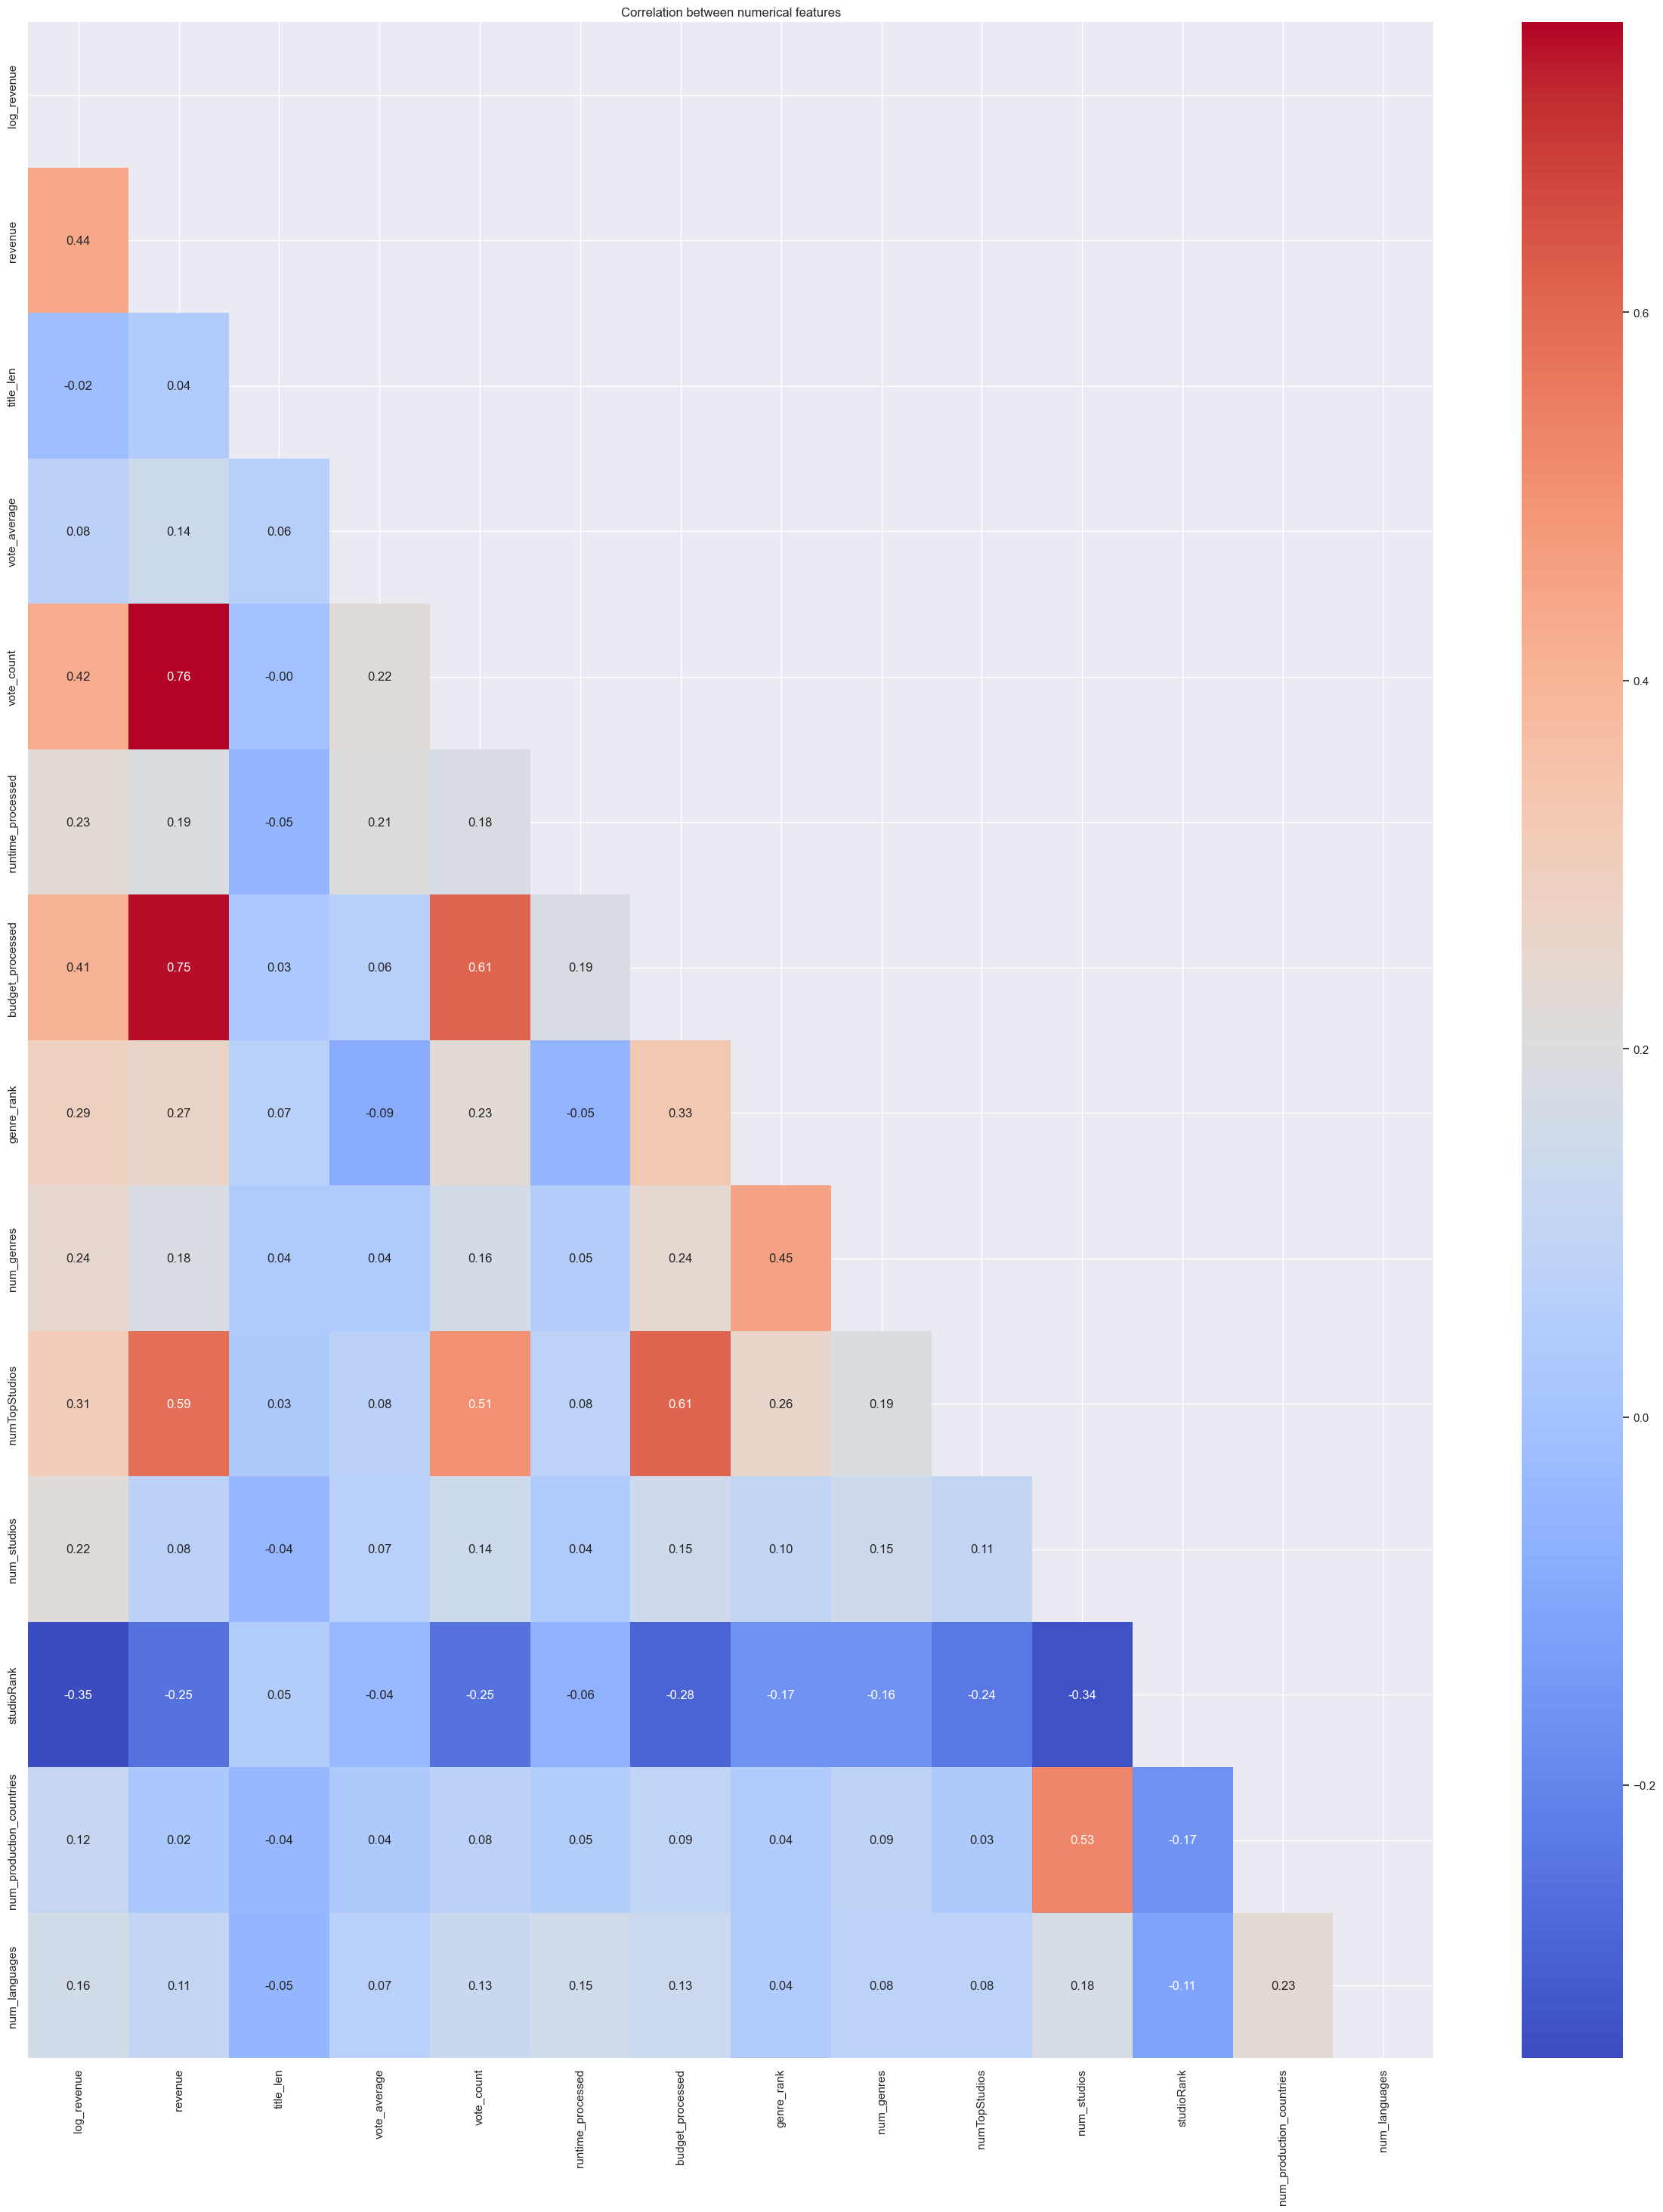

In [184]:
# Correlation matrix
sns.set(rc={'figure.figsize':(30,35)})

# Compute the correlation matrix
corr = data[['log_revenue', *num_features]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between numerical features")

Ma trận tương quan khá lớn nhưng lại cho chúng ta rất nhiều thông tin. Nhìn lên cột xa nhất bên trái, chúng ta có thể thấy mối tương quan giữa doanh thu và từng biến, cho chúng ta thấy rằng budget là một trong những mối tương quan cao nhất. Ngoài ra, điều quan trọng cần lưu ý là có vẻ như có khá nhiều hiện tượng multicollinearity trong dữ liệu của chúng tôi, điều này ảnh hưởng rất lớn đến độ chính xác của các thuật toán.

# Modeling

In [185]:
#Set up our X and y
X = data[train_features]
y = data['log_revenue']

In [186]:
# create a 80/20 stratified split of the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [187]:
#Ensure the dimensions are correct
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (12896, 57) (12896,)
Test set: (3224, 57) (3224,)


Chúng tôi sẽ tạo một số hàm trợ giúp. Hàm đầu tiên sẽ được sử dụng để thực hiện grid search để điều chỉnh hyperparameter cho từng mô hình của chúng tôi. Phần tiếp theo là đánh giá để so sánh mô hình cơ sở của chúng tôi với mô hình đã điều chỉnh và cho chúng tôi thấy một số số liệu để đánh giá hiệu suất của các mô hình của chúng tôi.

In [188]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv, scoring_fit='neg_root_mean_squared_error'):
    gs = skl_ms.GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    pred = fitted_model.predict(X_test_data)

    return fitted_model, pred

In [189]:
def metrics(model, x_test, y_test):
    y_pred = model.predict(x_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred) * 100
    r_squared = r2_score(y_test, y_pred)
    accuracy = 100 - round(mape, 4)
    print('Mean Squared Error: ', round(mse, 4))
    print('Root Mean Squared Error: ', round(rmse, 4))
    print('Mean Absolute Error: ', round(mae, 4))
    print('Mean Absolute Percentage Error: ', round(mape, 4))
    print('R-squared: ', round(r_squared, 4))
    print('Test Set Accuracy (from Mean Absolute Percentage Error)', round(accuracy, 4))
    return (mape, rmse, r_squared, mae, mse, accuracy)

In [190]:
entries = []

Chúng tôi sử dụng Grid Search để tìm ra mô hình tốt nhất

## Linear Regression

In [191]:
lr_base_model = LinearRegression()
lr_base_model.fit(X_train, y_train.values.ravel())

lr_model = LinearRegression()
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False]
}

lr_model, pred = algorithm_pipeline(X_train, X_test, y_train.values.ravel(), y_test.values, lr_model, 
                                 param_grid, cv=5)

print('Linear Regression Base Model:')
base_accuracy = metrics(lr_base_model, X_test, y_test.values)[5]
print()
print('Linear Regression Model (After Tuning) Metrics:')
lr_best_model = lr_model.best_estimator_
temp = metrics(lr_best_model, X_test, y_test.values)
best_accuracy = temp[5]

print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

entries.append((lr_best_model.__class__.__name__, temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Linear Regression Base Model:
Mean Squared Error:  5.5588
Root Mean Squared Error:  2.3577
Mean Absolute Error:  1.6313
Mean Absolute Percentage Error:  20.85
R-squared:  0.5302
Test Set Accuracy (from Mean Absolute Percentage Error) 79.15

Linear Regression Model (After Tuning) Metrics:
Mean Squared Error:  5.5165
Root Mean Squared Error:  2.3487
Mean Absolute Error:  1.6236
Mean Absolute Percentage Error:  20.835
R-squared:  0.5338
Test Set Accuracy (from Mean Absolute Percentage Error) 79.165
Improvement of 0.02%.


## Ridge Regression

In [192]:
ridge_base_model = Ridge()
ridge_base_model.fit(X_train, y_train.values.ravel())

rigde_model = Ridge()
param_grid = {
    'alpha' : [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'positive': [True, False]
}

rigde_model, pred = algorithm_pipeline(X_train, X_test, y_train.values.ravel(), y_test.values, rigde_model, 
                                 param_grid, cv=5)

print('Ridge Regression Base Model:')
base_accuracy = metrics(ridge_base_model, X_test, y_test.values)[5]
print()
print('Ridge Regression Model (After Tuning) Metrics:')
ridge_best_model = rigde_model.best_estimator_
temp = metrics(ridge_best_model, X_test, y_test.values)
best_accuracy = temp[5]

print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

entries.append((ridge_best_model.__class__.__name__, temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Ridge Regression Base Model:
Mean Squared Error:  5.5089
Root Mean Squared Error:  2.3471
Mean Absolute Error:  1.6236
Mean Absolute Percentage Error:  20.8187
R-squared:  0.5344
Test Set Accuracy (from Mean Absolute Percentage Error) 79.1813

Ridge Regression Model (After Tuning) Metrics:
Mean Squared Error:  5.5092
Root Mean Squared Error:  2.3472
Mean Absolute Error:  1.6236
Mean Absolute Percentage Error:  20.8194
R-squared:  0.5344
Test Set Accuracy (from Mean Absolute Percentage Error) 79.1806
Improvement of 0.00%.


## k-NN

In [193]:
knn_base_model = KNeighborsRegressor()
knn_base_model.fit(X_train, y_train.values.ravel())

knn_model = KNeighborsRegressor()
param_grid = {
    'n_neighbors': list(range(1, 51)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['ball_tree', 'kd_tree', 'brute']
}

knn_model, pred = algorithm_pipeline(X_train, X_test, y_train.values.ravel(), y_test.values, knn_model, 
                                 param_grid, cv=5)

print('k-NN Base Model:')
base_accuracy = metrics(knn_base_model, X_test, y_test.values)[5]
print()
print('k-NN Model (After Tuning) Metrics:')
knn_best_model = knn_model.best_estimator_
temp = metrics(knn_best_model, X_test, y_test.values)
best_accuracy = temp[5]

print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

entries.append((knn_best_model.__class__.__name__, temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
k-NN Base Model:
Mean Squared Error:  5.6111
Root Mean Squared Error:  2.3688
Mean Absolute Error:  1.5468
Mean Absolute Percentage Error:  19.8274
R-squared:  0.5258
Test Set Accuracy (from Mean Absolute Percentage Error) 80.1726

k-NN Model (After Tuning) Metrics:
Mean Squared Error:  4.9586
Root Mean Squared Error:  2.2268
Mean Absolute Error:  1.4365
Mean Absolute Percentage Error:  19.3371
R-squared:  0.581
Test Set Accuracy (from Mean Absolute Percentage Error) 80.6629
Improvement of 0.61%.


## Decision Tree

In [194]:
dt_base_model = DecisionTreeRegressor()
dt_base_model.fit(X_train, y_train.values.ravel())

dt_model = DecisionTreeRegressor()
param_grid = {
    'max_depth': [None] + list(range(1, 50, 5)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'criterion': ['friedman_mse']
}

dt_model, pred = algorithm_pipeline(X_train, X_test, y_train.values.ravel(), y_test.values, dt_model, 
                                 param_grid, cv=5)

print('Decision Tree Base Model:')
base_accuracy = metrics(dt_base_model, X_test, y_test.values)[5]
print()
print('Decision Tree Model (After Tuning) Metrics:')
dt_best_model = dt_model.best_estimator_
temp = metrics(dt_best_model, X_test, y_test.values)
best_accuracy = temp[5]

print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

entries.append((dt_best_model.__class__.__name__, temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))

Fitting 5 folds for each of 297 candidates, totalling 1485 fits
Decision Tree Base Model:
Mean Squared Error:  9.3168
Root Mean Squared Error:  3.0523
Mean Absolute Error:  1.9868
Mean Absolute Percentage Error:  22.6546
R-squared:  0.2126
Test Set Accuracy (from Mean Absolute Percentage Error) 77.3454

Decision Tree Model (After Tuning) Metrics:
Mean Squared Error:  5.6059
Root Mean Squared Error:  2.3677
Mean Absolute Error:  1.6212
Mean Absolute Percentage Error:  20.0992
R-squared:  0.5262
Test Set Accuracy (from Mean Absolute Percentage Error) 79.9008
Improvement of 3.30%.


## SVR

In [195]:
svr_base_model = SVR(kernel='linear')
svr_base_model.fit(X_train, y_train.values.ravel())

svm_model = SVR(kernel='linear')
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svr_model, pred = algorithm_pipeline(X_train, X_test, y_train.values.ravel(), y_test.values, svr_base_model, 
                                 param_grid, cv=5)

print('SVR Base Model:')
base_accuracy = metrics(svr_base_model, X_test, y_test.values)[5]
print()
print('SVR Model (After Tuning) Metrics:')
svr_best_model = svr_model.best_estimator_
temp = metrics(svr_best_model, X_test, y_test.values)
best_accuracy = temp[5]

print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

entries.append((svr_best_model.__class__.__name__, temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
SVR Base Model:
Mean Squared Error:  5.7887
Root Mean Squared Error:  2.406
Mean Absolute Error:  1.5633
Mean Absolute Percentage Error:  21.7022
R-squared:  0.5108
Test Set Accuracy (from Mean Absolute Percentage Error) 78.2978

SVR Model (After Tuning) Metrics:
Mean Squared Error:  4.781
Root Mean Squared Error:  2.1865
Mean Absolute Error:  1.3786
Mean Absolute Percentage Error:  19.2301
R-squared:  0.596
Test Set Accuracy (from Mean Absolute Percentage Error) 80.7699
Improvement of 3.16%.


## Random Forest

In [196]:
rfr_base_model = RandomForestRegressor(random_state=42)
rfr_base_model.fit(X_train, y_train.values.ravel())

rfr_model = RandomForestRegressor(random_state=42)
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 25, 30],
    'max_features': [0.4, 'log2', 'sqrt'],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [1.0, 3, 5],
    'n_estimators': [100,400]
}

rfr_model, pred = algorithm_pipeline(X_train, X_test, y_train.values.ravel(), y_test.values, rfr_model, 
                                 param_grid, cv=5)

print('Random Forest Base Model:')
base_accuracy = metrics(rfr_base_model, X_test, y_test.values)[5]
print()
print('Random Forest Model (After Tuning) Metrics:')
rfr_best_model = rfr_model.best_estimator_
temp = metrics(rfr_best_model, X_test, y_test.values)
best_accuracy = temp[5]

print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

entries.append((rfr_best_model.__class__.__name__, temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Random Forest Base Model:
Mean Squared Error:  4.5609
Root Mean Squared Error:  2.1356
Mean Absolute Error:  1.3964
Mean Absolute Percentage Error:  18.0498
R-squared:  0.6146
Test Set Accuracy (from Mean Absolute Percentage Error) 81.9502

Random Forest Model (After Tuning) Metrics:
Mean Squared Error:  4.388
Root Mean Squared Error:  2.0948
Mean Absolute Error:  1.3653
Mean Absolute Percentage Error:  17.8524
R-squared:  0.6292
Test Set Accuracy (from Mean Absolute Percentage Error) 82.1476
Improvement of 0.24%.


## Gradient Boosting

In [197]:
gbr_base_model = GradientBoostingRegressor(random_state=42)
gbr_base_model.fit(X_train, y_train.values.ravel())

gbr_model = GradientBoostingRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [2, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 5],
    'subsample': [0.9, 1.0]
}
gbr_model, pred = algorithm_pipeline(X_train, X_test, y_train.values.ravel(), y_test.values, gbr_model, 
                                 param_grid, cv=5)

print('Base Model:')
base_accuracy = metrics(gbr_base_model, X_test, y_test.values)[5]
print()
print('Gradient Boosting Model (After Tuning) Metrics:')
gbr_best_model = gbr_model.best_estimator_
temp = metrics(gbr_best_model, X_test, y_test.values)
best_accuracy = temp[5]

print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

entries.append((gbr_best_model.__class__.__name__, temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Base Model:
Mean Squared Error:  4.7204
Root Mean Squared Error:  2.1726
Mean Absolute Error:  1.4593
Mean Absolute Percentage Error:  18.7337
R-squared:  0.6011
Test Set Accuracy (from Mean Absolute Percentage Error) 81.2663

Gradient Boosting Model (After Tuning) Metrics:
Mean Squared Error:  4.4255
Root Mean Squared Error:  2.1037
Mean Absolute Error:  1.391
Mean Absolute Percentage Error:  17.7389
R-squared:  0.626
Test Set Accuracy (from Mean Absolute Percentage Error) 82.2611
Improvement of 1.22%.


## AdaBoost

In [198]:
ada_base_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=42)
ada_base_model.fit(X_train, y_train.values.ravel())

ada_model = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4), n_estimators=100, random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'loss': ['linear', 'square', 'exponential']
}

ada_model, pred = algorithm_pipeline(X_train, X_test, y_train.values.ravel(), y_test.values, ada_model, 
                                 param_grid, cv=5)

print('AdaBoost Base Model:')
base_accuracy = metrics(ada_base_model, X_test, y_test.values)[5]
print()
print('AdaBoost Model (After Tuning) Metrics:')
ada_best_model = ada_model.best_estimator_
temp = metrics(ada_best_model, X_test, y_test.values)
best_accuracy = temp[5]

print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

entries.append((ada_best_model.__class__.__name__, temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
AdaBoost Base Model:
Mean Squared Error:  6.3984
Root Mean Squared Error:  2.5295
Mean Absolute Error:  1.8828
Mean Absolute Percentage Error:  20.5817
R-squared:  0.4593
Test Set Accuracy (from Mean Absolute Percentage Error) 79.4183

AdaBoost Model (After Tuning) Metrics:
Mean Squared Error:  5.5378
Root Mean Squared Error:  2.3533
Mean Absolute Error:  1.6615
Mean Absolute Percentage Error:  20.3618
R-squared:  0.532
Test Set Accuracy (from Mean Absolute Percentage Error) 79.6382
Improvement of 0.28%.


## XGBoost

In [199]:
xgb_base_model = XGBRegressor(random_state = 42)
xgb_base_model.fit(X_train, y_train.values.ravel())

xgb_model = XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'colsample_bytree': [0.9, 1.0],
    'max_depth': [2, 5, 10],
    'reg_alpha': [1.0, 1.2, 1.3],
    'reg_lambda': [ 1.2, 1.3, 1.4],
    'subsample': [0.9, 1.0]
}

xgb_model, pred = algorithm_pipeline(X_train, X_test, y_train.values.ravel(), y_test.values, xgb_model, 
                                 param_grid, cv=5)

print('XGBoost Base Model:')
base_accuracy = metrics(xgb_base_model, X_test, y_test.values)[5]
print()
print('XGBoost Model (After Tuning) Metrics:')
xgb_best_model = xgb_model.best_estimator_
temp = metrics(xgb_best_model, X_test, y_test.values)
best_accuracy = temp[5]

print('Improvement of {:0.3f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

entries.append((xgb_best_model.__class__.__name__, temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
XGBoost Base Model:
Mean Squared Error:  4.6445
Root Mean Squared Error:  2.1551
Mean Absolute Error:  1.4146
Mean Absolute Percentage Error:  17.7237
R-squared:  0.6075
Test Set Accuracy (from Mean Absolute Percentage Error) 82.2763

XGBoost Model (After Tuning) Metrics:
Mean Squared Error:  4.5537
Root Mean Squared Error:  2.1339
Mean Absolute Error:  1.41
Mean Absolute Percentage Error:  17.7175
R-squared:  0.6152
Test Set Accuracy (from Mean Absolute Percentage Error) 82.2825
Improvement of 0.008%.


## LightGBM

In [200]:
lgbm_base_model  = LGBMRegressor(random_state = 42, force_col_wise=True, verbose=-1)
lgbm_base_model.fit(X_train, y_train.values.ravel())

lgbm_model = LGBMRegressor(random_state = 42, force_col_wise=True, verbose=-1)
param_grid = {
    'n_estimators': [100, 150],
    'colsample_bytree': [0.8, 1.0, 1.2],
    'max_depth': [-1, 5, 10],
    'reg_alpha': [0.4, 0.5, 0.6],
    'reg_lambda': [0.2, 0.3, 0.4,],
    'subsample': [0.8, 0.9, 1],
    'num_leaves': [30,31,32]
}

lgbm_model, pred = algorithm_pipeline(X_train, X_test, y_train.values.ravel(), y_test.values, lgbm_model, 
                                 param_grid, cv=5)

print('Base Model:')
base_accuracy = metrics(lgbm_base_model, X_test, y_test.values)[5]
print()
print('LightGBM Model (After Tuning) Metrics:')
lgbm_best_model = lgbm_model.best_estimator_
temp = metrics(lgbm_best_model, X_test, y_test.values)
best_accuracy = temp[5]

print('Improvement of {:0.3f}%.'.format(100 * (best_accuracy - base_accuracy) / base_accuracy))

entries.append((lgbm_best_model.__class__.__name__, temp[0], temp[1], temp[2], temp[3], temp[4], temp[5]))


Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
Base Model:
Mean Squared Error:  4.376
Root Mean Squared Error:  2.0919
Mean Absolute Error:  1.3676
Mean Absolute Percentage Error:  17.7024
R-squared:  0.6302
Test Set Accuracy (from Mean Absolute Percentage Error) 82.2976

LightGBM Model (After Tuning) Metrics:
Mean Squared Error:  4.3784
Root Mean Squared Error:  2.0925
Mean Absolute Error:  1.37
Mean Absolute Percentage Error:  17.6986
R-squared:  0.63
Test Set Accuracy (from Mean Absolute Percentage Error) 82.3014
Improvement of 0.005%.


c:\Users\bdm2k\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2430 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\bdm2k\anaconda3\envs\test\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\bdm2k\anaconda3\envs\test\lib\site-packages\lightgbm\sklearn.py", line 1049, in fit
    super().fit(
  File "c:\Users\bdm2k\anaconda3\envs\test\lib\site-packages\lightgbm\sklearn.py", line 842, in fit
    self._Booster = train(
  File "c:\Users\bdm2k\anaconda3\envs\t

# Conclusion

## Results

In [201]:
result_df = pd.DataFrame(entries, columns=['model', 'Mean Absolute Percentage Error', 'Root Mean Squared Error', 'R squared',  'Mean Absolute Error', 'Mean Squared Error', 'Test Set Accuracy (from Mean Absolute Percentage Error)'])
result_df

,model,Mean Absolute Percentage Error,Root Mean Squared Error,R squared,Mean Absolute Error,Mean Squared Error,Test Set Accuracy (from Mean Absolute Percentage Error)
0,LinearRegression,20.835013,2.348733,0.533801,1.623593,5.516547,79.1650
1,Ridge,20.819387,2.347161,0.534425,1.623571,5.509163,79.1806
2,KNeighborsRegressor,19.337097,2.226784,0.580956,1.436524,4.958566,80.6629
3,DecisionTreeRegressor,20.099198,2.367685,0.526248,1.621172,5.605931,79.9008
4,SVR,19.230081,2.186543,0.595964,1.378562,4.780971,80.7699
5,RandomForestRegressor,17.852367,2.094757,0.629173,1.365253,4.388006,82.1476
6,GradientBoostingRegressor,17.738904,2.103688,0.626005,1.391046,4.425501,82.2611
7,AdaBoostRegressor,20.361774,2.353255,0.532004,1.661491,5.537811,79.6382
8,XGBRegressor,17.717543,2.133934,0.615173,1.410007,4.553673,82.2825
9,LGBMRegressor,17.698645,2.092460,0.629986,1.369970,4.378388,82.3014


In [202]:
# sort by Accuracy
result_df = result_df.sort_values(by='Test Set Accuracy (from Mean Absolute Percentage Error)', ascending=False)
result_df

,model,Mean Absolute Percentage Error,Root Mean Squared Error,R squared,Mean Absolute Error,Mean Squared Error,Test Set Accuracy (from Mean Absolute Percentage Error)
9,LGBMRegressor,17.698645,2.092460,0.629986,1.369970,4.378388,82.3014
8,XGBRegressor,17.717543,2.133934,0.615173,1.410007,4.553673,82.2825
6,GradientBoostingRegressor,17.738904,2.103688,0.626005,1.391046,4.425501,82.2611
5,RandomForestRegressor,17.852367,2.094757,0.629173,1.365253,4.388006,82.1476
4,SVR,19.230081,2.186543,0.595964,1.378562,4.780971,80.7699
2,KNeighborsRegressor,19.337097,2.226784,0.580956,1.436524,4.958566,80.6629
3,DecisionTreeRegressor,20.099198,2.367685,0.526248,1.621172,5.605931,79.9008
7,AdaBoostRegressor,20.361774,2.353255,0.532004,1.661491,5.537811,79.6382
1,Ridge,20.819387,2.347161,0.534425,1.623571,5.509163,79.1806
0,LinearRegression,20.835013,2.348733,0.533801,1.623593,5.516547,79.1650


Mô hình tốt nhất của chúng tôi là mô hình LightGBM, với RMSE là 2.09 và độ chính xác 82.3% dựa trên MAPE. Mô hình XGBoost đứng thứ hai với các giá trị tương ứng là 2.133 và 82.2825%. Cả 10 mô hình của chúng tôi đều có thể đạt được độ chính xác lớn hơn 79% và chúng tôi rất hài lòng với những kết quả này. Cho dù tỷ lệ phần trăm này có vẻ cao đến mức nào, chúng ta hãy nhìn vào sai số trung bình.

In [203]:
print('Average error of GradientBoosting: ${:.2f}'.format(np.mean(abs(np.expm1(gbr_best_model.predict(X_test)) - np.expm1(y_test.values)))))
print('Average error of XGBoost: ${:.2f}'.format(np.mean(abs(np.expm1(xgb_best_model.predict(X_test)) - np.expm1(y_test.values)))))

Average error of GradientBoosting: $19639864.83
Average error of XGBoost: $20045773.01


Ngay cả đối với 2 mô hình tốt nhất của chúng tôi, có thể thấy rằng mô hình vẫn chênh lệch 19-20 triệu USD cho mỗi dự đoán. Đây là một số tiền đáng kể, nhưng xét về mặt logic dựa trên dữ liệu thì điều đó rất hợp lý. Đối với một bộ phim bom tấn có doanh thu trên 600 triệu USD, việc nằm trong khoảng 20 triệu USD là khá gần và là một dự đoán tuyệt vời. Vấn đề xảy ra với những bộ phim nhỏ hơn, chẳng hạn như một bộ phim chỉ kiếm được 40 triệu USD. Nếu chúng ta lệch mục tiêu 35 triệu USD trong ví dụ này thì điều đó thật bất lợi. Phát hiện này tiếp tục nhắc lại sự khó khăn trong việc dự đoán sự thành công của các bộ phim, vì phần lớn dữ liệu bị sai lệch nặng nề bởi những bộ phim đình đám nhất, nên khó có thể chính xác đối với các sản phẩm nhỏ hơn. Vì vậy, sau khi suy ngẫm, việc giảm khoảng 20 triệu USD thực sự không phải là quá tệ và chúng tôi hài lòng với kết quả nỗ lực của mình. Ngành công nghiệp điện ảnh thực sự ở khắp mọi nơi và có rất nhiều yếu tố khó định lượng hoặc không có trong tập dữ liệu của chúng tôi, đóng vai trò quan trọng trong thành công của bộ phim, chẳng hạn như độ 'hype' xung quanh bộ phim, hoạt động tiếp thị, hiệu quả của hoạt động tiếp thị, v.v. Nhìn chung, tôi nghĩ rằng chúng tôi đã làm rất tốt dựa trên dữ liệu mà chúng tôi phải làm việc và hài lòng với những kết quả mà chúng tôi thu được.

## Final Words

Nhìn chung, dự án này là một trải nghiệm học tập tuyệt vời. Sau tất cả những điều được xem xét, nhóm chúng tôi đều rất hài lòng với kết quả nỗ lực của mình. Cả nhóm chúng tôi đều mong muốn được làm việc trong tương lai trong lĩnh vực này và giải quyết các dự án của riêng mình.
Cảm ơn bạn đã dành thời gian để xem xét dự án của chúng tôi. Chúng tôi hy vọng bạn thích nó cũng như chúng tôi thích thú khi làm việc với nó và rất muốn nghe bất kỳ và tất cả phản hồi nào!